Datensammlung

In [1]:
#imports
import numpy as np
#print(np.__version__)

import pandas as pd

#print(pd.__version__)
import os

#logs von TF abspeichern
root_logdir = os.path.join(os.curdir,"my_logs_ADS")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [2]:
import tensorflow as tf
#create keras Tensorboard callback
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [3]:
#Request ausführen
import requests
response = requests.get("https://dog.ceo/api/breed/hound/images")
print(response.json())


{'message': ['https://images.dog.ceo/breeds/hound-afghan/n02088094_1003.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_1007.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_1023.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_10263.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_10715.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_10822.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_10832.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_10982.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_11006.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_11172.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_11182.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_1126.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_1128.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_11432.jpg', 'https://images.dog.ceo/breeds/hound-afghan/n02088094_1145.jpg', 'ht

In [4]:
#Kategorien/Labels abrufen und definieren
import requests
import json
response = requests.get("https://dog.ceo/api/breeds/list/all")
x=response.json()

z= json.dumps(x)
w=json.loads(z)
labels=w["message"].keys()
categories=[]
#list mit Breeds erstellen

for label in labels:
    categories.append(label)
    
print(categories)

['affenpinscher', 'african', 'airedale', 'akita', 'appenzeller', 'australian', 'basenji', 'beagle', 'bluetick', 'borzoi', 'bouvier', 'boxer', 'brabancon', 'briard', 'buhund', 'bulldog', 'bullterrier', 'cattledog', 'chihuahua', 'chow', 'clumber', 'cockapoo', 'collie', 'coonhound', 'corgi', 'cotondetulear', 'dachshund', 'dalmatian', 'dane', 'deerhound', 'dhole', 'dingo', 'doberman', 'elkhound', 'entlebucher', 'eskimo', 'finnish', 'frise', 'germanshepherd', 'greyhound', 'groenendael', 'havanese', 'hound', 'husky', 'keeshond', 'kelpie', 'komondor', 'kuvasz', 'labradoodle', 'labrador', 'leonberg', 'lhasa', 'malamute', 'malinois', 'maltese', 'mastiff', 'mexicanhairless', 'mix', 'mountain', 'newfoundland', 'otterhound', 'ovcharka', 'papillon', 'pekinese', 'pembroke', 'pinscher', 'pitbull', 'pointer', 'pomeranian', 'poodle', 'pug', 'puggle', 'pyrenees', 'redbone', 'retriever', 'ridgeback', 'rottweiler', 'saluki', 'samoyed', 'schipperke', 'schnauzer', 'setter', 'sheepdog', 'shiba', 'shihtzu', '

In [5]:
#Löschen unzureichender oder schwer zu klassifizierende Kategorien
categories.remove('mix')
categories.remove('finnish')
categories.remove('australian')
categories.remove('frise')
categories.remove('labradoodle')
categories.remove('cattledog')
categories.remove('eskimo')
categories.remove('dane')


#Mischform und schlechte datenqualität
categories.remove('puggle')


In [6]:
print(categories)
print(len(categories))

['affenpinscher', 'african', 'airedale', 'akita', 'appenzeller', 'basenji', 'beagle', 'bluetick', 'borzoi', 'bouvier', 'boxer', 'brabancon', 'briard', 'buhund', 'bulldog', 'bullterrier', 'chihuahua', 'chow', 'clumber', 'cockapoo', 'collie', 'coonhound', 'corgi', 'cotondetulear', 'dachshund', 'dalmatian', 'deerhound', 'dhole', 'dingo', 'doberman', 'elkhound', 'entlebucher', 'germanshepherd', 'greyhound', 'groenendael', 'havanese', 'hound', 'husky', 'keeshond', 'kelpie', 'komondor', 'kuvasz', 'labrador', 'leonberg', 'lhasa', 'malamute', 'malinois', 'maltese', 'mastiff', 'mexicanhairless', 'mountain', 'newfoundland', 'otterhound', 'ovcharka', 'papillon', 'pekinese', 'pembroke', 'pinscher', 'pitbull', 'pointer', 'pomeranian', 'poodle', 'pug', 'pyrenees', 'redbone', 'retriever', 'ridgeback', 'rottweiler', 'saluki', 'samoyed', 'schipperke', 'schnauzer', 'setter', 'sheepdog', 'shiba', 'shihtzu', 'spaniel', 'springer', 'stbernard', 'terrier', 'tervuren', 'vizsla', 'waterdog', 'weimaraner', 'wh

In [7]:
#Bilder herunterladen und in separate Verzeichnisse abspeichern
import pandas as pd
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import os
import os.path
from os import path
for category in categories:

    response = requests.get("https://dog.ceo/api/breed/"+category+"/images")
    x=response.json()
    #directory wo bilder abgespeichert werden sollen
    save_path="C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt/"+category
    if path.exists(save_path)==True:
        print("Ordner gibts schon")
    else:
        os.mkdir(save_path)
    urls = pd.DataFrame(x)
    rows = []
    urls=urls.drop(columns=['status'], axis=1)
    print(urls)

    for index, i in urls.iterrows():
            rows.append(i[-1])

    counter = 0

    for i in rows:
        file_name = category + str(counter) + '.jpg'
        completeName = os.path.join(save_path, file_name)
        if path.exists(completeName)==True:
            counter += 1
        else:
            try:
                if counter < 150:
                    
               
                    response = requests.get(i)

                    print(file_name)     
                    file = open(completeName, "wb")
                    file.write(response.content)
                    file.close()
                    counter += 1
                else:
                        pass
                
                
            except:
                counter+= 1
                
            

                                               message
0    https://images.dog.ceo/breeds/affenpinscher/n0...
1    https://images.dog.ceo/breeds/affenpinscher/n0...
2    https://images.dog.ceo/breeds/affenpinscher/n0...
3    https://images.dog.ceo/breeds/affenpinscher/n0...
4    https://images.dog.ceo/breeds/affenpinscher/n0...
..                                                 ...
145  https://images.dog.ceo/breeds/affenpinscher/n0...
146  https://images.dog.ceo/breeds/affenpinscher/n0...
147  https://images.dog.ceo/breeds/affenpinscher/n0...
148  https://images.dog.ceo/breeds/affenpinscher/n0...
149  https://images.dog.ceo/breeds/affenpinscher/n0...

[150 rows x 1 columns]
affenpinscher0.jpg
affenpinscher1.jpg
affenpinscher2.jpg
affenpinscher3.jpg
affenpinscher4.jpg
affenpinscher5.jpg
affenpinscher6.jpg
affenpinscher7.jpg
affenpinscher8.jpg
affenpinscher9.jpg
affenpinscher10.jpg
affenpinscher11.jpg
affenpinscher12.jpg
affenpinscher13.jpg
affenpinscher14.jpg
affenpinscher15.jpg
affenp

airedale66.jpg
airedale67.jpg
airedale68.jpg
airedale69.jpg
airedale70.jpg
airedale71.jpg
airedale72.jpg
airedale73.jpg
airedale74.jpg
airedale75.jpg
airedale76.jpg
airedale77.jpg
airedale78.jpg
airedale79.jpg
airedale80.jpg
airedale81.jpg
airedale82.jpg
airedale83.jpg
airedale84.jpg
airedale85.jpg
airedale86.jpg
airedale87.jpg
airedale88.jpg
airedale89.jpg
airedale90.jpg
airedale91.jpg
airedale92.jpg
airedale93.jpg
airedale94.jpg
airedale95.jpg
airedale96.jpg
airedale97.jpg
airedale98.jpg
airedale99.jpg
airedale100.jpg
airedale101.jpg
airedale102.jpg
airedale103.jpg
airedale104.jpg
airedale105.jpg
airedale106.jpg
airedale107.jpg
airedale108.jpg
airedale109.jpg
airedale110.jpg
airedale111.jpg
airedale112.jpg
airedale113.jpg
airedale114.jpg
airedale115.jpg
airedale116.jpg
airedale117.jpg
airedale118.jpg
airedale119.jpg
airedale120.jpg
airedale121.jpg
airedale122.jpg
airedale123.jpg
airedale124.jpg
airedale125.jpg
airedale126.jpg
airedale127.jpg
airedale128.jpg
airedale129.jpg
airedale13

beagle0.jpg
beagle1.jpg
beagle2.jpg
beagle3.jpg
beagle4.jpg
beagle5.jpg
beagle6.jpg
beagle7.jpg
beagle8.jpg
beagle9.jpg
beagle10.jpg
beagle11.jpg
beagle12.jpg
beagle13.jpg
beagle14.jpg
beagle15.jpg
beagle16.jpg
beagle17.jpg
beagle18.jpg
beagle19.jpg
beagle20.jpg
beagle21.jpg
beagle22.jpg
beagle23.jpg
beagle24.jpg
beagle25.jpg
beagle26.jpg
beagle27.jpg
beagle28.jpg
beagle29.jpg
beagle30.jpg
beagle31.jpg
beagle32.jpg
beagle33.jpg
beagle34.jpg
beagle35.jpg
beagle36.jpg
beagle37.jpg
beagle38.jpg
beagle39.jpg
beagle40.jpg
beagle41.jpg
beagle42.jpg
beagle43.jpg
beagle44.jpg
beagle45.jpg
beagle46.jpg
beagle47.jpg
beagle48.jpg
beagle49.jpg
beagle50.jpg
beagle51.jpg
beagle52.jpg
beagle53.jpg
beagle54.jpg
beagle55.jpg
beagle56.jpg
beagle57.jpg
beagle58.jpg
beagle59.jpg
beagle60.jpg
beagle61.jpg
beagle62.jpg
beagle63.jpg
beagle64.jpg
beagle65.jpg
beagle66.jpg
beagle67.jpg
beagle68.jpg
beagle69.jpg
beagle70.jpg
beagle71.jpg
beagle72.jpg
beagle73.jpg
beagle74.jpg
beagle75.jpg
beagle76.jpg
beagle77.

bouvier1.jpg
bouvier2.jpg
bouvier3.jpg
bouvier4.jpg
bouvier5.jpg
bouvier6.jpg
bouvier7.jpg
bouvier8.jpg
bouvier9.jpg
bouvier10.jpg
bouvier11.jpg
bouvier12.jpg
bouvier13.jpg
bouvier14.jpg
bouvier15.jpg
bouvier16.jpg
bouvier17.jpg
bouvier18.jpg
bouvier19.jpg
bouvier20.jpg
bouvier21.jpg
bouvier22.jpg
bouvier23.jpg
bouvier24.jpg
bouvier25.jpg
bouvier26.jpg
bouvier27.jpg
bouvier28.jpg
bouvier29.jpg
bouvier30.jpg
bouvier31.jpg
bouvier32.jpg
bouvier33.jpg
bouvier34.jpg
bouvier35.jpg
bouvier36.jpg
bouvier37.jpg
bouvier38.jpg
bouvier39.jpg
bouvier40.jpg
bouvier41.jpg
bouvier42.jpg
bouvier43.jpg
bouvier44.jpg
bouvier45.jpg
bouvier46.jpg
bouvier47.jpg
bouvier48.jpg
bouvier49.jpg
bouvier50.jpg
bouvier51.jpg
bouvier52.jpg
bouvier53.jpg
bouvier54.jpg
bouvier55.jpg
bouvier56.jpg
bouvier57.jpg
bouvier58.jpg
bouvier59.jpg
bouvier60.jpg
bouvier61.jpg
bouvier62.jpg
bouvier63.jpg
bouvier64.jpg
bouvier65.jpg
bouvier66.jpg
bouvier67.jpg
bouvier68.jpg
bouvier69.jpg
bouvier70.jpg
bouvier71.jpg
bouvier72.jpg
b

briard0.jpg
briard1.jpg
briard2.jpg
briard3.jpg
briard4.jpg
briard5.jpg
briard6.jpg
briard7.jpg
briard8.jpg
briard9.jpg
briard10.jpg
briard11.jpg
briard12.jpg
briard13.jpg
briard14.jpg
briard15.jpg
briard16.jpg
briard17.jpg
briard18.jpg
briard19.jpg
briard20.jpg
briard21.jpg
briard22.jpg
briard23.jpg
briard24.jpg
briard25.jpg
briard26.jpg
briard27.jpg
briard28.jpg
briard29.jpg
briard30.jpg
briard31.jpg
briard32.jpg
briard33.jpg
briard34.jpg
briard35.jpg
briard36.jpg
briard37.jpg
briard38.jpg
briard39.jpg
briard40.jpg
briard41.jpg
briard42.jpg
briard43.jpg
briard44.jpg
briard45.jpg
briard46.jpg
briard47.jpg
briard48.jpg
briard49.jpg
briard50.jpg
briard51.jpg
briard52.jpg
briard53.jpg
briard54.jpg
briard55.jpg
briard56.jpg
briard57.jpg
briard58.jpg
briard59.jpg
briard60.jpg
briard61.jpg
briard62.jpg
briard63.jpg
briard64.jpg
briard65.jpg
briard66.jpg
briard67.jpg
briard68.jpg
briard69.jpg
briard70.jpg
briard71.jpg
briard72.jpg
briard73.jpg
briard74.jpg
briard75.jpg
briard76.jpg
briard77.

bullterrier136.jpg
bullterrier137.jpg
bullterrier138.jpg
bullterrier139.jpg
bullterrier140.jpg
bullterrier141.jpg
bullterrier142.jpg
bullterrier143.jpg
bullterrier144.jpg
bullterrier145.jpg
bullterrier146.jpg
bullterrier147.jpg
bullterrier148.jpg
bullterrier149.jpg
                                              message
0   https://images.dog.ceo/breeds/cattledog-austra...
1   https://images.dog.ceo/breeds/cattledog-austra...
2   https://images.dog.ceo/breeds/cattledog-austra...
3   https://images.dog.ceo/breeds/cattledog-austra...
4   https://images.dog.ceo/breeds/cattledog-austra...
5   https://images.dog.ceo/breeds/cattledog-austra...
6   https://images.dog.ceo/breeds/cattledog-austra...
7   https://images.dog.ceo/breeds/cattledog-austra...
8   https://images.dog.ceo/breeds/cattledog-austra...
9   https://images.dog.ceo/breeds/cattledog-austra...
10  https://images.dog.ceo/breeds/cattledog-austra...
11  https://images.dog.ceo/breeds/cattledog-austra...
12  https://images.dog.ceo/breed

clumber33.jpg
clumber34.jpg
clumber35.jpg
clumber36.jpg
clumber37.jpg
clumber38.jpg
clumber39.jpg
clumber40.jpg
clumber41.jpg
clumber42.jpg
clumber43.jpg
clumber44.jpg
clumber45.jpg
clumber46.jpg
clumber47.jpg
clumber48.jpg
clumber49.jpg
clumber50.jpg
clumber51.jpg
clumber52.jpg
clumber53.jpg
clumber54.jpg
clumber55.jpg
clumber56.jpg
clumber57.jpg
clumber58.jpg
clumber59.jpg
clumber60.jpg
clumber61.jpg
clumber62.jpg
clumber63.jpg
clumber64.jpg
clumber65.jpg
clumber66.jpg
clumber67.jpg
clumber68.jpg
clumber69.jpg
clumber70.jpg
clumber71.jpg
clumber72.jpg
clumber73.jpg
clumber74.jpg
clumber75.jpg
clumber76.jpg
clumber77.jpg
clumber78.jpg
clumber79.jpg
clumber80.jpg
clumber81.jpg
clumber82.jpg
clumber83.jpg
clumber84.jpg
clumber85.jpg
clumber86.jpg
clumber87.jpg
clumber88.jpg
clumber89.jpg
clumber90.jpg
clumber91.jpg
clumber92.jpg
clumber93.jpg
clumber94.jpg
clumber95.jpg
clumber96.jpg
clumber97.jpg
clumber98.jpg
clumber99.jpg
clumber100.jpg
clumber101.jpg
clumber102.jpg
clumber103.jpg
cl

corgi0.jpg
corgi1.jpg
corgi2.jpg
corgi3.jpg
corgi4.jpg
corgi5.jpg
corgi6.jpg
corgi7.jpg
corgi8.jpg
corgi9.jpg
corgi10.jpg
corgi11.jpg
corgi12.jpg
corgi13.jpg
corgi14.jpg
corgi15.jpg
corgi16.jpg
corgi17.jpg
corgi18.jpg
corgi19.jpg
corgi20.jpg
corgi21.jpg
corgi22.jpg
corgi23.jpg
corgi24.jpg
corgi25.jpg
corgi26.jpg
corgi27.jpg
corgi28.jpg
corgi29.jpg
corgi30.jpg
corgi31.jpg
corgi32.jpg
corgi33.jpg
corgi34.jpg
corgi35.jpg
corgi36.jpg
corgi37.jpg
corgi38.jpg
corgi39.jpg
corgi40.jpg
corgi41.jpg
corgi42.jpg
corgi43.jpg
corgi44.jpg
corgi45.jpg
corgi46.jpg
corgi47.jpg
corgi48.jpg
corgi49.jpg
corgi50.jpg
corgi51.jpg
corgi52.jpg
corgi53.jpg
corgi54.jpg
corgi55.jpg
corgi56.jpg
corgi57.jpg
corgi58.jpg
corgi59.jpg
corgi60.jpg
corgi61.jpg
corgi62.jpg
corgi63.jpg
corgi64.jpg
corgi65.jpg
corgi66.jpg
corgi67.jpg
corgi68.jpg
corgi69.jpg
corgi70.jpg
corgi71.jpg
corgi72.jpg
corgi73.jpg
corgi74.jpg
corgi75.jpg
corgi76.jpg
corgi77.jpg
corgi78.jpg
corgi79.jpg
corgi80.jpg
corgi81.jpg
corgi82.jpg
corgi83.jpg
co

deerhound49.jpg
deerhound50.jpg
deerhound51.jpg
deerhound52.jpg
deerhound53.jpg
deerhound54.jpg
deerhound55.jpg
deerhound56.jpg
deerhound57.jpg
deerhound58.jpg
deerhound59.jpg
deerhound60.jpg
deerhound61.jpg
deerhound62.jpg
deerhound63.jpg
deerhound64.jpg
deerhound65.jpg
deerhound66.jpg
deerhound67.jpg
deerhound68.jpg
deerhound69.jpg
deerhound70.jpg
deerhound71.jpg
deerhound72.jpg
deerhound73.jpg
deerhound74.jpg
deerhound75.jpg
deerhound76.jpg
deerhound77.jpg
deerhound78.jpg
deerhound79.jpg
deerhound80.jpg
deerhound81.jpg
deerhound82.jpg
deerhound83.jpg
deerhound84.jpg
deerhound85.jpg
deerhound86.jpg
deerhound87.jpg
deerhound88.jpg
deerhound89.jpg
deerhound90.jpg
deerhound91.jpg
deerhound92.jpg
deerhound93.jpg
deerhound94.jpg
deerhound95.jpg
deerhound96.jpg
deerhound97.jpg
deerhound98.jpg
deerhound99.jpg
deerhound100.jpg
deerhound101.jpg
deerhound102.jpg
deerhound103.jpg
deerhound104.jpg
deerhound105.jpg
deerhound106.jpg
deerhound107.jpg
deerhound108.jpg
deerhound109.jpg
deerhound110.j

doberman55.jpg
doberman56.jpg
doberman57.jpg
doberman58.jpg
doberman59.jpg
doberman60.jpg
doberman61.jpg
doberman62.jpg
doberman63.jpg
doberman64.jpg
doberman65.jpg
doberman66.jpg
doberman67.jpg
doberman68.jpg
doberman69.jpg
doberman70.jpg
doberman71.jpg
doberman72.jpg
doberman73.jpg
doberman74.jpg
doberman75.jpg
doberman76.jpg
doberman77.jpg
doberman78.jpg
doberman79.jpg
doberman80.jpg
doberman81.jpg
doberman82.jpg
doberman83.jpg
doberman84.jpg
doberman85.jpg
doberman86.jpg
doberman87.jpg
doberman88.jpg
doberman89.jpg
doberman90.jpg
doberman91.jpg
doberman92.jpg
doberman93.jpg
doberman94.jpg
doberman95.jpg
doberman96.jpg
doberman97.jpg
doberman98.jpg
doberman99.jpg
doberman100.jpg
doberman101.jpg
doberman102.jpg
doberman103.jpg
doberman104.jpg
doberman105.jpg
doberman106.jpg
doberman107.jpg
doberman108.jpg
doberman109.jpg
doberman110.jpg
doberman111.jpg
doberman112.jpg
doberman113.jpg
doberman114.jpg
doberman115.jpg
doberman116.jpg
doberman117.jpg
doberman118.jpg
doberman119.jpg
dober

eskimo1.jpg
eskimo2.jpg
eskimo3.jpg
eskimo4.jpg
eskimo5.jpg
eskimo6.jpg
eskimo7.jpg
eskimo8.jpg
eskimo9.jpg
eskimo10.jpg
eskimo11.jpg
eskimo12.jpg
eskimo13.jpg
eskimo14.jpg
eskimo15.jpg
eskimo16.jpg
eskimo17.jpg
eskimo18.jpg
eskimo19.jpg
eskimo20.jpg
eskimo21.jpg
eskimo22.jpg
eskimo23.jpg
eskimo24.jpg
eskimo25.jpg
eskimo26.jpg
eskimo27.jpg
eskimo28.jpg
eskimo29.jpg
eskimo30.jpg
eskimo31.jpg
eskimo32.jpg
eskimo33.jpg
eskimo34.jpg
eskimo35.jpg
eskimo36.jpg
eskimo37.jpg
eskimo38.jpg
eskimo39.jpg
eskimo40.jpg
eskimo41.jpg
eskimo42.jpg
eskimo43.jpg
eskimo44.jpg
eskimo45.jpg
eskimo46.jpg
eskimo47.jpg
eskimo48.jpg
eskimo49.jpg
eskimo50.jpg
eskimo51.jpg
eskimo52.jpg
eskimo53.jpg
eskimo54.jpg
eskimo55.jpg
eskimo56.jpg
eskimo57.jpg
eskimo58.jpg
eskimo59.jpg
eskimo60.jpg
eskimo61.jpg
eskimo62.jpg
eskimo63.jpg
eskimo64.jpg
eskimo65.jpg
eskimo66.jpg
eskimo67.jpg
eskimo68.jpg
eskimo69.jpg
eskimo70.jpg
eskimo71.jpg
eskimo72.jpg
eskimo73.jpg
eskimo74.jpg
eskimo75.jpg
eskimo76.jpg
eskimo77.jpg
eskimo78

greyhound105.jpg
greyhound106.jpg
greyhound107.jpg
greyhound108.jpg
greyhound109.jpg
greyhound110.jpg
greyhound111.jpg
greyhound112.jpg
greyhound113.jpg
greyhound114.jpg
greyhound115.jpg
greyhound116.jpg
greyhound117.jpg
greyhound118.jpg
greyhound119.jpg
greyhound120.jpg
greyhound121.jpg
greyhound122.jpg
greyhound123.jpg
greyhound124.jpg
greyhound125.jpg
greyhound126.jpg
greyhound127.jpg
greyhound128.jpg
greyhound129.jpg
greyhound130.jpg
greyhound131.jpg
greyhound132.jpg
greyhound133.jpg
greyhound134.jpg
greyhound135.jpg
greyhound136.jpg
greyhound137.jpg
greyhound138.jpg
greyhound139.jpg
greyhound140.jpg
greyhound141.jpg
greyhound142.jpg
greyhound143.jpg
greyhound144.jpg
greyhound145.jpg
greyhound146.jpg
greyhound147.jpg
greyhound148.jpg
greyhound149.jpg
                                               message
0    https://images.dog.ceo/breeds/groenendael/n021...
1    https://images.dog.ceo/breeds/groenendael/n021...
2    https://images.dog.ceo/breeds/groenendael/n021...
3    https://im

husky36.jpg
husky37.jpg
husky38.jpg
husky39.jpg
husky40.jpg
husky41.jpg
husky42.jpg
husky43.jpg
husky44.jpg
husky45.jpg
husky46.jpg
husky47.jpg
husky48.jpg
husky49.jpg
husky50.jpg
husky51.jpg
husky52.jpg
husky53.jpg
husky54.jpg
husky55.jpg
husky56.jpg
husky57.jpg
husky58.jpg
husky59.jpg
husky60.jpg
husky61.jpg
husky62.jpg
husky63.jpg
husky64.jpg
husky65.jpg
husky66.jpg
husky67.jpg
husky68.jpg
husky69.jpg
husky70.jpg
husky71.jpg
husky72.jpg
husky73.jpg
husky74.jpg
husky75.jpg
husky76.jpg
husky77.jpg
husky78.jpg
husky79.jpg
husky80.jpg
husky81.jpg
husky82.jpg
husky83.jpg
husky84.jpg
husky85.jpg
husky86.jpg
husky87.jpg
husky88.jpg
husky89.jpg
husky90.jpg
husky91.jpg
husky92.jpg
husky93.jpg
husky94.jpg
husky95.jpg
husky96.jpg
husky97.jpg
husky98.jpg
husky99.jpg
husky100.jpg
husky101.jpg
husky102.jpg
husky103.jpg
husky104.jpg
husky105.jpg
husky106.jpg
husky107.jpg
husky108.jpg
husky109.jpg
husky110.jpg
husky111.jpg
husky112.jpg
husky113.jpg
husky114.jpg
husky115.jpg
husky116.jpg
husky117.jp

komondor31.jpg
komondor32.jpg
komondor33.jpg
komondor34.jpg
komondor35.jpg
komondor36.jpg
komondor37.jpg
komondor38.jpg
komondor39.jpg
komondor40.jpg
komondor41.jpg
komondor42.jpg
komondor43.jpg
komondor44.jpg
komondor45.jpg
komondor46.jpg
komondor47.jpg
komondor48.jpg
komondor49.jpg
komondor50.jpg
komondor51.jpg
komondor52.jpg
komondor53.jpg
komondor54.jpg
komondor55.jpg
komondor56.jpg
komondor57.jpg
komondor58.jpg
komondor59.jpg
komondor60.jpg
komondor61.jpg
komondor62.jpg
komondor63.jpg
komondor64.jpg
komondor65.jpg
komondor66.jpg
komondor67.jpg
komondor68.jpg
komondor69.jpg
komondor70.jpg
komondor71.jpg
komondor72.jpg
komondor73.jpg
komondor74.jpg
komondor75.jpg
komondor76.jpg
komondor77.jpg
komondor78.jpg
komondor79.jpg
komondor80.jpg
komondor81.jpg
komondor82.jpg
komondor83.jpg
komondor84.jpg
komondor85.jpg
komondor86.jpg
komondor87.jpg
komondor88.jpg
komondor89.jpg
komondor90.jpg
komondor91.jpg
komondor92.jpg
komondor93.jpg
komondor94.jpg
komondor95.jpg
komondor96.jpg
komondor97

leonberg2.jpg
leonberg3.jpg
leonberg4.jpg
leonberg5.jpg
leonberg6.jpg
leonberg7.jpg
leonberg8.jpg
leonberg9.jpg
leonberg10.jpg
leonberg11.jpg
leonberg12.jpg
leonberg13.jpg
leonberg14.jpg
leonberg15.jpg
leonberg16.jpg
leonberg17.jpg
leonberg18.jpg
leonberg19.jpg
leonberg20.jpg
leonberg21.jpg
leonberg22.jpg
leonberg23.jpg
leonberg24.jpg
leonberg25.jpg
leonberg26.jpg
leonberg27.jpg
leonberg28.jpg
leonberg29.jpg
leonberg30.jpg
leonberg31.jpg
leonberg32.jpg
leonberg33.jpg
leonberg34.jpg
leonberg35.jpg
leonberg36.jpg
leonberg37.jpg
leonberg38.jpg
leonberg39.jpg
leonberg40.jpg
leonberg41.jpg
leonberg42.jpg
leonberg43.jpg
leonberg44.jpg
leonberg45.jpg
leonberg46.jpg
leonberg47.jpg
leonberg48.jpg
leonberg49.jpg
leonberg50.jpg
leonberg51.jpg
leonberg52.jpg
leonberg53.jpg
leonberg54.jpg
leonberg55.jpg
leonberg56.jpg
leonberg57.jpg
leonberg58.jpg
leonberg59.jpg
leonberg60.jpg
leonberg61.jpg
leonberg62.jpg
leonberg63.jpg
leonberg64.jpg
leonberg65.jpg
leonberg66.jpg
leonberg67.jpg
leonberg68.jpg
leo

malinois1.jpg
malinois2.jpg
malinois3.jpg
malinois4.jpg
malinois5.jpg
malinois6.jpg
malinois7.jpg
malinois8.jpg
malinois9.jpg
malinois10.jpg
malinois11.jpg
malinois12.jpg
malinois13.jpg
malinois14.jpg
malinois15.jpg
malinois16.jpg
malinois17.jpg
malinois18.jpg
malinois19.jpg
malinois20.jpg
malinois21.jpg
malinois22.jpg
malinois23.jpg
malinois24.jpg
malinois25.jpg
malinois26.jpg
malinois27.jpg
malinois28.jpg
malinois29.jpg
malinois30.jpg
malinois31.jpg
malinois32.jpg
malinois33.jpg
malinois34.jpg
malinois35.jpg
malinois36.jpg
malinois37.jpg
malinois38.jpg
malinois39.jpg
malinois40.jpg
malinois41.jpg
malinois42.jpg
malinois43.jpg
malinois44.jpg
malinois45.jpg
malinois46.jpg
malinois47.jpg
malinois48.jpg
malinois49.jpg
malinois50.jpg
malinois51.jpg
malinois52.jpg
malinois53.jpg
malinois54.jpg
malinois55.jpg
malinois56.jpg
malinois57.jpg
malinois58.jpg
malinois59.jpg
malinois60.jpg
malinois61.jpg
malinois62.jpg
malinois63.jpg
malinois64.jpg
malinois65.jpg
malinois66.jpg
malinois67.jpg
mali

mexicanhairless0.jpg
mexicanhairless1.jpg
mexicanhairless2.jpg
mexicanhairless3.jpg
mexicanhairless4.jpg
mexicanhairless5.jpg
mexicanhairless6.jpg
mexicanhairless7.jpg
mexicanhairless8.jpg
mexicanhairless9.jpg
mexicanhairless10.jpg
mexicanhairless11.jpg
mexicanhairless12.jpg
mexicanhairless13.jpg
mexicanhairless14.jpg
mexicanhairless15.jpg
mexicanhairless16.jpg
mexicanhairless17.jpg
mexicanhairless18.jpg
mexicanhairless19.jpg
mexicanhairless20.jpg
mexicanhairless21.jpg
mexicanhairless22.jpg
mexicanhairless23.jpg
mexicanhairless24.jpg
mexicanhairless25.jpg
mexicanhairless26.jpg
mexicanhairless27.jpg
mexicanhairless28.jpg
mexicanhairless29.jpg
mexicanhairless30.jpg
mexicanhairless31.jpg
mexicanhairless32.jpg
mexicanhairless33.jpg
mexicanhairless34.jpg
mexicanhairless35.jpg
mexicanhairless36.jpg
mexicanhairless37.jpg
mexicanhairless38.jpg
mexicanhairless39.jpg
mexicanhairless40.jpg
mexicanhairless41.jpg
mexicanhairless42.jpg
mexicanhairless43.jpg
mexicanhairless44.jpg
mexicanhairless45.jp

newfoundland64.jpg
newfoundland65.jpg
newfoundland66.jpg
newfoundland67.jpg
newfoundland68.jpg
newfoundland69.jpg
newfoundland70.jpg
newfoundland71.jpg
newfoundland72.jpg
newfoundland73.jpg
newfoundland74.jpg
newfoundland75.jpg
newfoundland76.jpg
newfoundland77.jpg
newfoundland78.jpg
newfoundland79.jpg
newfoundland80.jpg
newfoundland81.jpg
newfoundland82.jpg
newfoundland83.jpg
newfoundland84.jpg
newfoundland85.jpg
newfoundland86.jpg
newfoundland87.jpg
newfoundland88.jpg
newfoundland89.jpg
newfoundland90.jpg
newfoundland91.jpg
newfoundland92.jpg
newfoundland93.jpg
newfoundland94.jpg
newfoundland95.jpg
newfoundland96.jpg
newfoundland97.jpg
newfoundland98.jpg
newfoundland99.jpg
newfoundland100.jpg
newfoundland101.jpg
newfoundland102.jpg
newfoundland103.jpg
newfoundland104.jpg
newfoundland105.jpg
newfoundland106.jpg
newfoundland107.jpg
newfoundland108.jpg
newfoundland109.jpg
newfoundland110.jpg
newfoundland111.jpg
newfoundland112.jpg
newfoundland113.jpg
newfoundland114.jpg
newfoundland115.

papillon12.jpg
papillon13.jpg
papillon14.jpg
papillon15.jpg
papillon16.jpg
papillon17.jpg
papillon18.jpg
papillon19.jpg
papillon20.jpg
papillon21.jpg
papillon22.jpg
papillon23.jpg
papillon24.jpg
papillon25.jpg
papillon26.jpg
papillon27.jpg
papillon28.jpg
papillon29.jpg
papillon30.jpg
papillon31.jpg
papillon32.jpg
papillon33.jpg
papillon34.jpg
papillon35.jpg
papillon36.jpg
papillon37.jpg
papillon38.jpg
papillon39.jpg
papillon40.jpg
papillon41.jpg
papillon42.jpg
papillon43.jpg
papillon44.jpg
papillon45.jpg
papillon46.jpg
papillon47.jpg
papillon48.jpg
papillon49.jpg
papillon50.jpg
papillon51.jpg
papillon52.jpg
papillon53.jpg
papillon54.jpg
papillon55.jpg
papillon56.jpg
papillon57.jpg
papillon58.jpg
papillon59.jpg
papillon60.jpg
papillon61.jpg
papillon62.jpg
papillon63.jpg
papillon64.jpg
papillon65.jpg
papillon66.jpg
papillon67.jpg
papillon68.jpg
papillon69.jpg
papillon70.jpg
papillon71.jpg
papillon72.jpg
papillon73.jpg
papillon74.jpg
papillon75.jpg
papillon76.jpg
papillon77.jpg
papillon78

pinscher1.jpg
pinscher2.jpg
pinscher3.jpg
pinscher4.jpg
pinscher5.jpg
pinscher6.jpg
pinscher7.jpg
pinscher8.jpg
pinscher9.jpg
pinscher10.jpg
pinscher11.jpg
pinscher12.jpg
pinscher13.jpg
pinscher14.jpg
pinscher15.jpg
pinscher16.jpg
pinscher17.jpg
pinscher18.jpg
pinscher19.jpg
pinscher20.jpg
pinscher21.jpg
pinscher22.jpg
pinscher23.jpg
pinscher24.jpg
pinscher25.jpg
pinscher26.jpg
pinscher27.jpg
pinscher28.jpg
pinscher29.jpg
pinscher30.jpg
pinscher31.jpg
pinscher32.jpg
pinscher33.jpg
pinscher34.jpg
pinscher35.jpg
pinscher36.jpg
pinscher37.jpg
pinscher38.jpg
pinscher39.jpg
pinscher40.jpg
pinscher41.jpg
pinscher42.jpg
pinscher43.jpg
pinscher44.jpg
pinscher45.jpg
pinscher46.jpg
pinscher47.jpg
pinscher48.jpg
pinscher49.jpg
pinscher50.jpg
pinscher51.jpg
pinscher52.jpg
pinscher53.jpg
pinscher54.jpg
pinscher55.jpg
pinscher56.jpg
pinscher57.jpg
pinscher58.jpg
pinscher59.jpg
pinscher60.jpg
pinscher61.jpg
pinscher62.jpg
pinscher63.jpg
pinscher64.jpg
pinscher65.jpg
pinscher66.jpg
pinscher67.jpg
pins

pomeranian126.jpg
pomeranian127.jpg
pomeranian128.jpg
pomeranian129.jpg
pomeranian130.jpg
pomeranian131.jpg
pomeranian132.jpg
pomeranian133.jpg
pomeranian134.jpg
pomeranian135.jpg
pomeranian136.jpg
pomeranian137.jpg
pomeranian138.jpg
pomeranian139.jpg
pomeranian140.jpg
pomeranian141.jpg
pomeranian142.jpg
pomeranian143.jpg
pomeranian144.jpg
pomeranian145.jpg
pomeranian146.jpg
pomeranian147.jpg
pomeranian148.jpg
pomeranian149.jpg
                                               message
0    https://images.dog.ceo/breeds/poodle-miniature...
1    https://images.dog.ceo/breeds/poodle-miniature...
2    https://images.dog.ceo/breeds/poodle-miniature...
3    https://images.dog.ceo/breeds/poodle-miniature...
4    https://images.dog.ceo/breeds/poodle-miniature...
..                                                 ...
466  https://images.dog.ceo/breeds/poodle-toy/n0211...
467  https://images.dog.ceo/breeds/poodle-toy/n0211...
468  https://images.dog.ceo/breeds/poodle-toy/n0211...
469  https://image

pyrenees144.jpg
pyrenees145.jpg
pyrenees146.jpg
pyrenees147.jpg
pyrenees148.jpg
pyrenees149.jpg
                                               message
0    https://images.dog.ceo/breeds/redbone/n0209037...
1    https://images.dog.ceo/breeds/redbone/n0209037...
2    https://images.dog.ceo/breeds/redbone/n0209037...
3    https://images.dog.ceo/breeds/redbone/n0209037...
4    https://images.dog.ceo/breeds/redbone/n0209037...
..                                                 ...
143  https://images.dog.ceo/breeds/redbone/n0209037...
144  https://images.dog.ceo/breeds/redbone/n0209037...
145  https://images.dog.ceo/breeds/redbone/n0209037...
146  https://images.dog.ceo/breeds/redbone/n0209037...
147  https://images.dog.ceo/breeds/redbone/n0209037...

[148 rows x 1 columns]
redbone0.jpg
redbone1.jpg
redbone2.jpg
redbone3.jpg
redbone4.jpg
redbone5.jpg
redbone6.jpg
redbone7.jpg
redbone8.jpg
redbone9.jpg
redbone10.jpg
redbone11.jpg
redbone12.jpg
redbone13.jpg
redbone14.jpg
redbone15.jpg
redbon

ridgeback95.jpg
ridgeback96.jpg
ridgeback97.jpg
ridgeback98.jpg
ridgeback99.jpg
ridgeback100.jpg
ridgeback101.jpg
ridgeback102.jpg
ridgeback103.jpg
ridgeback104.jpg
ridgeback105.jpg
ridgeback106.jpg
ridgeback107.jpg
ridgeback108.jpg
ridgeback109.jpg
ridgeback110.jpg
ridgeback111.jpg
ridgeback112.jpg
ridgeback113.jpg
ridgeback114.jpg
ridgeback115.jpg
ridgeback116.jpg
ridgeback117.jpg
ridgeback118.jpg
ridgeback119.jpg
ridgeback120.jpg
ridgeback121.jpg
ridgeback122.jpg
ridgeback123.jpg
ridgeback124.jpg
ridgeback125.jpg
ridgeback126.jpg
ridgeback127.jpg
ridgeback128.jpg
ridgeback129.jpg
ridgeback130.jpg
ridgeback131.jpg
ridgeback132.jpg
ridgeback133.jpg
ridgeback134.jpg
ridgeback135.jpg
ridgeback136.jpg
ridgeback137.jpg
ridgeback138.jpg
ridgeback139.jpg
ridgeback140.jpg
ridgeback141.jpg
ridgeback142.jpg
ridgeback143.jpg
ridgeback144.jpg
ridgeback145.jpg
ridgeback146.jpg
ridgeback147.jpg
ridgeback148.jpg
ridgeback149.jpg
                                               message
0    https://im

samoyed46.jpg
samoyed47.jpg
samoyed48.jpg
samoyed49.jpg
samoyed50.jpg
samoyed51.jpg
samoyed52.jpg
samoyed53.jpg
samoyed54.jpg
samoyed55.jpg
samoyed56.jpg
samoyed57.jpg
samoyed58.jpg
samoyed59.jpg
samoyed60.jpg
samoyed61.jpg
samoyed62.jpg
samoyed63.jpg
samoyed64.jpg
samoyed65.jpg
samoyed66.jpg
samoyed67.jpg
samoyed68.jpg
samoyed69.jpg
samoyed70.jpg
samoyed71.jpg
samoyed72.jpg
samoyed73.jpg
samoyed74.jpg
samoyed75.jpg
samoyed76.jpg
samoyed77.jpg
samoyed78.jpg
samoyed79.jpg
samoyed80.jpg
samoyed81.jpg
samoyed82.jpg
samoyed83.jpg
samoyed84.jpg
samoyed85.jpg
samoyed86.jpg
samoyed87.jpg
samoyed88.jpg
samoyed89.jpg
samoyed90.jpg
samoyed91.jpg
samoyed92.jpg
samoyed93.jpg
samoyed94.jpg
samoyed95.jpg
samoyed96.jpg
samoyed97.jpg
samoyed98.jpg
samoyed99.jpg
samoyed100.jpg
samoyed101.jpg
samoyed102.jpg
samoyed103.jpg
samoyed104.jpg
samoyed105.jpg
samoyed106.jpg
samoyed107.jpg
samoyed108.jpg
samoyed109.jpg
samoyed110.jpg
samoyed111.jpg
samoyed112.jpg
samoyed113.jpg
samoyed114.jpg
samoyed115.jpg
samo

setter0.jpg
setter1.jpg
setter2.jpg
setter3.jpg
setter4.jpg
setter5.jpg
setter6.jpg
setter7.jpg
setter8.jpg
setter9.jpg
setter10.jpg
setter11.jpg
setter12.jpg
setter13.jpg
setter14.jpg
setter15.jpg
setter16.jpg
setter17.jpg
setter18.jpg
setter19.jpg
setter20.jpg
setter21.jpg
setter22.jpg
setter23.jpg
setter24.jpg
setter25.jpg
setter26.jpg
setter27.jpg
setter28.jpg
setter29.jpg
setter30.jpg
setter31.jpg
setter32.jpg
setter33.jpg
setter34.jpg
setter35.jpg
setter36.jpg
setter37.jpg
setter38.jpg
setter39.jpg
setter40.jpg
setter41.jpg
setter42.jpg
setter43.jpg
setter44.jpg
setter45.jpg
setter46.jpg
setter47.jpg
setter48.jpg
setter49.jpg
setter50.jpg
setter51.jpg
setter52.jpg
setter53.jpg
setter54.jpg
setter55.jpg
setter56.jpg
setter57.jpg
setter58.jpg
setter59.jpg
setter60.jpg
setter61.jpg
setter62.jpg
setter63.jpg
setter64.jpg
setter65.jpg
setter66.jpg
setter67.jpg
setter68.jpg
setter69.jpg
setter70.jpg
setter71.jpg
setter72.jpg
setter73.jpg
setter74.jpg
setter75.jpg
setter76.jpg
setter77.

shihtzu92.jpg
shihtzu93.jpg
shihtzu94.jpg
shihtzu95.jpg
shihtzu96.jpg
shihtzu97.jpg
shihtzu98.jpg
shihtzu99.jpg
shihtzu100.jpg
shihtzu101.jpg
shihtzu102.jpg
shihtzu103.jpg
shihtzu104.jpg
shihtzu105.jpg
shihtzu106.jpg
shihtzu107.jpg
shihtzu108.jpg
shihtzu109.jpg
shihtzu110.jpg
shihtzu111.jpg
shihtzu112.jpg
shihtzu113.jpg
shihtzu114.jpg
shihtzu115.jpg
shihtzu116.jpg
shihtzu117.jpg
shihtzu118.jpg
shihtzu119.jpg
shihtzu120.jpg
shihtzu121.jpg
shihtzu122.jpg
shihtzu123.jpg
shihtzu124.jpg
shihtzu125.jpg
shihtzu126.jpg
shihtzu127.jpg
shihtzu128.jpg
shihtzu129.jpg
shihtzu130.jpg
shihtzu131.jpg
shihtzu132.jpg
shihtzu133.jpg
shihtzu134.jpg
shihtzu135.jpg
shihtzu136.jpg
shihtzu137.jpg
shihtzu138.jpg
shihtzu139.jpg
shihtzu140.jpg
shihtzu141.jpg
shihtzu142.jpg
shihtzu143.jpg
shihtzu144.jpg
shihtzu145.jpg
shihtzu146.jpg
shihtzu147.jpg
shihtzu148.jpg
shihtzu149.jpg
                                               message
0    https://images.dog.ceo/breeds/spaniel-blenheim...
1    https://images.dog.ceo/

stbernard54.jpg
stbernard55.jpg
stbernard56.jpg
stbernard57.jpg
stbernard58.jpg
stbernard59.jpg
stbernard60.jpg
stbernard61.jpg
stbernard62.jpg
stbernard63.jpg
stbernard64.jpg
stbernard65.jpg
stbernard66.jpg
stbernard67.jpg
stbernard68.jpg
stbernard69.jpg
stbernard70.jpg
stbernard71.jpg
stbernard72.jpg
stbernard73.jpg
stbernard74.jpg
stbernard75.jpg
stbernard76.jpg
stbernard77.jpg
stbernard78.jpg
stbernard79.jpg
stbernard80.jpg
stbernard81.jpg
stbernard82.jpg
stbernard83.jpg
stbernard84.jpg
stbernard85.jpg
stbernard86.jpg
stbernard87.jpg
stbernard88.jpg
stbernard89.jpg
stbernard90.jpg
stbernard91.jpg
stbernard92.jpg
stbernard93.jpg
stbernard94.jpg
stbernard95.jpg
stbernard96.jpg
stbernard97.jpg
stbernard98.jpg
stbernard99.jpg
stbernard100.jpg
stbernard101.jpg
stbernard102.jpg
stbernard103.jpg
stbernard104.jpg
stbernard105.jpg
stbernard106.jpg
stbernard107.jpg
stbernard108.jpg
stbernard109.jpg
stbernard110.jpg
stbernard111.jpg
stbernard112.jpg
stbernard113.jpg
stbernard114.jpg
stbernard

weimaraner1.jpg
weimaraner2.jpg
weimaraner3.jpg
weimaraner4.jpg
weimaraner5.jpg
weimaraner6.jpg
weimaraner7.jpg
weimaraner8.jpg
weimaraner9.jpg
weimaraner10.jpg
weimaraner11.jpg
weimaraner12.jpg
weimaraner13.jpg
weimaraner14.jpg
weimaraner15.jpg
weimaraner16.jpg
weimaraner17.jpg
weimaraner18.jpg
weimaraner19.jpg
weimaraner20.jpg
weimaraner21.jpg
weimaraner22.jpg
weimaraner23.jpg
weimaraner24.jpg
weimaraner25.jpg
weimaraner26.jpg
weimaraner27.jpg
weimaraner28.jpg
weimaraner29.jpg
weimaraner30.jpg
weimaraner31.jpg
weimaraner32.jpg
weimaraner33.jpg
weimaraner34.jpg
weimaraner35.jpg
weimaraner36.jpg
weimaraner37.jpg
weimaraner38.jpg
weimaraner39.jpg
weimaraner40.jpg
weimaraner41.jpg
weimaraner42.jpg
weimaraner43.jpg
weimaraner44.jpg
weimaraner45.jpg
weimaraner46.jpg
weimaraner47.jpg
weimaraner48.jpg
weimaraner49.jpg
weimaraner50.jpg
weimaraner51.jpg
weimaraner52.jpg
weimaraner53.jpg
weimaraner54.jpg
weimaraner55.jpg
weimaraner56.jpg
weimaraner57.jpg
weimaraner58.jpg
weimaraner59.jpg
weimar

wolfhound132.jpg
wolfhound133.jpg
wolfhound134.jpg
wolfhound135.jpg
wolfhound136.jpg
wolfhound137.jpg
wolfhound138.jpg
wolfhound139.jpg
wolfhound140.jpg
wolfhound141.jpg
wolfhound142.jpg
wolfhound143.jpg
wolfhound144.jpg
wolfhound145.jpg
wolfhound146.jpg
wolfhound147.jpg
wolfhound148.jpg
wolfhound149.jpg


In [8]:
#Bilder Scraping wenn zu wenig bilder von api gelifiert werden
from selenium.webdriver.common.by import By
import os
import time
import requests
from selenium import webdriver
#Scraping funktionen
def fetch_image_urls(query: str, max_links_to_fetch: int, wd: webdriver, sleep_between_interactions: int = 1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)

        # build the google query

    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        
        thumbnail_results =wd.find_elements(by=By.CSS_SELECTOR, value='img.Q4LuWd')
     
        number_results = len(thumbnail_results)

        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")

        for img in thumbnail_results[results_start:number_results]:
            
            # try to click every thumbnail such that we can get the real image behind it
            try:
                time.sleep(1)
                img.click()
                time.sleep(sleep_between_interactions)
            #except Exception as e:   
              #  print(e)
            except Exception as e:
                print(e)

            # extract image urls
            actual_images =wd.find_elements(by=By.CSS_SELECTOR, value='img.n3VNCb')
           
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            try:
                print("Found:", len(image_urls), "image links, looking for more ...")
                time.sleep(30)
                return
                load_more_button = wd.find_element_by_css_selector(".mye4qd")
                if load_more_button:
                    wd.execute_script("document.querySelector('.mye4qd').click();")
            except Exception as e:
                            print("fail3")   
        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls


def persist_image(folder_path:str,url:str, counter):
    print("persist")
    try:
       
     

            print(url)
            image_content = requests.get(url, verify=False, timeout=30) # 10 seconds.content
            print(image_content)

    except Exception as e:
       
        #print(f"ERROR - Could not download {url} - {e}")
        print("fail2")

    try:
        f = open(os.path.join(folder_path, 'jpg' + "_" + str(counter) + ".jpg"), 'wb')
        print(f) 
        f.write(image_content.content)
        f.close()
        print(f"SUCCESS - saved {url} - as {folder_path}")
    
    except:
        print("fail")
        f.close()
    #except Exception as e:
       # print(e)
        #print(f"ERROR - Could not save {url} - {e}")


def search_and_download(search_term: str, driver_path: str, target_path='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt', number_images=80):
    target_folder = os.path.join(target_path, '_'.join(search_term.lower().split(' ')))
    search_term=search_term+' dog'
    #if not os.path.exists(target_folder):
      #  os.makedirs(target_folder)
    
    with webdriver.Chrome(executable_path=driver_path) as wd:
        try:
            res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        except Exception as e:
                print("fail4")    
    counter = 0
    for elem in res:
        
        try:
            
            
                persist_image(target_folder, elem, counter)
                counter += 1
        except:
            pass
    
                

<ipython-input-8-d6aff222d191>:110: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
persist
https://media.gettyimages.com/photos/japanese-akita-puppy-dressed-up-picture-id115971793?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_0.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/japanese-akita-puppy-dressed-up-picture-id115971793?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.josera.de/media/magefan_blog/akita_inu_OG.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.josera.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_1.jpg'>
SUCCESS - saved https://www.josera.de/media/magefan_blog/akita_inu_OG.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.purina.de/sites/default/files/2021-02/BREED%20Hero_0074_japanese_akita.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_2.jpg'>
SUCCESS - saved https://www.purina.de/sites/default/files/2021-02/BREED%20Hero_0074_japanese_akita.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRd_GFU-QnJWDVw_KsHxx54q-TL0SFp1y1IZg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_3.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRd_GFU-QnJWDVw_KsHxx54q-TL0SFp1y1IZg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://c8.alamy.com/comp/D29MX3/dog-american-akita-great-japanese-dog-adult-standing-D29MX3.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_4.jpg'>
SUCCESS - saved https://c8.alamy.com/comp/D29MX3/dog-american-akita-great-japanese-dog-adult-standing-D29MX3.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.mein-haustier.de/wp-content/uploads/2018/11/shutterstock_265439057-komprimiert-1270x608.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_5.jpg'>
SUCCESS - saved https://www.mein-haustier.de/wp-content/uploads/2018/11/shutterstock_265439057-komprimiert-1270x608.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.petmd.com/sites/default/files/akitadog.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mein-haustier.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.petmd.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_6.jpg'>
fail
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRYxQoPch_EUm82-QKbni5E_Dmecbp4ZRByw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_7.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRYxQoPch_EUm82-QKbni5E_Dmecbp4ZRByw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_492,h_369/https://www.hunde-fan.de/wp-content/uploads/2020/03/akita-inu-rasse.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sp-ao.shortpixel.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hunde-fan.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_8.jpg'>
SUCCESS - saved https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_492,h_369/https://www.hunde-fan.de/wp-content/uploads/2020/03/akita-inu-rasse.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://media.istockphoto.com/photos/akita-inu-panting-picture-id489190905?k=20&m=489190905&s=612x612&w=0&h=N32A3MaCxVbrC8iBKB5o1RnO9RDYM081kpBmcdahIco=
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_9.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/akita-inu-panting-picture-id489190905?k=20&m=489190905&s=612x612&w=0&h=N32A3MaCxVbrC8iBKB5o1RnO9RDYM081kpBmcdahIco= - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.josera.de/media/wysiwyg/ratgeber-de/ratgeber-hund/rassen/a

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.josera.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_10.jpg'>
SUCCESS - saved https://www.josera.de/media/wysiwyg/ratgeber-de/ratgeber-hund/rassen/akita-inu/dog-3753726_1280.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.zooplus.ch/magazin/wp-content/uploads/2017/08/akita-inu-welpen-1024x727.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_11.jpg'>
SUCCESS - saved https://www.zooplus.ch/magazin/wp-content/uploads/2017/08/akita-inu-welpen-1024x727.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Akita_inu.jpeg/300px-Akita_inu.jpeg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_12.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Akita_inu.jpeg/300px-Akita_inu.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.zooplus.ch/magazin/wp-content/uploads/2017/08/akita-inu-schnee-1024x682.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_13.jpg'>
SUCCESS - saved https://www.zooplus.ch/magazin/wp-content/uploads/2017/08/akita-inu-schnee-1024x682.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://schnueffelfreunde.de/wp-content/uploads/2017/07/Akita_Inu.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'schnueffelfreunde.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_14.jpg'>
SUCCESS - saved https://schnueffelfreunde.de/wp-content/uploads/2017/07/Akita_Inu.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQx4CppJQ3hphvHpv92Y1LoavpTozWJ31FFQw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_15.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQx4CppJQ3hphvHpv92Y1LoavpTozWJ31FFQw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_492,h_369/https://www.hunde-fan.de/wp-content/uploads/2020/03/akita-inu-charakter.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sp-ao.shortpixel.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hunde-fan.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_16.jpg'>
SUCCESS - saved https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_492,h_369/https://www.hunde-fan.de/wp-content/uploads/2020/03/akita-inu-charakter.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://img2.storyblok.com/filters:format(webp)/f/83829/1200x628/61b3fd14eb/caractere-akita-inu.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_17.jpg'>
SUCCESS - saved https://img2.storyblok.com/filters:format(webp)/f/83829/1200x628/61b3fd14eb/caractere-akita-inu.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNzd_xs3AuvuNrodLj1iEQo8lL_U3P-zRhPw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img2.storyblok.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_18.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNzd_xs3AuvuNrodLj1iEQo8lL_U3P-zRhPw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYrfUdmhEkUZR9DXmUea_2dqBpC7t07gx_-Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_19.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYrfUdmhEkUZR9DXmUea_2dqBpC7t07gx_-Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.martinruetter.com/fileadmin/_processed_/d/6/csm_201912_Akita_Inu_70da43d123.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.martinruetter.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_20.jpg'>
SUCCESS - saved https://www.martinruetter.com/fileadmin/_processed_/d/6/csm_201912_Akita_Inu_70da43d123.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://cdn.pixabay.com/photo/2020/11/21/08/34/akita-5763408__340.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_21.jpg'>
SUCCESS - saved https://cdn.pixabay.com/photo/2020/11/21/08/34/akita-5763408__340.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPqzAiv4sAFIc9Bt_8gU_RUnOtv9aj8ARvyg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.pixabay.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_22.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPqzAiv4sAFIc9Bt_8gU_RUnOtv9aj8ARvyg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTuyFGo5H5Art3r7ep4zlhi76-fvUB4OxByA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_23.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTuyFGo5H5Art3r7ep4zlhi76-fvUB4OxByA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.deine-tierwelt.de/fotos/132097637_340x255.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.deine-tierwelt.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_24.jpg'>
SUCCESS - saved https://www.deine-tierwelt.de/fotos/132097637_340x255.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://image.shutterstock.com/image-photo/puppy-red-new-years-akita-260nw-779368171.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_25.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/puppy-red-new-years-akita-260nw-779368171.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-GlNXo1UmUK1QDHu6EQA83zevOFNiqV5s2A&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_26.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-GlNXo1UmUK1QDHu6EQA83zevOFNiqV5s2A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJq_xNXjd66B-wvz4JjEq-y8SJiZtatZjxYQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_27.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJq_xNXjd66B-wvz4JjEq-y8SJiZtatZjxYQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://i.pinimg.com/originals/03/df/ae/03dfae2c5037d44ce8a34b3f81d62f62.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_28.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/03/df/ae/03dfae2c5037d44ce8a34b3f81d62f62.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBuG87ML8Yy6a_wTspjpgdzrIVHBnCTcy8QQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_29.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBuG87ML8Yy6a_wTspjpgdzrIVHBnCTcy8QQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzTNLI8xnB_Dza12NwlErBLWoxg8jsbRgv-g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_30.jpg'>
SUCCES

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogbible.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_31.jpg'>
SUCCESS - saved https://www.dogbible.com/_ipx/fit_cover,s_600x400/cms/i/de/auf-wiese-sitzender-akita-inu-welpe.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://content.fun-japan.jp/renewal-prod/cms/articles/content/shutterstock1481706194jpg_2021-03-03-03-15-17.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'content.fun-japan.jp'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.petmeister.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_32.jpg'>
SUCCESS - saved https://content.fun-japan.jp/renewal-prod/cms/articles/content/shutterstock1481706194jpg_2021-03-03-03-15-17.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.petmeister.de/wp-content/uploads/2021/06/Mzg-31T-jae-lee-c0VTrbsXtFU-unsplash-scaled.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_33.jpg'>
SUCCESS - saved https://www.petmeister.de/wp-content/uploads/2021/06/Mzg-31T-jae-lee-c0VTrbsXtFU-unsplash-scaled.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSU8eKv7dnDaB6sHdpWfrHz48L7Tz9TpbsYbw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_35.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/akita-inu-at-the-beach-picture-id147252383?k=20&m=147252383&s=612x612&w=0&h=EhidyRtdKhEUycExCmZel3H-jO5CO8F3OLvLOWukAbQ= - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNHKSuekSmkRqD3QQKimX9ZOGV4owWG6ANNg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_36.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNHKSuekSmkRqD3QQKimX9ZOGV4owWG6ANNg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBWtnXmMQWYVHTBKWt5uqA5rVQ3Ehpo3y0_w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/F

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_38.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRheu2Yd55Av_l8xRrrmEKzD_YIFW-yxdiQrQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://i.ytimg.com/vi/W4ogPcEmVsE/sddefault.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_39.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/W4ogPcEmVsE/sddefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://wattention.com/wp-content/uploads/2019/07/AKITA_COVER-800x597.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'wattention.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_40.jpg'>
SUCCESS - saved https://wattention.com/wp-content/uploads/2019/07/AKITA_COVER-800x597.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://i.pinimg.com/736x/64/28/68/64286853e0e9db8c6f3bf9e5db49224c.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_41.jpg'>
SUCCESS - saved https://i.pinimg.com/736x/64/28/68/64286853e0e9db8c6f3bf9e5db49224c.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Akita_Inu_dog.jpg/1200px-Akita_Inu_dog.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_42.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Akita_Inu_dog.jpg/1200px-Akita_Inu_dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTETa-5LSendR1Cx1VVy4wgH4MydjUEcoQ5YQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_43.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTETa-5LSendR1Cx1VVy4wgH4MydjUEcoQ5YQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://image.shutterstock.com/image-photo/american-akita-garden-on-green-260nw-596332397.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_44.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/american-akita-garden-on-green-260nw-596332397.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRsREcCXvFbS2SqS4k9Uop_Z3neBL0wl8hQyQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_45.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRsREcCXvFbS2SqS4k9Uop_Z3neBL0wl8hQyQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMB5faHu-8Bcraqteg-ZYTY-lVWBQwKKuoKA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_46.jpg'>
SUCCES

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'blog.petcenter.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_47.jpg'>
SUCCESS - saved https://blog.petcenter.ch/wp-content/gallery/akita-inu/Akita-Inu009.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://i.pinimg.com/474x/0b/4a/72/0b4a72efbe192e46b4f520e1a42538ef--japanese-akita-american-akita.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_48.jpg'>
SUCCESS - saved https://i.pinimg.com/474x/0b/4a/72/0b4a72efbe192e46b4f520e1a42538ef--japanese-akita-american-akita.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwSZ97OPvPEoJtemEPDD0J0tZpTlEWdOJlKw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_49.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwSZ97OPvPEoJtemEPDD0J0tZpTlEWdOJlKw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/06154034/Akita-standing-outdoors-in-the-summer.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 's3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_50.jpg'>
SUCCESS - saved https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/06154034/Akita-standing-outdoors-in-the-summer.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7BgdISY-NwV9vWzNlYHJNQax1TK1Q6d_Azw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_51.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7BgdISY-NwV9vWzNlYHJNQax1TK1Q6d_Azw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.zooplus.ch/magazin/wp-content/uploads/2021/04/akita-inu-im-grass.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_52.jpg'>
SUCCESS - saved https://www.zooplus.ch/magazin/wp-content/uploads/2021/04/akita-inu-im-grass.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGMcGoKdb_La3FOAvxDJLWzMKzUBPqoRqDwg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_53.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGMcGoKdb_La3FOAvxDJLWzMKzUBPqoRqDwg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSA6U5V-ePJEQ7kgXUe8tR0Dvh_8lwX2KojCA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_54.jpg'>
SU

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'worlddogfinder.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_55.jpg'>
SUCCESS - saved https://worlddogfinder.com/imager/1200x630/upload/akita_puppy.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.dogtime.com/assets/uploads/2011/01/file_22906_akita.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_56.jpg'>
SUCCESS - saved https://www.dogtime.com/assets/uploads/2011/01/file_22906_akita.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbASMP9zZvkFiTzjYUaD4vO4jm-08PCt9t_Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_57.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbASMP9zZvkFiTzjYUaD4vO4jm-08PCt9t_Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=400,height=400,fit=cover/animal/breed/pictures/61437badcecf8773758663.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.wamiz.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_58.jpg'>
SUCCESS - saved https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=400,height=400,fit=cover/animal/breed/pictures/61437badcecf8773758663.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSziqVv_BDSnPCCZ4edbFEgelWETSFpWPG6gQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_59.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSziqVv_BDSnPCCZ4edbFEgelWETSFpWPG6gQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.loveyourdog.com/wp-content/uploads/2020/09/Akita-Dog-Outdoors.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.loveyourdog.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_60.jpg'>
SUCCESS - saved https://www.loveyourdog.com/wp-content/uploads/2020/09/Akita-Dog-Outdoors.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3xA_nZRJu6akDquyXnvQWv_18RqsvNooNtw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_61.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3xA_nZRJu6akDquyXnvQWv_18RqsvNooNtw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://c8.alamy.com/compde/cbxfjk/akita-inu-japanischer-akita-hund-canis-lupus-familiaris-sitzen-im-garten-cbxfjk.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_62.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/cbxfjk/akita-inu-japanischer-akita-hund-canis-lupus-familiaris-sitzen-im-garten-cbxfjk.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4cMdldoiFlpPhghMel6LSC1X-a62LUwWKdQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_63.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4cMdldoiFlpPhghMel6LSC1X-a62LUwWKdQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.purina.de/sites/default/files/styles/ttt_image_510/public/2020-12/Japanese%20Akita2.jpg?itok=YwzauQ9V


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_64.jpg'>
SUCCESS - saved https://www.purina.de/sites/default/files/styles/ttt_image_510/public/2020-12/Japanese%20Akita2.jpg?itok=YwzauQ9V - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.purina.de/sites/default/files/styles/ttt_image_510/public/2021-02/BREED%20Hero%20Mobile_0086_japanese_akita.jpg?itok=byKPzTOU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_65.jpg'>
SUCCESS - saved https://www.purina.de/sites/default/files/styles/ttt_image_510/public/2021-02/BREED%20Hero%20Mobile_0086_japanese_akita.jpg?itok=byKPzTOU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPs2eRKXXREYTaEtTaYL4wS3BdHCfpcw15nQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_66.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPs2eRKXXREYTaEtTaYL4wS3BdHCfpcw15nQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXeO4z9QZ_fAC3mUHnQakLNOeQJvjoTTt7fg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_67.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXeO4z9QZ_fAC3mUHnQakLNOeQJvjoTTt7fg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://images.tobalie.com/yP03V8-DVYkvCp-32wZIzrmpFNAHXaFlcnUrV_eXFEU/fill/500/0/sm/false/czM6Ly90b2JhbGllLXN0YXRpYy9icmVlZHMvMi8zODAuanBn.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.tobalie.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_68.jpg'>
SUCCESS - saved https://images.tobalie.com/yP03V8-DVYkvCp-32wZIzrmpFNAHXaFlcnUrV_eXFEU/fill/500/0/sm/false/czM6Ly90b2JhbGllLXN0YXRpYy9icmVlZHMvMi8zODAuanBn.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/akita-detail.jpg?bust=1535565032&width=355
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_69.jpg'>
SUCCESS - saved https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/akita-detail.jpg?bust=1535565032&width=355 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.tierheim.de/wp-content/uploads/sites/3/2021/05/akita-inu-bei-einem-spaziergang-1403250209.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17fnq9dkz9hgj.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tierheim.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_70.jpg'>
SUCCESS - saved https://www.tierheim.de/wp-content/uploads/sites/3/2021/05/akita-inu-bei-einem-spaziergang-1403250209.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTV-Iesm5m1ps18cJjV1zMi_3Dk86fUGJarZA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_71.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTV-Iesm5m1ps18cJjV1zMi_3Dk86fUGJarZA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://t2.ea.ltmcdn.com/en/posts/9/0/9/types_of_akita_dog_breeds_3909_orig.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 't2.ea.ltmcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_72.jpg'>
SUCCESS - saved https://t2.ea.ltmcdn.com/en/posts/9/0/9/types_of_akita_dog_breeds_3909_orig.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://www.edogs.de/magazin/wp-content/uploads/akita-inu-in-der-natur.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edogs.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_73.jpg'>
SUCCESS - saved https://www.edogs.de/magazin/wp-content/uploads/akita-inu-in-der-natur.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://modern-dogs.de/wp-content/uploads/2022/01/akita-inu.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'modern-dogs.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_74.jpg'>
SUCCESS - saved https://modern-dogs.de/wp-content/uploads/2022/01/akita-inu.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://passion-hund.de/wp-content/uploads/2020/07/akita-inu3.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_75.jpg'>
SUCCESS - saved https://passion-hund.de/wp-content/uploads/2020/07/akita-inu3.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8aN7kuzgQc_9iliKwEfVihZjPmzu4CApiFQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'passion-hund.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_76.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8aN7kuzgQc_9iliKwEfVihZjPmzu4CApiFQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_qtKBHDJthjIdqeEpq7N65S_VXDHTuCPhxg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_77.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_qtKBHDJthjIdqeEpq7N65S_VXDHTuCPhxg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSMYOBqQcy5JrBGUt8jiblT_M-VLhWoXUZCw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\aki

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\akita\\jpg_79.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/beautiful-akita-dog-standing-nature-260nw-1101670640.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\akita
Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
persist
https://breed-assets.wisdompanel.com/dog/norwegian-buhund/Norwegian_Buhund_Color_Small_File.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'breed-assets.wisdompanel.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_0.jpg'>
SUCCESS - saved https://breed-assets.wisdompanel.com/dog/norwegian-buhund/Norwegian_Buhund_Color_Small_File.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4WOSq7w4NwJU1Kg4pdRWuFre44gIZpoEmLw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_1.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4WOSq7w4NwJU1Kg4pdRWuFre44gIZpoEmLw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://upload.wikimedia.org/wikipedia/commons/3/3b/Norwegian_Buhund_600.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_2.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/3/3b/Norwegian_Buhund_600.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFTWDyQUi1YcbIc5Wq9BqQE09p8MUxpz6ySQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_3.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFTWDyQUi1YcbIc5Wq9BqQE09p8MUxpz6ySQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://banner2.cleanpng.com/20180619/fsu/kisspng-german-spitz-mittel-german-spitz-klein-norwegian-b-street-dogs-in-thailand-5b291433374d27.2142239715294188032265.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'banner2.cleanpng.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_4.jpg'>
SUCCESS - saved https://banner2.cleanpng.com/20180619/fsu/kisspng-german-spitz-mittel-german-spitz-klein-norwegian-b-street-dogs-in-thailand-5b291433374d27.2142239715294188032265.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFwgul1TxtAUIUW8m2p-URZ7uaKW73uQ5rPA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_5.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFwgul1TxtAUIUW8m2p-URZ7uaKW73uQ5rPA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.zooplus.de/magazin/wp-content/uploads/2018/03/norwegische-buhund-agility-1024x817.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_6.jpg'>
SUCCESS - saved https://www.zooplus.de/magazin/wp-content/uploads/2018/03/norwegische-buhund-agility-1024x817.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTU46xfzi6xawHBeK24xMkIGR4cMbN_3rJv9Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_7.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTU46xfzi6xawHBeK24xMkIGR4cMbN_3rJv9Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/norwegian-buhund-detail.jpg?bust=1535566159&width=355


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17fnq9dkz9hgj.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_8.jpg'>
SUCCESS - saved https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/norwegian-buhund-detail.jpg?bust=1535566159&width=355 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://buhundweb.com/buhundnet/images/buhundart01.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'buhundweb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_9.jpg'>
SUCCESS - saved https://buhundweb.com/buhundnet/images/buhundart01.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCL5aY-XT3Mfm8HKK6PrgCj2pWwhB7V_RvwA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_10.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCL5aY-XT3Mfm8HKK6PrgCj2pWwhB7V_RvwA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
http://nebula.wsimg.com/0b68d176d6dad9ef35910531e9e80194?AccessKeyId=53664669DAD87B4B0106&disposition=0&alloworigin=1


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_11.jpg'>
SUCCESS - saved http://nebula.wsimg.com/0b68d176d6dad9ef35910531e9e80194?AccessKeyId=53664669DAD87B4B0106&disposition=0&alloworigin=1 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrVYFe0xbmX3bT78mYKD2YFglLj18wDMyVbA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_12.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrVYFe0xbmX3bT78mYKD2YFglLj18wDMyVbA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwF99B8uRh6lDR5IT4jPywvRQqWNGfyUNJaQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data sc

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'primitivedogs.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [404]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_14.jpg'>
SUCCESS - saved https://primitivedogs.com/wp-content/uploads/2015/10/Norwegian-Buhund-featured-800x324.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.vetlexicon.com/getmedia/16939514-9b38-4ccd-bab7-cfd8b562b13c/7_6071?maxsidesize=300


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.vetlexicon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_15.jpg'>
SUCCESS - saved https://www.vetlexicon.com/getmedia/16939514-9b38-4ccd-bab7-cfd8b562b13c/7_6071?maxsidesize=300 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.purina.ch/sites/default/files/2018-06/Buhund_Norvegien_154586689_400x378_0.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_16.jpg'>
SUCCESS - saved https://www.purina.ch/sites/default/files/2018-06/Buhund_Norvegien_154586689_400x378_0.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://luckys-welt.ch/wp-content/uploads/2019/07/norwegischer-buhund-b.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'luckys-welt.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hundeo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_17.jpg'>
SUCCESS - saved https://luckys-welt.ch/wp-content/uploads/2019/07/norwegischer-buhund-b.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.hundeo.com/wp-content/uploads/2019/10/Norwegischer-Buhund-schwarz.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_18.jpg'>
SUCCESS - saved https://www.hundeo.com/wp-content/uploads/2019/10/Norwegischer-Buhund-schwarz.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://i.pinimg.com/originals/7d/68/9a/7d689aacaac5d9e8040c8d76fc85e320.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hepper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_19.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/7d/68/9a/7d689aacaac5d9e8040c8d76fc85e320.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.hepper.com/wp-content/uploads/2021/11/Norwegian-Buhund-standing.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_20.jpg'>
SUCCESS - saved https://www.hepper.com/wp-content/uploads/2021/11/Norwegian-Buhund-standing.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.mascotarios.org/wp-content/uploads/2012/03/NorwegianBuhundg.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mascotarios.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_21.jpg'>
SUCCESS - saved https://www.mascotarios.org/wp-content/uploads/2012/03/NorwegianBuhundg.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSf-FBxi3ucXepWKFPOhDxZULke_bqMRohvCw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_22.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSf-FBxi3ucXepWKFPOhDxZULke_bqMRohvCw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNFm944G8QuMTW5vD51OkpTgy7UmDopvdiqQ&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogalize.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_23.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNFm944G8QuMTW5vD51OkpTgy7UmDopvdiqQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.dogalize.com/wp-content/uploads/2017/05/norwegian-buhund.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_24.jpg'>
SUCCESS - saved https://www.dogalize.com/wp-content/uploads/2017/05/norwegian-buhund.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.akc.org/wp-content/uploads/2017/11/Norwegian-Buhund-On-White-01.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.akc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_25.jpg'>
SUCCESS - saved https://www.akc.org/wp-content/uploads/2017/11/Norwegian-Buhund-On-White-01.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSc_qHKxysUdzTN234Uc-QEdDVemYRrbSXvjg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_26.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSc_qHKxysUdzTN234Uc-QEdDVemYRrbSXvjg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.dogtime.com/assets/uploads/2011/01/file_23284_norwegian-buhund.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_27.jpg'>
SUCCESS - saved https://www.dogtime.com/assets/uploads/2011/01/file_23284_norwegian-buhund.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjR2iuqJF-awaNYCV_oEnk0pxCOyoc9fWfiQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjR2iuqJF-awaNYCV_oEnk0pxCOyoc9fWfiQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.thesprucepets.com/thmb/iz9UVxYbcnG1LD-KdIREDuaBHb0=/773x557/filters:fill(auto,1)/Svart_buhund-f3c47d0afc934d2f8c4eed6488dd01c0.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_29.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/iz9UVxYbcnG1LD-KdIREDuaBHb0=/773x557/filters:fill(auto,1)/Svart_buhund-f3c47d0afc934d2f8c4eed6488dd01c0.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQX23Ppno3J74ir7lXSvuo_Jo5IWch4RcM-dA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_30.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQX23Ppno3J74ir7lXSvuo_Jo5IWch4RcM-dA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxETbd65QRCV805EOPEW10r89h5fmR4n2FWA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_31.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxETbd65QRCV805EOPEW10r89h5fmR4n2FWA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPvKmvbZLem7CYedoy_N4my8hIVRdeekWt_Q&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_32.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPvKmvbZLem7CYedoy_N4my8hIVRdeekWt_Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSi9mqcbSztu3-g9Elo1Dpohf8KB28PiIWwEQ&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_33.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSi9mqcbSztu3-g9Elo1Dpohf8KB28PiIWwEQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc7lELdOVmgS1jq-tUb_CY9JV9Ji9IMQgN0A&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_34.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc7lELdOVmgS1jq-tUb_CY9JV9Ji9IMQgN0A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSK0AO-9pwutaX44RRsu-kiyiXzLfxB9Wn23A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_35.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSK0AO-9pwutaX44RRsu-kiyiXzLfxB9Wn23A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://cdn.shortpixel.ai/spai/w_924+q_glossy+ret_img+to_webp/https://scandinavia.life/wp-content/uploads/2021/12/dog-ged63b29c3_1920.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.shortpixel.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_36.jpg'>
SUCCESS - saved https://cdn.shortpixel.ai/spai/w_924+q_glossy+ret_img+to_webp/https://scandinavia.life/wp-content/uploads/2021/12/dog-ged63b29c3_1920.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.dogbreedinfo.com/images7/Norwegian_Buhund_Jasper-016.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogbreedinfo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_37.jpg'>
SUCCESS - saved https://www.dogbreedinfo.com/images7/Norwegian_Buhund_Jasper-016.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.zooplus.de/magazin/wp-content/uploads/2018/03/Norwegische-Buhund.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_38.jpg'>
SUCCESS - saved https://www.zooplus.de/magazin/wp-content/uploads/2018/03/Norwegische-Buhund.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://talknorway.no/wp-content/uploads/2019/07/04.01.0004-DIM-MIN%C3%98.103969-DeOldify.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'talknorway.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_39.jpg'>
SUCCESS - saved https://talknorway.no/wp-content/uploads/2019/07/04.01.0004-DIM-MIN%C3%98.103969-DeOldify.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://img.freepik.com/free-vector/norwegian-buhund-dog-isolated-white-background_612470-25.jpg?w=2000
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.freepik.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_40.jpg'>
SUCCESS - saved https://img.freepik.com/free-vector/norwegian-buhund-dog-isolated-white-background_612470-25.jpg?w=2000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.hundeo.com/wp-content/uploads/2019/10/Norwegischer-Buhund-Hunderasse-Profilbild.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_41.jpg'>
SUCCESS - saved https://www.hundeo.com/wp-content/uploads/2019/10/Norwegischer-Buhund-Hunderasse-Profilbild.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSS1PTvcth7ZQop4gBl-ZWNRP8T-bLV9hcnpQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hundeo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_42.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSS1PTvcth7ZQop4gBl-ZWNRP8T-bLV9hcnpQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzUTto4StQoMBKnOTI6RyNAjNWUThktdZhag&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_43.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzUTto4StQoMBKnOTI6RyNAjNWUThktdZhag&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://c8.alamy.com/compde/2hgbc0f/norwegischer-buhund-clipart-verschiedene-posen-fellfarben-eingestellt-vektorgrafik-2hgbc0f.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_44.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/2hgbc0f/norwegischer-buhund-clipart-verschiedene-posen-fellfarben-eingestellt-vektorgrafik-2hgbc0f.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbD1gPPFjPV8q9Y0LSvH0yQ8dL3nrRuVX8pA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_45.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbD1gPPFjPV8q9Y0LSvH0yQ8dL3nrRuVX8pA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.vdh.de/welpen/uploads/zrfancy/919_800.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.vdh.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_46.jpg'>
SUCCESS - saved https://www.vdh.de/welpen/uploads/zrfancy/919_800.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFJTsrBwtABwmfXf2aqZR2yAxY2DUeGpvGOQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_47.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFJTsrBwtABwmfXf2aqZR2yAxY2DUeGpvGOQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://worlddogfinder.com/imager/1200x630/upload/norwegian_buhund.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'worlddogfinder.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_48.jpg'>
SUCCESS - saved https://worlddogfinder.com/imager/1200x630/upload/norwegian_buhund.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.thekennelclub.org.uk/media/3481/norwegian-buhund-standing.jpg?mode=pad&width=1000&rnd=132331668920000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thekennelclub.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kc-media-cdn-live.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_49.jpg'>
SUCCESS - saved https://www.thekennelclub.org.uk/media/3481/norwegian-buhund-standing.jpg?mode=pad&width=1000&rnd=132331668920000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2bwBhkpDoE1LxpaXFhx0YRN3MZ-1YiFumCw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_50.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2bwBhkpDoE1LxpaXFhx0YRN3MZ-1YiFumCw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://topicimages.mrowl.com/large/vanessasaprincess/dogbreeds/herdinggroup/norwegianbuhund_1.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'topicimages.mrowl.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_51.jpg'>
SUCCESS - saved https://topicimages.mrowl.com/large/vanessasaprincess/dogbreeds/herdinggroup/norwegianbuhund_1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://banner2.cleanpng.com/20180602/hlq/kisspng-pungsan-dog-canadian-eskimo-dog-canaan-dog-korean-cut-dog-5b13075873aee8.5014404915279737204739.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'banner2.cleanpng.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_52.jpg'>
SUCCESS - saved https://banner2.cleanpng.com/20180602/hlq/kisspng-pungsan-dog-canadian-eskimo-dog-canaan-dog-korean-cut-dog-5b13075873aee8.5014404915279737204739.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuitA2b1lnx-FiZ2mDfs0ryIn9zKzZHUAcdg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_53.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuitA2b1lnx-FiZ2mDfs0ryIn9zKzZHUAcdg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://img.fruugo.com/product/9/92/109177929_max.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.fruugo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_54.jpg'>
SUCCESS - saved https://img.fruugo.com/product/9/92/109177929_max.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://c8.alamy.com/compde/tykm8y/ein-norwegischer-buhund-eine-neue-brut-offizielle-rasse-kollegen-um-bein-seines-handler-wie-es-fur-die-erste-zeit-an-der-westminster-kennel-club-dog-show-gezeigt-wird-im-madison-square-garden-am-15-februar-2010-in-new-york-city-statt-die-jahrlichen-dog-show-die-erstmals-1877-stattfand-bietet-der-wettbewerb-unter-den-150-rassen-und-2500-hunde-upimonika-graff-tykm8y.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_55.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/tykm8y/ein-norwegischer-buhund-eine-neue-brut-offizielle-rasse-kollegen-um-bein-seines-handler-wie-es-fur-die-erste-zeit-an-der-westminster-kennel-club-dog-show-gezeigt-wird-im-madison-square-garden-am-15-februar-2010-in-new-york-city-statt-die-jahrlichen-dog-show-die-erstmals-1877-stattfand-bietet-der-wettbewerb-unter-den-150-rassen-und-2500-hunde-upimonika-graff-tykm8y.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://vetstreet.brightspotcdn.com/dims4/default/fe16c4c/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F24%2Fe1b0c0a8c111e0a0d50050568d634f%2Ffile%2Fnorwegian-buhund-1-645mk070411.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_56.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/fe16c4c/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F24%2Fe1b0c0a8c111e0a0d50050568d634f%2Ffile%2Fnorwegian-buhund-1-645mk070411.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCX3-Ag5YZZ-x3EwSD7uO6Q-KUGGVtYoX-Kw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_57.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCX3-Ag5YZZ-x3EwSD7uO6Q-KUGGVtYoX-Kw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://globaldogbreeds.com/uploads/gallery/1634270109_9315_Norsk%20Buhund.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'globaldogbreeds.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_58.jpg'>
SUCCESS - saved https://globaldogbreeds.com/uploads/gallery/1634270109_9315_Norsk%20Buhund.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://i.pinimg.com/564x/97/85/4a/97854a752284b0fc31e118638671f971.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_59.jpg'>
SUCCESS - saved https://i.pinimg.com/564x/97/85/4a/97854a752284b0fc31e118638671f971.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
http://cdn.akc.org/content/article-body-image/norwegian_buhund_hero.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_60.jpg'>
SUCCESS - saved http://cdn.akc.org/content/article-body-image/norwegian_buhund_hero.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://patterjack.com/wp-content/uploads/2021/11/norwegian-buhund-2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'patterjack.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_61.jpg'>
SUCCESS - saved https://patterjack.com/wp-content/uploads/2021/11/norwegian-buhund-2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTx5z1tf-EPajl9q5LxJcF_AHHSTYhAh_ui0w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_62.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTx5z1tf-EPajl9q5LxJcF_AHHSTYhAh_ui0w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnAfdg8-yje59X3AErLtQ1NBkSlcu2chZjPQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_63.jpg'>
SUCCE

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_64.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9d6FAE6Md9S0zjtPSTNUXfLbvyFUfEn2t4w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://images.ctfassets.net/w00x6p5qkejz/3I2Y92VV8Q4e6M0c6oG6gS/7095ebcb92ff0833deb943efc7052b72/Norwegian_Buhund1.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.ctfassets.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_65.jpg'>
SUCCESS - saved https://images.ctfassets.net/w00x6p5qkejz/3I2Y92VV8Q4e6M0c6oG6gS/7095ebcb92ff0833deb943efc7052b72/Norwegian_Buhund1.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKlYvKBshan-56W9mnZskkUcuNapW5QjxMJg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_66.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKlYvKBshan-56W9mnZskkUcuNapW5QjxMJg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://www.edogs.de/magazin/wp-content/uploads/Norwegischer-Buhund-in-der-Natur.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edogs.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_67.jpg'>
SUCCESS - saved https://www.edogs.de/magazin/wp-content/uploads/Norwegischer-Buhund-in-der-Natur.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://cdn-fastly.petguide.com/media/2022/02/28/8264342/norwegian-buhund.jpg?size=1200x628


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn-fastly.petguide.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_68.jpg'>
SUCCESS - saved https://cdn-fastly.petguide.com/media/2022/02/28/8264342/norwegian-buhund.jpg?size=1200x628 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfcyNusz7uDX4Qyd77rRFyZGGTc2pA09kDAQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_69.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfcyNusz7uDX4Qyd77rRFyZGGTc2pA09kDAQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFNku1FHu_6n5H3E6Bv8PGn6erDr-UhBUnfA&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_70.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFNku1FHu_6n5H3E6Bv8PGn6erDr-UhBUnfA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2DAknB_xb_LUVXHP8Octddnkd_0eJDAR9Sg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_71.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2DAknB_xb_LUVXHP8Octddnkd_0eJDAR9Sg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://pbs.twimg.com/media/EBmZbsEU0AAf1e0.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pbs.twimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_72.jpg'>
SUCCESS - saved https://pbs.twimg.com/media/EBmZbsEU0AAf1e0.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3O9t21t5w0TXY4qBOXKymBCPm6G9ws1JVWA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_73.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3O9t21t5w0TXY4qBOXKymBCPm6G9ws1JVWA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAvD2epqT63GA7JPIOp8P4B8VyZzeOajH3iQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_74.jpg'>
SUCCESS - saved https://encryp

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_75.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6Fh21XOXHkjHLoF3B_HPC5mjpcDcQm5gbdg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR28ytuIYt8RAQOFo1UXit1urZWLt3Tb4ELTQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_76.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR28ytuIYt8RAQOFo1UXit1urZWLt3Tb4ELTQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://vetstreet.brightspotcdn.com/dims4/default/64ac68b/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F37%2F4de080a8c111e0a0d50050568d634f%2Ffile%

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'p6.focus.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thepetwiki.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_78.jpg'>
SUCCESS - saved https://p6.focus.de/img/fotos/id_366539/hunde-buhund.jpg?im=Crop%3D%283%2C0%2C1593%2C900%29%3BResize%3D%281200%29&impolicy=perceptual&quality=medium&hash=7b3c0dbe73e41f057e4a2e6a6203f71bd252f635d643ea52545ece84a28f1653 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
persist
https://thepetwiki.com/wp-content/uploads/300px-Norwegian_Buhund.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\buhund\\jpg_79.jpg'>
SUCCESS - saved https://thepetwiki.com/wp-content/uploads/300px-Norwegian_Buhund.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\buhund
Found: 100 search results. Extracting links from 0:100
Found: 81 image links, done!
persist
https://i.weltbild.de/p/australian-cattle-dog-australische-cattle-dogs-20

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.weltbild.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_1.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0BEKTn6dOghZMRmNgp4rqafyQDZTQzy7xIQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXrC0JmuqJdw2c3czWffGPA3EUfylIB_NHYw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_2.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXrC0JmuqJdw2c3czWffGPA3EUfylIB_NHYw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.welpen.de/cms/wp-content/uploads/2015/02/australian-cattle-dog.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.welpen.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_3.jpg'>
SUCCESS - saved https://www.welpen.de/cms/wp-content/uploads/2015/02/australian-cattle-dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.mein-haustier.de/wp-content/uploads/2021/10/shutterstock_10434121841.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mein-haustier.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_4.jpg'>
SUCCESS - saved https://www.mein-haustier.de/wp-content/uploads/2021/10/shutterstock_10434121841.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYQfvenwfLh_2YOqXBpC5X8cvZfvo2nuCsHg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_5.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYQfvenwfLh_2YOqXBpC5X8cvZfvo2nuCsHg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://passion-hund.de/wp-content/uploads/2020/08/Australian-Cattle-Dog4.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'passion-hund.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_6.jpg'>
SUCCESS - saved https://passion-hund.de/wp-content/uploads/2020/08/Australian-Cattle-Dog4.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJBVJJJgrm5xXQ2H4Sq1Ndq1HWAEbQWPTZ_w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_7.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJBVJJJgrm5xXQ2H4Sq1Ndq1HWAEbQWPTZ_w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://einfachtierisch.de/media/cache/breed_article/products/91/132-110-crop/hund-australian-cattle-dog-wiki-eva-holderegger-51328298115.jpg?878504


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'einfachtierisch.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_8.jpg'>
SUCCESS - saved https://einfachtierisch.de/media/cache/breed_article/products/91/132-110-crop/hund-australian-cattle-dog-wiki-eva-holderegger-51328298115.jpg?878504 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQK7V_WVKTA6aFu0K3zYbgt5seQL4BkraV69g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_9.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQK7V_WVKTA6aFu0K3zYbgt5seQL4BkraV69g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRsarRqEcVke-TwPU_FPdxBKTW7AtPiXGmu8w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/kez

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hundeo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_11.jpg'>
SUCCESS - saved https://www.hundeo.com/wp-content/uploads/2019/08/Australian-Cattle-Dog-seitlich.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnzpoSILGLYheyra-uGKy6VOXig3vuA7QTBg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_12.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnzpoSILGLYheyra-uGKy6VOXig3vuA7QTBg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdzoKt17bWyDd-Mmt4KOVsxyPlSl05yXDhsQ&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_13.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdzoKt17bWyDd-Mmt4KOVsxyPlSl05yXDhsQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSc3VvrEoyc1LD7uGSj6TsPQUwR1w7Fs0SZaQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_14.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSc3VvrEoyc1LD7uGSj6TsPQUwR1w7Fs0SZaQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4rpcYEj1UOIcR78BHuqlQ2QUrGALHRuhZoQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\catt

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.diehundezeitung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_16.jpg'>
SUCCESS - saved https://www.diehundezeitung.com/wp-content/uploads/2021/06/die-hundezeitung-australian-cattle-dog-hund-hunderasse-fci-unsplash.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.zooplus.de/magazin/wp-content/uploads/2017/10/Australian-Stumpy-Tail.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_17.jpg'>
SUCCESS - saved https://www.zooplus.de/magazin/wp-content/uploads/2017/10/Australian-Stumpy-Tail.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTpaqNPGm8T0oXADCu3_fd11aka8G-db4IHWQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i2.wp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_19.jpg'>
SUCCESS - saved https://i2.wp.com/hundemagazin.ch/wp-content/uploads/2015/05/Australian_Cattle_Dog.jpg?fit=1024%2C420 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://4pfoten.online/wp-content/uploads/2019/07/australian-cattle-dog-e1590056900648-1200x797.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '4pfoten.online'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_20.jpg'>
SUCCESS - saved https://4pfoten.online/wp-content/uploads/2019/07/australian-cattle-dog-e1590056900648-1200x797.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.mein-haustier.de/wp-content/uploads/2021/10/shutterstock_17140717691.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mein-haustier.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_21.jpg'>
SUCCESS - saved https://www.mein-haustier.de/wp-content/uploads/2021/10/shutterstock_17140717691.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAI6GnTtSuvKaI7kEyh9-fxip9g-NgWnch8w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_22.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAI6GnTtSuvKaI7kEyh9-fxip9g-NgWnch8w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQy_DURWHnEDLnG2soLuyE9-eH2QZm_A_Pyfw&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_23.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQy_DURWHnEDLnG2soLuyE9-eH2QZm_A_Pyfw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaotHI2qtNxaIBsIQztehuOgPucNbGm8Notw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_24.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaotHI2qtNxaIBsIQztehuOgPucNbGm8Notw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_492,h_369/https://www.hunde-fan.de/wp-content/uploads/2020/03/australian-cattle-dog-wesen.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sp-ao.shortpixel.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hunde-fan.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_25.jpg'>
SUCCESS - saved https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_492,h_369/https://www.hunde-fan.de/wp-content/uploads/2020/03/australian-cattle-dog-wesen.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://passion-hund.de/wp-content/uploads/2020/08/Australian-Cattle-Dog3-300x300.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'passion-hund.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_26.jpg'>
SUCCESS - saved https://passion-hund.de/wp-content/uploads/2020/08/Australian-Cattle-Dog3-300x300.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8b7Hqrxj1cIUrKTb0KwF82hFswgAQDyp0ug&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_27.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8b7Hqrxj1cIUrKTb0KwF82hFswgAQDyp0ug&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGNuHQp2KfmX_IfbhVt8Px8QShgf5mmhOU7Q&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.diehundezeitung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGNuHQp2KfmX_IfbhVt8Px8QShgf5mmhOU7Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.diehundezeitung.com/wp-content/uploads/2021/06/die-hundezeitung-australian-cattle-dog-hund-hunderasse-fci-unsplash-erziehung.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_29.jpg'>
SUCCESS - saved https://www.diehundezeitung.com/wp-content/uploads/2021/06/die-hundezeitung-australian-cattle-dog-hund-hunderasse-fci-unsplash-erziehung.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.agila.de/images/magazin/full/australian-cattle-dog-full-818x522.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.agila.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_30.jpg'>
SUCCESS - saved https://www.agila.de/images/magazin/full/australian-cattle-dog-full-818x522.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://image.jimcdn.com/app/cms/image/transf/dimension=889x10000:format=png/path/s486c12bb43e55374/image/ib316a42bece2e44e/version/1564306801/image.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.jimcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_31.jpg'>
SUCCESS - saved https://image.jimcdn.com/app/cms/image/transf/dimension=889x10000:format=png/path/s486c12bb43e55374/image/ib316a42bece2e44e/version/1564306801/image.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.vdh.de/welpen/uploads/zrfancy/797_800.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.vdh.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_32.jpg'>
SUCCESS - saved https://www.vdh.de/welpen/uploads/zrfancy/797_800.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUVlNROYC8jhYTuqncabsNKSyIGXtFm9zpYg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_33.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUVlNROYC8jhYTuqncabsNKSyIGXtFm9zpYg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://hund.info/wp-content/uploads/2019/01/Australien-Cattle-Dog2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hund.info'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_34.jpg'>
SUCCESS - saved https://hund.info/wp-content/uploads/2019/01/Australien-Cattle-Dog2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://einfachtierisch.de/media/cache/resolve/seo_social_image_filter/cms/2014/06/Australian-Cattle-Dog-Welpe-Shutterstock-Lee-ODell.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'einfachtierisch.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'einfachtierisch.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_35.jpg'>
SUCCESS - saved https://einfachtierisch.de/media/cache/resolve/seo_social_image_filter/cms/2014/06/Australian-Cattle-Dog-Welpe-Shutterstock-Lee-ODell.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7z8u2HYgHryCPlNTjYhfP89_RGoEmZc4zIA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_36.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7z8u2HYgHryCPlNTjYhfP89_RGoEmZc4zIA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZ9wJVfRwR0SMas_0CUJzH1pBu1MqjO_h0LQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_37.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZ9wJVfRwR0SMas_0CUJzH1pBu1MqjO_h0LQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEOBE_4HRPaHbtYzb_IuMKagXGnITHq6A4Zg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_38.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEOBE_4HRPaHbtYzb_IuMKagXGnITHq6A4Zg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://c8.alamy.com/compde/2g4e8rd/australian-cattle-dog-blue-heeler-welpen-auf-einem-felsen-im-freien-portrat-2g4e8rd.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_39.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/2g4e8rd/australian-cattle-dog-blue-heeler-welpen-auf-einem-felsen-im-freien-portrat-2g4e8rd.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://media.os.fressnapf.com/cms/2020/07/ratgeber_hund_rasse_portraits_australian_cattle_dog_1200x527.jpg?t=cmsimg_920


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.os.fressnapf.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_40.jpg'>
SUCCESS - saved https://media.os.fressnapf.com/cms/2020/07/ratgeber_hund_rasse_portraits_australian_cattle_dog_1200x527.jpg?t=cmsimg_920 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRj0X5uOXO32DguJWg7YGbjFoFaYH8AGVO1KA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_41.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRj0X5uOXO32DguJWg7YGbjFoFaYH8AGVO1KA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=400,height=400,fit=cover/animal/breed/pictures/6144b65edeb06368954588.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.wamiz.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_42.jpg'>
SUCCESS - saved https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=400,height=400,fit=cover/animal/breed/pictures/6144b65edeb06368954588.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_492,h_369/https://www.hunde-fan.de/wp-content/uploads/2020/03/australian-cattle-dog-rasse.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sp-ao.shortpixel.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hunde-fan.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_43.jpg'>
SUCCESS - saved https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_492,h_369/https://www.hunde-fan.de/wp-content/uploads/2020/03/australian-cattle-dog-rasse.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://yourdogmagazin.at/wp-content/uploads/2015/07/bannercattledog.jpg
<Response [403]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_44.jpg'>
SUCCESS - saved https://yourdogmagazin.at/wp-content/uploads/2015/07/bannercattledog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8CV8hKXbSj6vBR-jIg3bqWHqCD8HV3Usv5A&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'yourdogmagazin.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_45.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8CV8hKXbSj6vBR-jIg3bqWHqCD8HV3Usv5A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOVUf-o-NRyygVSgwThwkAtM4_3wHTFKHEEA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_46.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOVUf-o-NRyygVSgwThwkAtM4_3wHTFKHEEA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeqmTewuXz-lzvT0pqXlilf_k3oJ_fiuj_-A&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.haustiermagazin.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_47.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeqmTewuXz-lzvT0pqXlilf_k3oJ_fiuj_-A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.haustiermagazin.com/wp-content/uploads/Australian-Cattledog-Steckbrief.png
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_48.jpg'>
SUCCESS - saved https://www.haustiermagazin.com/wp-content/uploads/Australian-Cattledog-Steckbrief.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.dogbible.com/_ipx/fit_cover,s_330x330/cms/i/de/australian-cattle-dog-profilbild.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogbible.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_49.jpg'>
SUCCESS - saved https://www.dogbible.com/_ipx/fit_cover,s_330x330/cms/i/de/australian-cattle-dog-profilbild.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://c8.alamy.com/compde/2aw1p3h/australian-cattle-dog-oder-blue-heeler-puppy-outdoors-seaside-full-length-portrat-mit-blick-in-die-ferne-2aw1p3h.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_50.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/2aw1p3h/australian-cattle-dog-oder-blue-heeler-puppy-outdoors-seaside-full-length-portrat-mit-blick-in-die-ferne-2aw1p3h.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTa6uEseBDAXoL6BK9a4jV1yN4IXJZSO4p1FQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_51.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTa6uEseBDAXoL6BK9a4jV1yN4IXJZSO4p1FQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://img.pixers.pics/pho_wat(s3:700/FO/36/04/68/06/700_FO36046806_ea3df667f14fc0628c4085edff2cd125.jpg,700,466,cms:2018/10/5bd1b6b8d04b8_220x50-wa

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.pixers.pics'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_52.jpg'>
SUCCESS - saved https://img.pixers.pics/pho_wat(s3:700/FO/36/04/68/06/700_FO36046806_ea3df667f14fc0628c4085edff2cd125.jpg,700,466,cms:2018/10/5bd1b6b8d04b8_220x50-watermark.png,over,480,416,jpg)/aufkleber-nette-australian-cattle-dog-welpen-im-alter-von-5-wochen.jpg.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.edogs.de/magazin/wp-content/uploads/australian-cattler-dog-auf-stein.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edogs.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_53.jpg'>
SUCCESS - saved https://www.edogs.de/magazin/wp-content/uploads/australian-cattler-dog-auf-stein.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.welpen-liebe.de/wp-content/uploads/australian-cattle-dog-1200x802.jpeg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_54.jpg'>
SUCCESS - saved https://www.welpen-liebe.de/wp-content/uploads/australian-cattle-dog-1200x802.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.martinruetter.com/fileadmin/_processed_/8/1/csm_201812_Australian_Cattle_Dog_5faba88ad4.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.welpen-liebe.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.martinruetter.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_55.jpg'>
SUCCESS - saved https://www.martinruetter.com/fileadmin/_processed_/8/1/csm_201812_Australian_Cattle_Dog_5faba88ad4.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-epeYgaFubYyLEpB8rbZCMcUlFUdjA2Xc-g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_56.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-epeYgaFubYyLEpB8rbZCMcUlFUdjA2Xc-g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfkNdnzM-oZcpGeFVPBZMdG8cbRWJ8Ql3umQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data scie

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_58.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRE0qGocc2e86PW8XESl7Vks49we7FK6wl1Vw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://einfachtierisch.de/media/cache/default/cms/2014/06/Junger-Australian-Cattle-Dog-Shutterstock-WOLF-AVNI.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'einfachtierisch.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_59.jpg'>
SUCCESS - saved https://einfachtierisch.de/media/cache/default/cms/2014/06/Junger-Australian-Cattle-Dog-Shutterstock-WOLF-AVNI.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSE67sS1EU7EtlER4X9Xs0_M0LFdKgV1809vg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_60.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSE67sS1EU7EtlER4X9Xs0_M0LFdKgV1809vg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjlPIiFddpzIyyJg2D18b_jpgJCmOgsrpfMA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_61.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjlPIiFddpzIyyJg2D18b_jpgJCmOgsrpfMA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://media.gettyimages.com/photos/closeup-of-australian-cattle-dog-panting-while-standing-on-field-picture-id709182477


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_62.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/closeup-of-australian-cattle-dog-panting-while-standing-on-field-picture-id709182477 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.hunde-fan.de/wp-content/uploads/2010/10/Australian_Cattle_Dog1.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hunde-fan.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_63.jpg'>
SUCCESS - saved https://www.hunde-fan.de/wp-content/uploads/2010/10/Australian_Cattle_Dog1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZXl2u6mYRc-JkbNX0AT1gzCjkKcgEo33EEA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_64.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZXl2u6mYRc-JkbNX0AT1gzCjkKcgEo33EEA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTR_xCFOk1-N5LOTB2EIWeEHhW71fYGVvEhqg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_65.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTR_xCFOk1-N5LOTB2EIWeEHhW71fYGVvEhqg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1Q7pPghE1z7MttpG_rsmoGlYkyzp-9E20yA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_66.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1Q7pPghE1z7MttpG_rsmoGlYkyzp-9E20yA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://hund.info/wp-content/uploads/2019/01/Australien-Cattle-Dog-gesicht.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hund.info'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_67.jpg'>
SUCCESS - saved https://hund.info/wp-content/uploads/2019/01/Australien-Cattle-Dog-gesicht.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist

fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_68.jpg'>
fail
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzIcXXuT2X0OCmC3ktS8ivPRTO8XHSr5B43Q&usqp=CAU

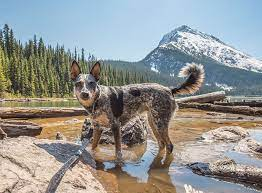

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_69.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzIcXXuT2X0OCmC3ktS8ivPRTO8XHSr5B43Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7VZuPtPr6HsEOO6T8SAuJKJDyQD6Hu9-_0Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_70.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7VZuPtPr6HsEOO6T8SAuJKJDyQD6Hu9-_0Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.wuff.eu/wp/wp-content/uploads/Cattledog_01_4c.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.wuff.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_71.jpg'>
SUCCESS - saved https://www.wuff.eu/wp/wp-content/uploads/Cattledog_01_4c.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://hundeinfoportal.de/wp-content/uploads/2018/11/australian-cattle-dog-hunderasse-rasseportraet.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hundeinfoportal.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_72.jpg'>
SUCCESS - saved https://hundeinfoportal.de/wp-content/uploads/2018/11/australian-cattle-dog-hunderasse-rasseportraet.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.vdh.de/welpen/uploads/zrfancy/640_800.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.vdh.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_73.jpg'>
SUCCESS - saved https://www.vdh.de/welpen/uploads/zrfancy/640_800.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSj82povtf0VHepN2EUzRuC7EaL15E5GEdQaQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_74.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSj82povtf0VHepN2EUzRuC7EaL15E5GEdQaQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://feragen.s3.amazonaws.com/491/AustralianCattleDog_bearbeitet_Shop.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'feragen.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_75.jpg'>
SUCCESS - saved https://feragen.s3.amazonaws.com/491/AustralianCattleDog_bearbeitet_Shop.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.zooroyal.de/magazin/wp-content/uploads/2021/03/156493_PantherMedia_1115899_australian-cattle-dog2-760x570.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_76.jpg'>
SUCCESS - saved https://www.zooroyal.de/magazin/wp-content/uploads/2021/03/156493_PantherMedia_1115899_australian-cattle-dog2-760x570.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.hunderassen.de/files/rassebilder/zoom/australian-cattle_dog.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooroyal.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hunderassen.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_77.jpg'>
SUCCESS - saved https://www.hunderassen.de/files/rassebilder/zoom/australian-cattle_dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNX4FbMs8M6kz-Vz0fm_AXLaQeFX6SYAwrCA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_78.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNX4FbMs8M6kz-Vz0fm_AXLaQeFX6SYAwrCA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://www.zooroyal.de/magazin/wp-content/uploads/2017/07/australian-cattle-dog-hunderassen-760x560.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooroyal.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_79.jpg'>
SUCCESS - saved https://www.zooroyal.de/magazin/wp-content/uploads/2017/07/australian-cattle-dog-hunderassen-760x560.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
persist
https://i.ytimg.com/vi/aVs5fog-FpQ/maxresdefault.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cattledog\\jpg_80.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/aVs5fog-FpQ/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cattledog
Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCtk5hswmEzijCepGRL2l1DVGe-O1NTpvfBA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_0.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCtk5hswmEzijCepGRL2l1DVGe-O1NTpvfBA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.warrenphotographic.co.uk/photography/bigs/44511-Cockapoo-dog-white-background.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.warrenphotographic.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_1.jpg'>
SUCCESS - saved https://www.warrenphotographic.co.uk/photography/bigs/44511-Cockapoo-dog-white-background.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://media.istockphoto.com/photos/vibrant-profile-picture-of-a-cockapoo-puppy-dog-picture-id1207034679
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_2.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/vibrant-profile-picture-of-a-cockapoo-puppy-dog-picture-id1207034679 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://pawsinwork.imgix.net/client-photos/breed-spotlight-cockapoo-BCM06425.jpg?auto=compress%2Cformat&crop=focalpoint&fit=min&fm=jpg&fp-x=0.4057&fp-y=0.4532&q=95&ratio=4000%2F6000&w=2560&s=d163f7a90dc

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pawsinwork.imgix.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_3.jpg'>
SUCCESS - saved https://pawsinwork.imgix.net/client-photos/breed-spotlight-cockapoo-BCM06425.jpg?auto=compress%2Cformat&crop=focalpoint&fit=min&fm=jpg&fp-x=0.4057&fp-y=0.4532&q=95&ratio=4000%2F6000&w=2560&s=d163f7a90dcdac86eeb03a69515633a1 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcR7g4pPhcyDmPPMd0cpVsxGkffRZUcKSs6Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_4.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcR7g4pPhcyDmPPMd0cpVsxGkffRZUcKSs6Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://media.istockphoto.com/photos/cockapoo-puppy-picture-id519470849


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_5.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/cockapoo-puppy-picture-id519470849 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://img.myloview.de/bilder/brown-cockapoo-dog-400-225689612.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.myloview.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_6.jpg'>
SUCCESS - saved https://img.myloview.de/bilder/brown-cockapoo-dog-400-225689612.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.hearingdogs.org.uk/globalassets/blog/blog-images/hope/977x550--hope-3.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hearingdogs.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_7.jpg'>
SUCCESS - saved https://www.hearingdogs.org.uk/globalassets/blog/blog-images/hope/977x550--hope-3.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://thumbs.dreamstime.com/z/cute-cockapoo-puppy-white-background-cute-week-old-cockapoo-puppy-bitch-white-background-sits-obediently-looking-158176243.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_8.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/cute-cockapoo-puppy-white-background-cute-week-old-cockapoo-puppy-bitch-white-background-sits-obediently-looking-158176243.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.hillspet.com/content/dam/cp-sites/hills/hills-pet/en_us/img/article/cockapoo-in-harness-in-grass-field-SW.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hillspet.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'welpenkaufen.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_9.jpg'>
SUCCESS - saved https://www.hillspet.com/content/dam/cp-sites/hills/hills-pet/en_us/img/article/cockapoo-in-harness-in-grass-field-SW.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://welpenkaufen.ch/wp-content/uploads/2021/12/Cockapoo.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_10.jpg'>
SUCCESS - saved https://welpenkaufen.ch/wp-content/uploads/2021/12/Cockapoo.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://media.istockphoto.com/photos/cockapoo-dog-laying-picture-id469689320?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_11.jpg'>
SUCCESS - saved https://media.is

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i2-prod.walesonline.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_12.jpg'>
SUCCESS - saved https://i2-prod.walesonline.co.uk/incoming/article20846112.ece/ALTERNATES/s615/2_Nikki-Powell-and-David-Jamess-dog-cooper-was-attacked-by-a-dog-off-its-lead-in-Ebbw-Vale.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGoDCJSd6Hs2RUAqOgZ6VWWJ1U0z0aCp3knw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_13.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGoDCJSd6Hs2RUAqOgZ6VWWJ1U0z0aCp3knw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBIgf4sAdHczOdrSZb-Laa5u0YGWfXzf9u6g&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_14.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBIgf4sAdHczOdrSZb-Laa5u0YGWfXzf9u6g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSsJxT4Pq4dJRvvAjCf29qVE9mEzULmpQyOg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_15.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSsJxT4Pq4dJRvvAjCf29qVE9mEzULmpQyOg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://c8.alamy.com/compde/k2gg1y/red-toy-cockapoo-welpen-k2gg1y.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_16.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/k2gg1y/red-toy-cockapoo-welpen-k2gg1y.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://i.ytimg.com/vi/LwcH7krGc7Q/maxresdefault.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_17.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/LwcH7krGc7Q/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.petplan.co.uk/images/breed-info/cockapoo/cockapoo_common-health-issues_petplan.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.petplan.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_18.jpg'>
SUCCESS - saved https://www.petplan.co.uk/images/breed-info/cockapoo/cockapoo_common-health-issues_petplan.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://doodle-hund.de/images/Cockapoo/Cockapoo2.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_19.jpg'>
SUCCESS - saved https://doodle-hund.de/images/Cockapoo/Cockapoo2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.mediastorehouse.com.au/p/172/cockapoo-dog-crossbreed-cocker-spaniel-poodle-651724.jpg.webp


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doodle-hund.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mediastorehouse.com.au'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_20.jpg'>
SUCCESS - saved https://www.mediastorehouse.com.au/p/172/cockapoo-dog-crossbreed-cocker-spaniel-poodle-651724.jpg.webp - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRX3D9cvwf6W7jWK7Lfd719ksmfH4b8Hig4Og&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_21.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRX3D9cvwf6W7jWK7Lfd719ksmfH4b8Hig4Og&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://t3.ftcdn.net/jpg/02/72/45/90/360_F_272459015_JajbWefb4PIqKmtXA7QkMny8qsbSORtX.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 't3.ftcdn.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_22.jpg'>
SUCCESS - saved https://t3.ftcdn.net/jpg/02/72/45/90/360_F_272459015_JajbWefb4PIqKmtXA7QkMny8qsbSORtX.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvfCqmudSQYvzcsq9hKBILWIGRY0Pl2SH2PA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_23.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvfCqmudSQYvzcsq9hKBILWIGRY0Pl2SH2PA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://dogtime.com/assets/uploads/gallery/cockapoo-dog-breed-picture-gallery/cockapoo-dog-breed-pictures-2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_24.jpg'>
SUCCESS - saved https://dogtime.com/assets/uploads/gallery/cockapoo-dog-breed-picture-gallery/cockapoo-dog-breed-pictures-2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://dogdelite.com/wp-content/uploads/2020/11/cockapoo-696x696.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogdelite.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_25.jpg'>
SUCCESS - saved https://dogdelite.com/wp-content/uploads/2020/11/cockapoo-696x696.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSh-FGjL387taGm2mQckg1eJjLVwruspeY0yA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_26.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSh-FGjL387taGm2mQckg1eJjLVwruspeY0yA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://media.gettyimages.com/photos/brown-cockapoo-dog-running-towards-the-camera-picture-id504802352?s=612x612
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_27.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/brown-cockapoo-dog-running-towards-the-camera-picture-id504802352?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6a6biVH_WW2wmzN9tAl_EfglmKzpENP2MoA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6a6biVH_WW2wmzN9tAl_EfglmKzpENP2MoA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTc1QdfCBSjtGYmoalk0F8tvXgbD7MN4AbQ5A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads proj

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_30.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNEpxeH9leOSmb3_GjOL__mgTwUBrTfO8QXg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://image.shutterstock.com/image-photo/cute-cockapoo-dog-sit-on-260nw-1929991988.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_31.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/cute-cockapoo-dog-sit-on-260nw-1929991988.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkcrQxsdH7s9s6bgc8wH4YEcb-flXcrmDncw&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_32.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkcrQxsdH7s9s6bgc8wH4YEcb-flXcrmDncw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQxgMkmsdsyjydW7pgtWvQkmmAKOpqvPADIg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_33.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQxgMkmsdsyjydW7pgtWvQkmmAKOpqvPADIg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://i.pinimg.com/originals/81/07/d9/8107d91846f4642c5026111712e6718c.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_34.jpg'>
SUCCESS 

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina-arabia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_35.jpg'>
SUCCESS - saved https://www.purina-arabia.com/sites/default/files/styles/ttt_image_510/public/2021-01/Cockapoo1.jpg?itok=xeGrlEL8 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvGFK6YMfO4Y7OqtrnlzFuMXD4L7uHhQ_cYA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_36.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvGFK6YMfO4Y7OqtrnlzFuMXD4L7uHhQ_cYA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyKlc6wEbAJg3qkFkah68Xi-ThHeh0F73gVA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied dat

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mariecurie.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_38.jpg'>
SUCCESS - saved https://www.mariecurie.org.uk/globalassets/media/images/blog/2019/february/dennis-on-sofa-square.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://st3.depositphotos.com/12380386/16473/i/600/depositphotos_164736916-stock-photo-cockapoo-puppy-looking-up-at.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_39.jpg'>
SUCCESS - saved https://st3.depositphotos.com/12380386/16473/i/600/depositphotos_164736916-stock-photo-cockapoo-puppy-looking-up-at.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSob4I1Sf8AslkXjVXg0hOmm1PeB7GXNtInvQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'st3.depositphotos.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_40.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSob4I1Sf8AslkXjVXg0hOmm1PeB7GXNtInvQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRU2aYnRqfs0WPwAzDtaCAQUNLPD3FQBcXJOA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_41.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRU2aYnRqfs0WPwAzDtaCAQUNLPD3FQBcXJOA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxcutM36sQINZ8jEc-q6nrSb3RAIcg924sIQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_42.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxcutM36sQINZ8jEc-q6nrSb3RAIcg924sIQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://kbimages1-a.akamaihd.net/b892c19b-c5fd-40ce-b225-77f9e27c2491/180/1000/False/cockapoos-the-owners-guide-from-puppy-to-old-age-buying-caring-for-grooming-health-training-and-understanding-your-cockapoo-dog.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_43.jpg'>
SUCCESS - saved https://kbimages1-a.akamaihd.net/b892c19b-c5fd-40ce-b225-77f9e27c2491/180/1000/False/cockapoos-the-owners-guide-from-puppy-to-old-age-buying-caring-for-grooming-health-training-and-understanding-your-cockapoo-dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/a

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kbimages1-a.akamaihd.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'johnlewis.scene7.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_44.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQo5KRyHZ_Zzco6Qb3ZxVZaJaacMpWZRtZPgQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://johnlewis.scene7.com/is/image/JohnLewis/237145706?$rsp-pdp-port-640$
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_45.jpg'>
SUCCESS - saved https://johnlewis.scene7.com/is/image/JohnLewis/237145706?$rsp-pdp-port-640$ - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBxLZSeU1O2SKApMBoVrtbgX5zgg5ci1gmaA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.petplan.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_46.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBxLZSeU1O2SKApMBoVrtbgX5zgg5ci1gmaA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.petplan.co.uk/images/breed-info/cockapoo/cockapoo_vital-stats_petplan.png
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_47.jpg'>
SUCCESS - saved https://www.petplan.co.uk/images/breed-info/cockapoo/cockapoo_vital-stats_petplan.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.thesun.co.uk/wp-content/uploads/2022/01/NINTCHDBPICT000704710557.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesun.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_48.jpg'>
SUCCESS - saved https://www.thesun.co.uk/wp-content/uploads/2022/01/NINTCHDBPICT000704710557.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://zigzag.dog/wp-content/uploads/2021/04/How-to-Train-a-Cockapoo-Puppy.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'zigzag.dog'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_49.jpg'>
SUCCESS - saved https://zigzag.dog/wp-content/uploads/2021/04/How-to-Train-a-Cockapoo-Puppy.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQK0o1qIUHisF2_DmFyu-BLA8Wz6Sjc4limmQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_50.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQK0o1qIUHisF2_DmFyu-BLA8Wz6Sjc4limmQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAW3Lwnpn_aJM8x7hj9vdH9gsXpFBa0NnaiQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\j

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_52.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGcjVZeYGQlsg-jMWDHDmpRKmNNIDU8LufXg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://i2-prod.mirror.co.uk/incoming/article25931427.ece/ALTERNATES/s338a/0_SWNS_DOG_DEATH_003.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_53.jpg'>
SUCCESS - saved https://i2-prod.mirror.co.uk/incoming/article25931427.ece/ALTERNATES/s338a/0_SWNS_DOG_DEATH_003.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://cdn11.bigcommerce.com/s-23d83/images/stencil/1280x1280/products/829/8875/cockapoo-puppy-fence-hanger-garden-ornament-7411-hanging-dog__34097.1637291678.jpg?c=4


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i2-prod.mirror.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn11.bigcommerce.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_54.jpg'>
SUCCESS - saved https://cdn11.bigcommerce.com/s-23d83/images/stencil/1280x1280/products/829/8875/cockapoo-puppy-fence-hanger-garden-ornament-7411-hanging-dog__34097.1637291678.jpg?c=4 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTH6QXSyBbiyOAPryDT3V4mp35p_Qo65nXnzA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_55.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTH6QXSyBbiyOAPryDT3V4mp35p_Qo65nXnzA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.zooplus.de/magazin/wp-content/uploads/2020/07/cockapoo-l%C3%A4uft-wiese-1024x768.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_56.jpg'>
SUCCESS - saved https://www.zooplus.de/magazin/wp-content/uploads/2020/07/cockapoo-l%C3%A4uft-wiese-1024x768.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQS4hpZkFd4gcbAlyaEB8glj2l1TJ-K6Xi0uQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_57.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQS4hpZkFd4gcbAlyaEB8glj2l1TJ-K6Xi0uQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcStDmd0VXKynSe90pTBAI5dRcbVk8V3FmIjKA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads pr

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'render.fineartamerica.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_59.jpg'>
SUCCESS - saved https://render.fineartamerica.com/images/rendered/small/throw-pillow/images-medium-5/cockapoo-dog-mark-taylor.jpg?transparent=0&targetx=0&targety=-105&imagewidth=479&imageheight=690&modelwidth=479&modelheight=479&backgroundcolor=FFFFFF&orientation=0&producttype=throwpillow-14-14 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.dogbreedinfo.com/images25/CockapooCockerpooCockAPooSpoodleCockerSpanielPoodleHybridDogsMatty2YearsOld1.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogbreedinfo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_60.jpg'>
SUCCESS - saved https://www.dogbreedinfo.com/images25/CockapooCockerpooCockAPooSpoodleCockerSpanielPoodleHybridDogsMatty2YearsOld1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://thumbs.dreamstime.com/z/tan-cockapoo-dog-digital-art-illustration-cute-canine-animal-mixed-breed-dog-cross-american-cocker-english-cocker-176828727.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_61.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/tan-cockapoo-dog-digital-art-illustration-cute-canine-animal-mixed-breed-dog-cross-american-cocker-english-cocker-176828727.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://kbimages1-a.akamaihd.net/562c19a0-e997-42f7-95a8-74f19a9c90ef/353/569/90/False/the-complete-guide-to-cockapoo-dogs.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_62.jpg'>
SUCCESS - saved https://kbimages1-a.akamaihd.net/562c19a0-e997-42f7-95a8-74f19a9c90ef/353/569/90/False/the-complete-guide-to-cockapoo-dogs.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRi2P_pbgM5fSOiir46VB-7GCkcxIYiw5_6oA&u

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kbimages1-a.akamaihd.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_63.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRi2P_pbgM5fSOiir46VB-7GCkcxIYiw5_6oA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_ZMKHeewIRhsh_i3YKonnRrLpTMY9ISSNTA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_64.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_ZMKHeewIRhsh_i3YKonnRrLpTMY9ISSNTA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.pitpat.com/wp-content/uploads/2020/12/Dog_-rights_CU_outdoors_puppy_stationary_-sitting-_cockapoo-1024x768.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pitpat.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_65.jpg'>
SUCCESS - saved https://www.pitpat.com/wp-content/uploads/2020/12/Dog_-rights_CU_outdoors_puppy_stationary_-sitting-_cockapoo-1024x768.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://c8.alamy.com/comp/PPM0WH/red-haired-cockapoo-dog-resting-after-play-in-a-garden-setting-PPM0WH.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_66.jpg'>
SUCCESS - saved https://c8.alamy.com/comp/PPM0WH/red-haired-cockapoo-dog-resting-after-play-in-a-garden-setting-PPM0WH.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuHCiVyNf7CRXzyYIRS30XNzXb7Niho_bKMQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_67.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuHCiVyNf7CRXzyYIRS30XNzXb7Niho_bKMQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://vetstreet.brightspotcdn.com/dims4/default/f5428b6/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F42%2F733560a7e911e0a0d500505

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_68.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/f5428b6/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F42%2F733560a7e911e0a0d50050568d634f%2Ffile%2FCockerpoo-3-645mk070411.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://i.pinimg.com/564x/fa/3e/95/fa3e958a452532d644049e3bbf41ab9d.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_69.jpg'>
SUCCESS - saved https://i.pinimg.com/564x/fa/3e/95/fa3e958a452532d644049e3bbf41ab9d.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZTpHqZOpEAJghj5inhS1zVXMrkEe5Ni8xHg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_70.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZTpHqZOpEAJghj5inhS1zVXMrkEe5Ni8xHg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://images.fineartamerica.com/images-medium-large-5/3-cockapoo-dog-mark-taylor.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.fineartamerica.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_71.jpg'>
SUCCESS - saved https://images.fineartamerica.com/images-medium-large-5/3-cockapoo-dog-mark-taylor.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://image.shutterstock.com/image-photo/cockapoo-puppy-enjoying-sunshine-garden-260nw-1647300208.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_72.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/cockapoo-puppy-enjoying-sunshine-garden-260nw-1647300208.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDaMQ6vwvr57lgw3QnbOH4XMNlPVZLwAlt_w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads proje

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_74.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/young-red-cockapoo-puppy-lying-260nw-1160022859.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.hillspet.com/content/dam/cp-sites/hills/hills-pet/en_us/exported/dog-care/Skyword/images/cockapoo-puppy-laying-on-carpet-SW.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_75.jpg'>
SUCCESS - saved https://www.hillspet.com/content/dam/cp-sites/hills/hills-pet/en_us/exported/dog-care/Skyword/images/cockapoo-puppy-laying-on-carpet-SW.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoo8rxYBv2uw5EOX0gPIOjkEq1_B8ySb8gZQ&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hillspet.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_76.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoo8rxYBv2uw5EOX0gPIOjkEq1_B8ySb8gZQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://www.hundeo.com/wp-content/uploads/2019/09/Cockapoo-Hund-Profilbild.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_77.jpg'>
SUCCESS - saved https://www.hundeo.com/wp-content/uploads/2019/09/Cockapoo-Hund-Profilbild.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaVXnpPGWu01Vx8oeUknWN68I49ZM6DIVWmw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hundeo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_78.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaVXnpPGWu01Vx8oeUknWN68I49ZM6DIVWmw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cockapoo
persist
https://vetstreet.brightspotcdn.com/dims4/default/1e3f90d/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Ff6%2Fac4090a7e811e0a0d50050568d634f%2Ffile%2FCockapoo-1-645mk070411.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cockapoo\\jpg_79.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/1e3f90d/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Ff6%2Fac4090a7e811e0a0d50050568d634f%2Ffile%2FCockapoo-1-645mk070411.jpg - as C:/Users

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
persist
https://i.ytimg.com/vi/z_L6Xu30hyw/maxresdefault.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_0.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/z_L6Xu30hyw/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.dogbible.com/i/de/coton-de-tulear-rassebeschreibung.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogbible.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_1.jpg'>
SUCCESS - saved https://www.dogbible.com/i/de/coton-de-tulear-rassebeschreibung.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://media-be.chewy.com/wp-content/uploads/2021/07/07141739/coton-de-tulear.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media-be.chewy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_2.jpg'>
fail
persist
https://www.zooplus.de/magazin/wp-content/uploads/2017/11/coton-de-tul%C3%A9ar.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_3.jpg'>
SUCCESS - saved https://www.zooplus.de/magazin/wp-content/uploads/2017/11/coton-de-tul%C3%A9ar.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_a0xCyYV0_swsQvKcdEi2yZavKIEe5LBHoQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_4.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_a0xCyYV0_swsQvKcdEi2yZavKIEe5LBHoQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://upload.wikimedia.org/wikipedia/commons/1/13/Coton_de_Tulear_dog.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [403]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_5.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/1/13/Coton_de_Tulear_dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.zooplus.de/magazin/wp-content/uploads/2017/11/coton-de-tulear-welpe-1024x682.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_6.jpg'>
SUCCESS - saved https://www.zooplus.de/magazin/wp-content/uploads/2017/11/coton-de-tulear-welpe-1024x682.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.dogtime.com/assets/uploads/2011/01/file_23230_coton-de-tulear-460x290.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_7.jpg'>
SUCCESS - saved https://www.dogtime.com/assets/uploads/2011/01/file_23230_coton-de-tulear-460x290.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://content.alphapaw.com/wp-content/uploads/2021/08/10-17.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'content.alphapaw.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_8.jpg'>
SUCCESS - saved https://content.alphapaw.com/wp-content/uploads/2021/08/10-17.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQli1fZbANSEwYAHW4wj2sJjOmyx33ycPv3tA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_9.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQli1fZbANSEwYAHW4wj2sJjOmyx33ycPv3tA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.purina.ch/sites/default/files/2018-06/Coton_de_Tulear_62752183-OK-400x378_0.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_10.jpg'>
SUCCESS - saved https://www.purina.ch/sites/default/files/2018-06/Coton_de_Tulear_62752183-OK-400x378_0.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT58Mi2HJDFUzTaJ0j0y_j-Qj7jXlotrorBlQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_11.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT58Mi2HJDFUzTaJ0j0y_j-Qj7jXlotrorBlQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.thepetsandlove.com/questions-to-consider-before-getting-a-coton-de-tulear/questions-to-consider-before-getting-a-coton-de-tulear-1452x1041.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thepetsandlove.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_12.jpg'>
SUCCESS - saved https://www.thepetsandlove.com/questions-to-consider-before-getting-a-coton-de-tulear/questions-to-consider-before-getting-a-coton-de-tulear-1452x1041.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.thekennelclub.org.uk/media/1624/coton-de-tulear-headshot.jpg?mode=pad&width=1000&rnd=132143804630000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thekennelclub.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kc-media-cdn-live.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_13.jpg'>
SUCCESS - saved https://www.thekennelclub.org.uk/media/1624/coton-de-tulear-headshot.jpg?mode=pad&width=1000&rnd=132143804630000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJhIRB9ZEVVYzUzlbPN1Tj36eKc9pDKcZWdw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_14.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJhIRB9ZEVVYzUzlbPN1Tj36eKc9pDKcZWdw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://c4.wallpaperflare.com/wallpaper/578/652/834/dog-dog-coton-de-tulear-dog-breed-wallpaper-preview.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c4.wallpaperflare.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_15.jpg'>
SUCCESS - saved https://c4.wallpaperflare.com/wallpaper/578/652/834/dog-dog-coton-de-tulear-dog-breed-wallpaper-preview.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://worlddogfinder.com/imager/880x495/upload/coton_de_tulear.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_16.jpg'>
SUCCESS - saved https://worlddogfinder.com/imager/880x495/upload/coton_de_tulear.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzlBo5avc9Mw3qZfEY07XCyfZ1fl6xiKHHGw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'worlddogfinder.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_17.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzlBo5avc9Mw3qZfEY07XCyfZ1fl6xiKHHGw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://dogtime.com/assets/uploads/gallery/coton-de-tulear-dog-breed-pictures/face-1.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_18.jpg'>
SUCCESS - saved https://dogtime.com/assets/uploads/gallery/coton-de-tulear-dog-breed-pictures/face-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUEHfHF4bhRga-4E5RnPLHUmJDEo2KfpcKXg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads pr

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_21.jpg'>
SUCCESS - saved https://c8.alamy.com/comp/BDETGT/the-coton-de-tular-is-a-small-breed-of-dog-BDETGT.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.fressnapf.ch/media/media/images/common/9.jpg.819x295_q85_crop.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fressnapf.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_22.jpg'>
SUCCESS - saved https://www.fressnapf.ch/media/media/images/common/9.jpg.819x295_q85_crop.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ84mOHkHCPnFgp2bKdfWY1gZsQaWmmZzIL8Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_23.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ84mOHkHCPnFgp2bKdfWY1gZsQaWmmZzIL8Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://i.pinimg.com/474x/88/c8/04/88c80442e7262bca70ecc98018e89e83--perry-ellis-coton-de-tulear.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dehunderassen.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_24.jpg'>
SUCCESS - saved https://i.pinimg.com/474x/88/c8/04/88c80442e7262bca70ecc98018e89e83--perry-ellis-coton-de-tulear.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.dehunderassen.de/uploads/thumbs/720x568-resize/dog/628/coton-de-tulear-13477.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_25.jpg'>
SUCCESS - saved https://www.dehunderassen.de/uploads/thumbs/720x568-resize/dog/628/coton-de-tulear-13477.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuMATy4I6rxc7LIa8Xmcg4bWkX6LzdcUxdkg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'a.storyblok.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_26.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuMATy4I6rxc7LIa8Xmcg4bWkX6LzdcUxdkg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://a.storyblok.com/f/92981/b1a63ad6c1/coton-de-tulear-secondary-1.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_27.jpg'>
SUCCESS - saved https://a.storyblok.com/f/92981/b1a63ad6c1/coton-de-tulear-secondary-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://i.pinimg.com/originals/37/33/e8/3733e80234bbc50601574c9079670e24.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'm.media-amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_28.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/37/33/e8/3733e80234bbc50601574c9079670e24.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://m.media-amazon.com/images/I/41HOuZ92Q9L.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_29.jpg'>
SUCCESS - saved https://m.media-amazon.com/images/I/41HOuZ92Q9L.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.welpen.de/cms/wp-content/uploads/2014/12/coton-de-tulear-hunderasse.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.welpen.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_30.jpg'>
SUCCESS - saved https://www.welpen.de/cms/wp-content/uploads/2014/12/coton-de-tulear-hunderasse.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxunIb7MSa8MpGQaNFBEb4xMwpSq3k4DtkOg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_31.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxunIb7MSa8MpGQaNFBEb4xMwpSq3k4DtkOg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTnz4kL86S-etSVNgbr0a9yrnql_qV1zjDecQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.swisscotonclub.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_33.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeiNwb_GacM9r0n1qwAfuJCjUBqVmRbbNJXg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.swisscotonclub.ch/wp-content/uploads/HP_Coton-de-Tulear-Club-Schweiz-scaled.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_34.jpg'>
SUCCESS - saved https://www.swisscotonclub.ch/wp-content/uploads/HP_Coton-de-Tulear-Club-Schweiz-scaled.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.look4dog.com/img/thumbs/crop/w350h350q80/breeds/coton-de-tulear-32622.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.look4dog.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_35.jpg'>
SUCCESS - saved https://www.look4dog.com/img/thumbs/crop/w350h350q80/breeds/coton-de-tulear-32622.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNgTR-PJ6s2iWVh9aTMmI0DhZYfknKH9DXuQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_36.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNgTR-PJ6s2iWVh9aTMmI0DhZYfknKH9DXuQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyFutwv22c0CDWzQLFCw-FOJW1kQOemAPv5A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data scien

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hund.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_38.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTu8wroabfE8jV7y5tBZMzx8WvoeG5ceVyAXQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.hund.ch/wp-content/uploads/2017/07/fcotontulear25.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_39.jpg'>
SUCCESS - saved https://www.hund.ch/wp-content/uploads/2017/07/fcotontulear25.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://cdn.shopify.com/s/files/1/0284/2391/3547/files/Coton-de-Tulear-puppy-outdoors_600x600.jpg?v=1616458866


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.shopify.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_40.jpg'>
SUCCESS - saved https://cdn.shopify.com/s/files/1/0284/2391/3547/files/Coton-de-Tulear-puppy-outdoors_600x600.jpg?v=1616458866 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=1200,height=675,fit=cover/animal/breed/dog/adult/5caf6299dddd2006547250.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_41.jpg'>
SUCCESS - saved https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=1200,height=675,fit=cover/animal/breed/dog/adult/5caf6299dddd2006547250.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://fullofdogs.com/wp-content/uploads/2020/03/coton-de-tulear1.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.wamiz.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fullofdogs.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_42.jpg'>
SUCCESS - saved https://fullofdogs.com/wp-content/uploads/2020/03/coton-de-tulear1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/coton-de-tulear-detail.jpg?bust=1535565553&width=355
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_43.jpg'>
SUCCESS - saved https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/coton-de-tulear-detail.jpg?bust=1535565553&width=355 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://vetstreet-brightspot.s3.amazonaws.com/9f/14/0d27f73344c09164d4161fb8ad19/coton-de-tulear-ap-6guuus-645sm61014.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17fnq9dkz9hgj.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet-brightspot.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_44.jpg'>
SUCCESS - saved https://vetstreet-brightspot.s3.amazonaws.com/9f/14/0d27f73344c09164d4161fb8ad19/coton-de-tulear-ap-6guuus-645sm61014.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://thumbs.dreamstime.com/b/coton-de-tulear-dog-outdoor-portrait-52432073.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i0.wp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_45.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/b/coton-de-tulear-dog-outdoor-portrait-52432073.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://i0.wp.com/hundemagazin.ch/wp-content/uploads/2018/10/Einstieg_RP_Coton.jpg?resize=1170%2C460
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_46.jpg'>
SUCCESS - saved https://i0.wp.com/hundemagazin.ch/wp-content/uploads/2018/10/Einstieg_RP_Coton.jpg?resize=1170%2C460 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://thumbs.dreamstime.com/z/coton-de-tulear-dog-baby-portrait-puppy-sitting-garde-little-tul%C3%A9ar-41077785.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_47.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/coton-de-tulear-dog-baby-portrait-puppy-sitting-garde-little-tul%C3%A9ar-41077785.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://media.gettyimages.com/photos/coton-de-tulear-sitting-in-the-grass-picture-id941835212?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_48.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/coton-de-tulear-sitting-in-the-grass-picture-id941835212?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7B-qetP8MRHNDREZpohzbhTv2ZoxkvKmmug&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7B-qetP8MRHNDREZpohzbhTv2ZoxkvKmmug&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlIKgPSaG3XjXCaow1d1T6pVZR7QApiqFcEQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_50.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlIKgPSaG3XjXCaow1d1T6pVZR7QApiqFcEQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5_3hVvDu_81609zCHQ8wfZZ46P4r9mY5hQQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_51.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5_3hVvDu_81609z

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'a.storyblok.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_52.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM4uoCdHRynPJK4o_0awIDKN7qSEby6Nnq4g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://a.storyblok.com/f/92981/11797730a6/coton-de-tulear-primary.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_53.jpg'>
SUCCESS - saved https://a.storyblok.com/f/92981/11797730a6/coton-de-tulear-primary.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWDTTOQsHppLYI0mXB_EOHARTVWG-E0A9yfQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.wamiz.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_54.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWDTTOQsHppLYI0mXB_EOHARTVWG-E0A9yfQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=460,height=600,fit=cover/animal/breed/pictures/61cde17a9b2fb962856596.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_55.jpg'>
SUCCESS - saved https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=460,height=600,fit=cover/animal/breed/pictures/61cde17a9b2fb962856596.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToy_jxC6LABaON_RU6Wv-niAkiuLMG8RghiA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_56.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToy_jxC6LABaON_RU6Wv-niAkiuLMG8RghiA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFcxBrVX3VAxiQ9LJ4memDyfqUSY1DRZ65hg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_57.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFcxBrVX3VAxiQ9LJ4memDyfqUSY1DRZ65hg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.purina.de/sites/default/files/styles/ttt_image_510/public/2021-02/BREED%20Hero%20Mobile_0134_coton_de_tulear.jpg?itok=tiOUMxDg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_58.jpg'>
SUCCESS - saved https://www.purina.de/sites/default/files/styles/ttt_image_510/public/2021-02/BREED%20Hero%20Mobile_0134_coton_de_tulear.jpg?itok=tiOUMxDg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQC2gBpnty7XCxkwLOWxI28qoWtE26aflJ_8w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_59.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQC2gBpnty7XCxkwLOWxI28qoWtE26aflJ_8w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTod8z72iNxxl4Q-1dxQTN56SweuKwao6H_tg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/U

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'front.embarkvet.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_61.jpg'>
SUCCESS - saved https://front.embarkvet.com/img/breeds/coton_de_tulear_v2.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQr2uVjyzW4DshG39FtneOnoUOyWJfiO2nLmw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_62.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQr2uVjyzW4DshG39FtneOnoUOyWJfiO2nLmw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.haustierratgeber.de/wp-content/uploads/2016/07/Coton-de-Tulear.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.haustierratgeber.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_63.jpg'>
SUCCESS - saved https://www.haustierratgeber.de/wp-content/uploads/2016/07/Coton-de-Tulear.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://media.istockphoto.com/photos/cute-coton-de-tulear-dog-lying-on-the-floor-picture-id529978823
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_64.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/cute-coton-de-tulear-dog-lying-on-the-floor-picture-id529978823 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKdVqud8zuvMRLu6Lkvv3qfmxYsx67GUjIqQ&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_65.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKdVqud8zuvMRLu6Lkvv3qfmxYsx67GUjIqQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://kbimages1-a.akamaihd.net/4954c706-36cd-4ba5-ae7b-47e2e053cd0c/1200/1200/False/coton-de-tulear-or-coton-coton-de-tulear-complete-dog-manual-coton-de-tulear-dog-care-costs-feeding-grooming-health-and-training-all-included.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_66.jpg'>
SUCCESS - saved https://kbimages1-a.akamaihd.net/4954c706-36cd-4ba5-ae7b-47e2e053cd0c/1200/1200/False/coton-de-tulear-or-coton-coton-de-tulear-complete-dog-manual-coton-de-tulear-dog-care-costs-feeding-grooming-health-and-training-all-included.jpg - as C:/Users/keza289/OneDrive - ZHAW

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kbimages1-a.akamaihd.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_67.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJfK6PJXa1E7-epe0zXrzeaZuSx3je1S9DvA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://mh-2-stockagency.panthermedia.net/media/previews/0011000000/11466000/11466385_preview.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_68.jpg'>
SUCCESS - saved https://mh-2-stockagency.panthermedia.net/media/previews/0011000000/11466000/11466385_preview.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmwgpLN9y2hm5L6Cs28I704UHbbDFvy_nDIQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied d

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mh-2-stockagency.panthermedia.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\kez

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_70.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNO_jwxVviLyZxS5kGW6PnxB8GHHheDW29yA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIVsBjmnIzy5V-3R_syqkRqWPYtLSzIoEk8g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_71.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIVsBjmnIzy5V-3R_syqkRqWPYtLSzIoEk8g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://media.gettyimages.com/photos/paddington-a-18monthold-coton-de-tulear-dog-poses-for-a-photograph-on-picture-id651963708?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Use

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_74.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/31/75/d3/3175d3b450cc7791fa3f63f046091222.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.swisscotonclub.ch/wp-content/uploads/Fiona-2-1024x641.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_75.jpg'>
SUCCESS - saved https://www.swisscotonclub.ch/wp-content/uploads/Fiona-2-1024x641.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLESwjpgHw2vYP2wGPVb2SQ_DkYN4xTWxW2A&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.swisscotonclub.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_76.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLESwjpgHw2vYP2wGPVb2SQ_DkYN4xTWxW2A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://cdn.pixabay.com/photo/2020/11/21/12/04/coton-de-tulear-5763796__340.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_77.jpg'>
SUCCESS - saved https://cdn.pixabay.com/photo/2020/11/21/12/04/coton-de-tulear-5763796__340.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://www.zooplus.de/magazin/wp-content/uploads/2017/11/coton-de-tulear-gl%C3%BCcklich-1024x683.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.pixabay.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_78.jpg'>
SUCCESS - saved https://www.zooplus.de/magazin/wp-content/uploads/2017/11/coton-de-tulear-gl%C3%BCcklich-1024x683.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdkDsp2LbQruT-JDHOTwIeEzRQ8g-tnEsGZw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\cotondetulear\\jpg_79.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdkDsp2LbQruT-JDHOTwIeEzRQ8g-tnEsGZw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\cotondetulear


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
persist
https://cdn.pixabay.com/photo/2016/07/15/15/55/dachshund-1519374__480.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_0.jpg'>
SUCCESS - saved https://cdn.pixabay.com/photo/2016/07/15/15/55/dachshund-1519374__480.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://c8.alamy.com/compde/t1a1pg/dackel-wurst-hund-wiener-hund-vor-weissem-hintergrund-t1a1pg.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.pixabay.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_1.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/t1a1pg/dackel-wurst-hund-wiener-hund-vor-weissem-hintergrund-t1a1pg.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzD0K3wepukHQQgKjAL2WBjzTqWp74-iuT9g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_2.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzD0K3wepukHQQgKjAL2WBjzTqWp74-iuT9g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.hepper.com/wp-content/uploads/2021/11/dachshund_Shutterstock.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hepper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_3.jpg'>
SUCCESS - saved https://www.hepper.com/wp-content/uploads/2021/11/dachshund_Shutterstock.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyB89jKv15ZY6InrqzP-HbOaVPd4cCWbTVnA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_4.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyB89jKv15ZY6InrqzP-HbOaVPd4cCWbTVnA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.thesprucepets.com/thmb/jlKEJLkcjSDwYnT8SDrM8oO0s4o=/735x0/GettyImages-839279536-313d30c290584bc0a207bc6243263bd4.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_5.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/jlKEJLkcjSDwYnT8SDrM8oO0s4o=/735x0/GettyImages-839279536-313d30c290584bc0a207bc6243263bd4.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLtWg2KZdDLK9ZefP0bcxoEDr2YN8hXvgMMg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_6.jpg'>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.rover.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLtWg2KZdDLK9ZefP0bcxoEDr2YN8hXvgMMg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.rover.com/blog/wp-content/uploads/2020/06/Dachshund-1.jpeg
<Response [403]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_7.jpg'>
SUCCESS - saved https://www.rover.com/blog/wp-content/uploads/2020/06/Dachshund-1.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://media.istockphoto.com/photos/long-dachshund-in-front-of-white-background-picture-id118439183?k=20&m=118439183&s=612x612&w=0&h=UJtybMIlPfexpiUFIB6FAkZXfSjtsx6Nv8cQjPprXZ4=


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_8.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/long-dachshund-in-front-of-white-background-picture-id118439183?k=20&m=118439183&s=612x612&w=0&h=UJtybMIlPfexpiUFIB6FAkZXfSjtsx6Nv8cQjPprXZ4= - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-jhoZYM8mPpr2Lq9IMQZ7NgsY896Ftfr-LA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_9.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-jhoZYM8mPpr2Lq9IMQZ7NgsY896Ftfr-LA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuUZDko81HeF8HcVdkHw7_ReZ2dqUDDA7TpQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_10.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuUZDko81HeF8HcVdkHw7_ReZ2dqUDDA7TpQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4UZQ-zmSE8MPQOFSmQzQK51FaCCF2vXc39A&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_11.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4UZQ-zmSE8MPQOFSmQzQK51FaCCF2vXc39A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://image.shutterstock.com/image-photo/little-dachshund-puppy-on-white-260nw-503682346.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_12.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/little-dachshund-puppy-on-white-260nw-503682346.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRvAl-sB9KFngNx2DKyVFqxV_HFb6oI-0bwQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.scotsman.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_13.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRvAl-sB9KFngNx2DKyVFqxV_HFb6oI-0bwQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.scotsman.com/webimg/b25lY21zOjVhZWQ4ZWFjLWFhNWUtNDU4MC1hZDBhLTk3NjJkMTY3YzRkYTo2YjI3MmEwNC1jOTI4LTQwZTAtYjY3Yy0zOTJhMzdjYTVmZGE=.jpg?width=640&enable=upscale
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_14.jpg'>
SUCCESS - saved https://www.scotsman.com/webimg/b25lY21zOjVhZWQ4ZWFjLWFhNWUtNDU4MC1hZDBhLTk3NjJkMTY3YzRkYTo2YjI3MmEwNC1jOTI4LTQwZTAtYjY3Yy0zOTJhMzdjYTVmZGE=.jpg?width=640&enable=upscale - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://image.shutterstock.com/image-photo/dachshund-dog-isola

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_15.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/dachshund-dog-isolated-over-white-260nw-73171384.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://content.alphapaw.com/wp-content/uploads/2019/08/The-3-Types-of-Dachshunds-Do-You-Know-Them-All.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'content.alphapaw.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_16.jpg'>
SUCCESS - saved https://content.alphapaw.com/wp-content/uploads/2019/08/The-3-Types-of-Dachshunds-Do-You-Know-Them-All.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrmu8YZwVFM59adjQCakji46DTJb4w1zbn9Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_17.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrmu8YZwVFM59adjQCakji46DTJb4w1zbn9Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://upload.wikimedia.org/wikipedia/commons/2/27/Short-haired-Dachshund.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_18.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/2/27/Short-haired-Dachshund.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.thesprucepets.com/thmb/9JriP9usRjnLCSqHF03hJQybqBA=/1500x844/smart/filters:no_upscale()/breed-profile-dachshund-1117959-hero-2871a48a9ebf4ab1a19427a8bfd3f1b6.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_19.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/9JriP9usRjnLCSqHF03hJQybqBA=/1500x844/smart/filters:no_upscale()/breed-profile-dachshund-1117959-hero-2871a48a9ebf4ab1a19427a8bfd3f1b6.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://breedingbusiness.com/wp-content/uploads/2020/02/dachshund-dog-names.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_20.jpg'>
SUCCESS - saved https://breedingbusiness.com/wp-content/uploads/2020/02/dachshund-dog-names.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSymqQBxD5gnVKuSqa6eFv633IgVHkWZpEpqg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'breedingbusiness.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_21.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSymqQBxD5gnVKuSqa6eFv633IgVHkWZpEpqg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F08%2F08%2Fdachshund-puppy-990135616-2000.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imagesvc.meredithcorp.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_22.jpg'>
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F08%2F08%2Fdachshund-puppy-990135616-2000.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJSWMAgQzUS2VoMLevMX71ClUX6Is6wZZtXg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_23.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJSWMAgQzUS2VoMLevMX71ClUX6Is6wZZtXg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwUaKq9lfZ1HM4YMilnOTdiMQ9uwtm-eKamg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Use

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.akc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_25.jpg'>
SUCCESS - saved https://www.akc.org/wp-content/uploads/2017/11/Longhaired-Dachshund-standing-outdoors.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://cdn.britannica.com/81/12481-004-1AD2693C.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_26.jpg'>
SUCCESS - saved https://cdn.britannica.com/81/12481-004-1AD2693C.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://dachshundjoy-za8lt3puptit.netdna-ssl.com/wp-content/uploads/2017/12/Brown-standard-doxie-lying-on-path-8580023731_67a8c82d5f_k1024OPT-984x502.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.britannica.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dachshundjoy-za8lt3puptit.netdna-ssl.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_27.jpg'>
SUCCESS - saved https://dachshundjoy-za8lt3puptit.netdna-ssl.com/wp-content/uploads/2017/12/Brown-standard-doxie-lying-on-path-8580023731_67a8c82d5f_k1024OPT-984x502.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjsqZyIKmU1Zct0BhMdOtsRCMpqBODtNcXwA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjsqZyIKmU1Zct0BhMdOtsRCMpqBODtNcXwA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://image.shutterstock.com/z/stock-photo-a-red-dachshund-puppy-looks-at-the-camera-cute-puppy-sitting-dachshund-on-the-background-of-dry-1803699

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_29.jpg'>
SUCCESS - saved https://image.shutterstock.com/z/stock-photo-a-red-dachshund-puppy-looks-at-the-camera-cute-puppy-sitting-dachshund-on-the-background-of-dry-1803699706.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://pbs.twimg.com/media/FPQ7l4BXIAQTzuv.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pbs.twimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_30.jpg'>
SUCCESS - saved https://pbs.twimg.com/media/FPQ7l4BXIAQTzuv.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKqVYJVSiqnCkRxvZUzwoNandZ88-AAISsqA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_31.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKqVYJVSiqnCkRxvZUzwoNandZ88-AAISsqA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQCW9po6f5NUTMoFtMGUPrvGSrfeMOUtth9Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_32.jpg'>
SUCCESS - saved

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_33.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjbmboDGWjZS4Gb7Urwk3BTf67zJJiwqDuXg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaYJnIwyFdwi1xULRZrNppxnIXmGklA51dFQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_34.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaYJnIwyFdwi1xULRZrNppxnIXmGklA51dFQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwPG183aTEv9g1JE_coisQtGkrsx9k0bKPqA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.k9web.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_36.jpg'>
SUCCESS - saved https://www.k9web.com/wp-content/uploads/2019/01/smooth-haired-dachshund-dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQU-0ViGJkpAOjpE6Sz8SWaNNv59_335uvemQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_37.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQU-0ViGJkpAOjpE6Sz8SWaNNv59_335uvemQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://geniusvets.s3.amazonaws.com/gv-dog-breeds/dachshund-1.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'geniusvets.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_38.jpg'>
SUCCESS - saved https://geniusvets.s3.amazonaws.com/gv-dog-breeds/dachshund-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTB1ekBlaDUg7TkpWCtjHRKK5YP0d5UDuIlGw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_39.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTB1ekBlaDUg7TkpWCtjHRKK5YP0d5UDuIlGw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzcg9T8q8n5mqQs8FC5NdxQ0QyxrrYEqb0ZQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_40.jpg

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imagesvc.meredithcorp.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_41.jpg'>
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcf-images.us-east-1.prod.boltdns.net%2Fv1%2Fstatic%2F6157254766001%2F2ec96597-1cc9-4403-a2d1-b6fba8deb6d5%2F352a8289-837c-4e31-bab9-dd475b098d8d%2F1280x720%2Fmatch%2Fimage.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://i.pinimg.com/564x/a2/55/d2/a255d228aed9c555d56e0cea4aa06578.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_42.jpg'>
SUCCESS - saved https://i.pinimg.com/564x/a2/55/d2/a255d228aed9c555d56e0cea4aa06578.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://i.guim.co.uk/img/media/a8f0c9273864a3aca625863659b270ea30163254/0_0_2102_1261/master/2102.jpg?width=465&quality

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.guim.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_43.jpg'>
SUCCESS - saved https://i.guim.co.uk/img/media/a8f0c9273864a3aca625863659b270ea30163254/0_0_2102_1261/master/2102.jpg?width=465&quality=45&auto=format&fit=max&dpr=2&s=8da9149b00f61c28f9bc7dc6b18947ec - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://ilovedachshunds.b-cdn.net/wp-content/uploads/2019/09/Dachshund-Puppy-Care-Guide.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ilovedachshunds.b-cdn.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_44.jpg'>
SUCCESS - saved https://ilovedachshunds.b-cdn.net/wp-content/uploads/2019/09/Dachshund-Puppy-Care-Guide.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://d3544la1u8djza.cloudfront.net/APHI/Blog/2016/11_November/11-07/Meet+the+Dachshund+_+Personality+Health+and+Care+_+ASPCA+Pet+Health+Insurance+_+red+wiener+dog+sitting+on+a+couch-min.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_45.jpg'>
SUCCESS - saved https://d3544la1u8djza.cloudfront.net/APHI/Blog/2016/11_November/11-07/Meet+the+Dachshund+_+Personality+Health+and+Care+_+ASPCA+Pet+Health+Insurance+_+red+wiener+dog+sitting+on+a+couch-min.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.g

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd3544la1u8djza.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_46.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3bvX8XrJxPhv81kYQnMQCuTfiYOkOrsj9kw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.pdsa.org.uk/media/9901/gallery-8-dachshund-puppy.jpg?anchor=center&mode=crop&quality=100&height=500&bgcolor=fff&rnd=132409430340000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pdsa.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_47.jpg'>
SUCCESS - saved https://www.pdsa.org.uk/media/9901/gallery-8-dachshund-puppy.jpg?anchor=center&mode=crop&quality=100&height=500&bgcolor=fff&rnd=132409430340000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxEAen8J-SIhj32RBR8Rw3Sd1GQQpUIPiYDw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_48.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxEAen8J-SIhj32RBR8Rw3Sd1GQQpUIPiYDw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrJy-lrkYBNPObU5RS4BjVpR_ULeixpUCnmA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/kez

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_50.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRP5ViXMnLUnfNFxSJiutSx6o2rEpd_o4c-QA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://media.istockphoto.com/photos/manipulated-image-of-a-very-long-dachshund-dog-black-and-tan-on-a-picture-id1093670332
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_51.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/manipulated-image-of-a-very-long-dachshund-dog-black-and-tan-on-a-picture-id1093670332 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5UCW0KgnYlFQEretjvU1Qac7lBC2bwqGbYA&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_52.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5UCW0KgnYlFQEretjvU1Qac7lBC2bwqGbYA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTk82E0oCCALi3v9bRvXeYthPfYjJPFZn7B1w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_53.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTk82E0oCCALi3v9bRvXeYthPfYjJPFZn7B1w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzufLBp940ysxpM_b-93Ioo6Y_9kVUmtrZ6g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dach

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'scanner.siwalusoftware.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_55.jpg'>
SUCCESS - saved https://scanner.siwalusoftware.com/breed_images/dog/dachshund/dachshund.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://c8.alamy.com/comp/EBR4TM/short-haired-dachshund-short-haired-sausage-dog-domestic-dog-canis-EBR4TM.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_56.jpg'>
SUCCESS - saved https://c8.alamy.com/comp/EBR4TM/short-haired-dachshund-short-haired-sausage-dog-domestic-dog-canis-EBR4TM.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5De3CFmq6JePXqIJojSIn6Zx6-NMcs7Rsuw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_57.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5De3CFmq6JePXqIJojSIn6Zx6-NMcs7Rsuw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://dinoanimals.com/wp-content/uploads/2021/07/Dachshund-4.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dinoanimals.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_58.jpg'>
SUCCESS - saved https://dinoanimals.com/wp-content/uploads/2021/07/Dachshund-4.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmPqO12SS1ryuMV7PyItdUDVaqife2AYAtMQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_59.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmPqO12SS1ryuMV7PyItdUDVaqife2AYAtMQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRPB1hyLhEaIwj3F88-cL7iBpiqz0Z2j6SKrw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_60.jp

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anacond

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_61.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/portrait-of-a-puppy-miniature-dachshund-short-haired-black-and-tan-a-picture-id1153057966?k=20&m=1153057966&s=612x612&w=0&h=_DRDS6_2dLx314_ORGfZRFWb28kqpn7XPhtyIwV2MtM= - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.dogtime.com/assets/uploads/2011/01/file_23020_dachshund-dog-breed.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_62.jpg'>
SUCCESS - saved https://www.dogtime.com/assets/uploads/2011/01/file_23020_dachshund-dog-breed.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHUa5FhgMrqS3a27FywnUqlbQf9QJbWbac9Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_63.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHUa5FhgMrqS3a27FywnUqlbQf9QJbWbac9Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://m.media-amazon.com/images/I/31XG337mBPL._AC_.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_64.jpg'>
SUCCESS - saved https://

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'm.media-amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yourpurebredpuppy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\l

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_65.jpg'>
SUCCESS - saved https://www.yourpurebredpuppy.com/dogbreeds/photos-CD/dachshundsf2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGPVdz771iOYf_i2cipctYQunpgNHuy3mjgQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_66.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGPVdz771iOYf_i2cipctYQunpgNHuy3mjgQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://keyassets.timeincuk.net/inspirewp/live/wp-content/uploads/sites/8/2019/05/Stanley-the-Dachshund-70_284814301_502739581-920x613.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'keyassets.timeincuk.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hepper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_67.jpg'>
SUCCESS - saved https://keyassets.timeincuk.net/inspirewp/live/wp-content/uploads/sites/8/2019/05/Stanley-the-Dachshund-70_284814301_502739581-920x613.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.hepper.com/wp-content/uploads/2021/11/Dachshund_Shutterstock_Liliya-Kulianionak.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_68.jpg'>
SUCCESS - saved https://www.hepper.com/wp-content/uploads/2021/11/Dachshund_Shutterstock_Liliya-Kulianionak.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1ehPA6dULt5Y_Pc1ibGy6tcz3dc__JHdNyQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_69.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1ehPA6dULt5Y_Pc1ibGy6tcz3dc__JHdNyQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://content.alphapaw.com/wp-content/uploads/2022/02/Dachshund-Grooming-How-To-Care-For-Your-Sausage-Dog-600x338.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'content.alphapaw.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_70.jpg'>
SUCCESS - saved https://content.alphapaw.com/wp-content/uploads/2022/02/Dachshund-Grooming-How-To-Care-For-Your-Sausage-Dog-600x338.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://e3.365dm.com/21/09/768x432/skynews-sausage-dog-dachshunds_5501402.jpg?20210905120626
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_71.jpg'>
SUCCESS - saved https://e3.365dm.com/21/09/768x432/skynews-sausage-dog-dachshunds_5501402.jpg?20210905120626 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://i.pinimg.com/550x/c9/58/73/c9587316b72517ec63e54053f1fcf3df.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'e3.365dm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_72.jpg'>
SUCCESS - saved https://i.pinimg.com/550x/c9/58/73/c9587316b72517ec63e54053f1fcf3df.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNL9FhKQ5oYZeFFHpdq7dGsx2ckc_WPgyzsA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_73.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNL9FhKQ5oYZeFFHpdq7dGsx2ckc_WPgyzsA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQa5dDvb39b2eXFeA88Q9HmQS88eN3fTOxupg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_74.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQa5dDvb39b2eXFeA88Q9HmQS88eN3fTOxupg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.purina.de/sites/default/files/styles/ttt_image_510/public/2021-02/BREED%20Hero%20Mobile_0130_dachshund_smooth_mini.jpg?itok=VWhDhag0
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_75.jpg'>
SUCCESS - saved https://www.purina.de/sites/default/files/styles/ttt_image_510/public/2021-02/BREED%20Hero%20Mobile_0130_dachshund_smooth_mini.jpg?itok=VWhDhag0 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Kurzhaardackel.jpg/300px-Kurzhaardackel.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_76.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Kurzhaardackel.jpg/300px-Kurzhaardackel.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://www.purina-arabia.com/sites/default/files/styles/ttt_image_510/public/2021-01/Dachshund%20%28Smooth-Haired%291.jpg?itok=T0Kq4L-Y


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina-arabia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_77.jpg'>
SUCCESS - saved https://www.purina-arabia.com/sites/default/files/styles/ttt_image_510/public/2021-01/Dachshund%20%28Smooth-Haired%291.jpg?itok=T0Kq4L-Y - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://media.istockphoto.com/photos/dachshund-sausage-dog-1-year-old-sitting-in-front-of-white-background-picture-id1137958103
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_78.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/dachshund-sausage-dog-1-year-old-sitting-in-front-of-white-background-picture-id1137958103 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
persist
https://dogtime.com/assets/uploads/gallery/dachshund-dog-breed-pictures/side-5_680-453.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dachshund\\jpg_79.jpg'>
SUCCESS - saved https://dogtime.com/assets/uploads/gallery/dachshund-dog-breed-pictures/side-5_680-453.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dachshund
Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
persist
https://www.akc.org/wp-content/uploads/2017/11/Dalmatian-On-White-01.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_0.jpg'>
SUCCESS - saved https://www.akc.org/wp-content/uploads/2017/11/Dalmatian-On-White-01.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSdVIhqj2-YsxDIlkUV8k-VNCJUwGEwstG0A&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.akc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_1.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSdVIhqj2-YsxDIlkUV8k-VNCJUwGEwstG0A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3M6H-k3i59kGB2uA67tTE80gvOu-IvdzRig&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_2.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3M6H-k3i59kGB2uA67tTE80gvOu-IvdzRig&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSuujxeuy5fA68Ha3CHmK-FfK0dTEcDntmyyA&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_3.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSuujxeuy5fA68Ha3CHmK-FfK0dTEcDntmyyA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRr_asYSUIEkqb9_Uj_dnVSt2AL9CJQ2rZmbA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_4.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRr_asYSUIEkqb9_Uj_dnVSt2AL9CJQ2rZmbA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://www.thekennelclub.org.uk/media/1684/dalmatian-standing.jpg?mode=pad&width=1000&rnd=132143813480000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thekennelclub.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kc-media-cdn-live.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_5.jpg'>
SUCCESS - saved https://www.thekennelclub.org.uk/media/1684/dalmatian-standing.jpg?mode=pad&width=1000&rnd=132143813480000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGP7N8hLiYq_lgJr-gQm72nJncHXVzBACQ4w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_6.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGP7N8hLiYq_lgJr-gQm72nJncHXVzBACQ4w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://www.imago-images.de/bild/st/0098650560/w.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imago-images.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_7.jpg'>
SUCCESS - saved https://www.imago-images.de/bild/st/0098650560/w.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://animals.net/wp-content/uploads/2018/08/Dalmatian-4-650x425.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_8.jpg'>
SUCCESS - saved https://animals.net/wp-content/uploads/2018/08/Dalmatian-4-650x425.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://scanner.siwalusoftware.com/breed_images/dog/dalmatian/dalmatian.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'animals.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'scanner.siwalusoftware.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_9.jpg'>
SUCCESS - saved https://scanner.siwalusoftware.com/breed_images/dog/dalmatian/dalmatian.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://c8.alamy.com/comp/DPB5A4/dalmatian-dog-at-the-park-DPB5A4.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_10.jpg'>
SUCCESS - saved https://c8.alamy.com/comp/DPB5A4/dalmatian-dog-at-the-park-DPB5A4.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://ichef.bbci.co.uk/news/400/cpsprodpb/156A1/production/_108131778_dogs.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ichef.bbci.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_11.jpg'>
SUCCESS - saved https://ichef.bbci.co.uk/news/400/cpsprodpb/156A1/production/_108131778_dogs.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://www.pdsa.org.uk/media/7884/dalmatian-gallery-outdoors-2-min.jpg?anchor=center&mode=crop&quality=100&height=500&bgcolor=fff&rnd=132179483000000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pdsa.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_12.jpg'>
SUCCESS - saved https://www.pdsa.org.uk/media/7884/dalmatian-gallery-outdoors-2-min.jpg?anchor=center&mode=crop&quality=100&height=500&bgcolor=fff&rnd=132179483000000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKCnmal6p2Ypb6FLZ9Fxw8B_bLoIRvSJU9GA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_13.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKCnmal6p2Ypb6FLZ9Fxw8B_bLoIRvSJU9GA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2zcq4rK6_ur6AMYEoNVOxjJ2W_9SO7MpsWg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Us

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_15.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/dalmatian-dog-picture-id1139874537?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://media.istockphoto.com/photos/two-dalmatian-puppies-in-front-of-a-white-background-picture-id509043186


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'previews.123rf.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_16.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/two-dalmatian-puppies-in-front-of-a-white-background-picture-id509043186 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://previews.123rf.com/images/ewastudio/ewastudio1703/ewastudio170300223/73298402-perro-d%C3%A1lmata-perro-d%C3%A1lmata-.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_17.jpg'>
SUCCESS - saved https://previews.123rf.com/images/ewastudio/ewastudio1703/ewastudio170300223/73298402-perro-d%C3%A1lmata-perro-d%C3%A1lmata-.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrz675oq3k09jRzOfIzSOEMQK1g9YbD1e62Q&usqp=CAU
<Response [200]>
<_io.BufferedWrit

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yourpurebredpuppy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_19.jpg'>
SUCCESS - saved https://www.yourpurebredpuppy.com/dogbreeds/photos-CD/dalmatiansf6.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://static.independent.co.uk/s3fs-public/thumbnails/image/2020/05/18/08/caters-dalmatian-has-18-puppies-013-3369506-main-0.jpg?width=1200


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'static.independent.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_20.jpg'>
SUCCESS - saved https://static.independent.co.uk/s3fs-public/thumbnails/image/2020/05/18/08/caters-dalmatian-has-18-puppies-013-3369506-main-0.jpg?width=1200 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEifDVhsMPKwur9Cm-jsD2JR4LY7uKqNdqMA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_21.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEifDVhsMPKwur9Cm-jsD2JR4LY7uKqNdqMA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://i.pinimg.com/originals/88/8a/52/888a520875f01246e31a30bbf33602af.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_22.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/88/8a/52/888a520875f01246e31a30bbf33602af.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://m.media-amazon.com/images/I/51hQbTSv4KL._AC_SY580_.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_23.jpg'>
SUCCESS - saved https://m.media-amazon.com/images/I/51hQbTSv4KL._AC_SY580_.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://product-image.juniqe-production.juniqe.com/media/catalog/product/seo-cache/x800/790/87/790-87-101P/Dalmatian-Puppy-Paws--Claws-Poster.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'm.media-amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'product-image.juniqe-production.juniqe.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_24.jpg'>
SUCCESS - saved https://product-image.juniqe-production.juniqe.com/media/catalog/product/seo-cache/x800/790/87/790-87-101P/Dalmatian-Puppy-Paws--Claws-Poster.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://media.istockphoto.com/photos/dalmatian-puppy-sitting-looking-at-the-camera-isolated-picture-id456097937
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_25.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/dalmatian-puppy-sitting-looking-at-the-camera-isolated-picture-id456097937 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvD5-iTREs4gcJHb3txwkDg-mo1e80O5Qnsg&usqp=CAU
<Response [200]>
<_io.BufferedWr

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i0.wp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_27.jpg'>
SUCCESS - saved https://i0.wp.com/petsforcare.com/wp-content/uploads/2020/08/Dalmatian-puppy.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzUn6VOkwiSeHcNrfKCKJer6iUuH9aIekYIQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzUn6VOkwiSeHcNrfKCKJer6iUuH9aIekYIQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKeETPvfiU9KVVTwlnZ0zwWl56NM_2fsUnhg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmat

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.weltbild.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\s

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_30.jpg'>
SUCCESS - saved https://i.weltbild.de/p/dalmatian-puppies-dalmatiner-welpen-2022-16-317243831.jpg?v=1&wp=_ads-minzoom2 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://cdn.winknews.com/wp-content/uploads/2021/11/Dalmatians-e1637285893143.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_31.jpg'>
SUCCESS - saved https://cdn.winknews.com/wp-content/uploads/2021/11/Dalmatians-e1637285893143.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://image.shutterstock.com/image-photo/little-dalmatian-puppy-lies-on-260nw-1879676644.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media-be.chewy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_32.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/little-dalmatian-puppy-lies-on-260nw-1879676644.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://media-be.chewy.com/wp-content/uploads/2021/05/27134335/Dalmatian_FeaturedImage.jpg
fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_33.jpg'>
fail
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaWWEC7WrWUAItlfET62Q_6YT98Y1lutJ9Lw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_34.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaWWEC7WrWUAItlfET62Q_6YT98Y1lutJ9Lw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads p

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_35.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/0dOMlSxeggeFALx-8jsdFWdj4bM=/3253x2440/smart/filters:no_upscale()/Dalmatian-GettyImages-688071233-a114aad7474b4e1585c1f4826450663c.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6oKLZniMiKvYL-FKfcbs6yRrwTWYbYsV1Ng&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_36.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6oKLZniMiKvYL-FKfcbs6yRrwTWYbYsV1Ng&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKfXY6aTMxzT9X4OCugqEYq2cf_LoJlOVAog&usqp=CAU
<Response [200]>
<_io.BufferedWr

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_38.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQD5s1-5tSzEXSlFzLb3eEqYim_1UhaqSc05w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://thumb.mp-farm.com/79422083/preview.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_39.jpg'>
SUCCESS - saved https://thumb.mp-farm.com/79422083/preview.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXCPTwQERTZ-Ob5CSvJlV5GsRGuYmil04Nhg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumb.mp-farm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_40.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXCPTwQERTZ-Ob5CSvJlV5GsRGuYmil04Nhg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://static.wikia.nocookie.net/disney/images/a/aa/DalmatianPuppies.jpg/revision/latest?cb=20220122164636


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'static.wikia.nocookie.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_41.jpg'>
SUCCESS - saved https://static.wikia.nocookie.net/disney/images/a/aa/DalmatianPuppies.jpg/revision/latest?cb=20220122164636 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://vetstreet.brightspotcdn.com/dims4/default/743d415/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fee%2F140380a73111e0a0d50050568d634f%2Ffile%2FDalmatian-2-645mk062311.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_42.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/743d415/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fee%2F140380a73111e0a0d50050568d634f%2Ffile%2FDalmatian-2-645mk062311.jpg 

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_43.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROTDGDlixQoNOLjCIHBsLaWJ5ND0Fof5jIEg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkaJg7Blqwmcq68sjF0S-qTHYoX0rSMj33mA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_44.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkaJg7Blqwmcq68sjF0S-qTHYoX0rSMj33mA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://138361903108792803.weebly.com/uploads/2/3/2/2/23223158/editor/g-kull-7d-versjon-2.jpg?1630694699


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '138361903108792803.weebly.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_45.jpg'>
SUCCESS - saved https://138361903108792803.weebly.com/uploads/2/3/2/2/23223158/editor/g-kull-7d-versjon-2.jpg?1630694699 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://cdn20.pamono.com/p/g/1/0/1082979_arj5icbsfw/large-dalmatian-dog-1.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn20.pamono.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_46.jpg'>
SUCCESS - saved https://cdn20.pamono.com/p/g/1/0/1082979_arj5icbsfw/large-dalmatian-dog-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://media.istockphoto.com/photos/four-dalmatian-puppy-picture-id1291201580?b=1&k=20&m=1291201580&s=170667a&w=0&h=fuaFWDtoAHhWDJwTSpqcFa8NW9f1zTiwAt_V54VQv8A=
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_47.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/four-dalmatian-puppy-picture-id1291201580?b=1&k=20&m=1291201580&s=170667a&w=0&h=fuaFWDtoAHhWDJwTSpqcFa8NW9f1zTiwAt_V54VQv8A= - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeEFxrLdPpCR_fxZKg0QBIXnnb07CqVb-qmA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_48.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeEFxrLdPpCR_fxZKg0QBIXnnb07CqVb-qmA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeoxVmldm5L3AoR2nmjT-jdiAHCd30__i_eQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_49.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeoxVmldm5L3AoR2nmjT-jdiAHCd30__i_eQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYIzi8P6XavVIfTpXTTBG4OEpgQT11HJxUhw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c.stocksy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_50.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYIzi8P6XavVIfTpXTTBG4OEpgQT11HJxUhw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://c.stocksy.com/a/bRn900/z9/2335019.jpg
<Response [403]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_51.jpg'>
SUCCESS - saved https://c.stocksy.com/a/bRn900/z9/2335019.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3p0B03dQZVZO5TaxvD5PD24BQMUcnRbEy6Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_52.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn1.vectorstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_53.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/05410e1/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F9f%2Feb8180a80111e0a0d50050568d634f%2Ffile%2FDalmatian-5-645mk070411.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://cdn1.vectorstock.com/i/1000x1000/32/00/cute-dalmatian-dog-vector-2603200.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_54.jpg'>
SUCCESS - saved https://cdn1.vectorstock.com/i/1000x1000/32/00/cute-dalmatian-dog-vector-2603200.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://www.dogtime.com/assets/uploads/2011/01/file_23146_dalmatian-460x290.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_55.jpg'>
SUCCESS - saved https://www.dogtime.com/assets/uploads/2011/01/file_23146_dalmatian-460x290.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://img.pixers.pics/pho_wat(s3:700/FO/37/14/23/84/700_FO37142384_21af6897d0bb168ac2964bf4dc7c1377.jpg,462,700,cms:2018/10/5bd1b6b8d04b8_220x50-watermark.png,over,242,650,jpg)/fototapeten-dalmatian-dog-portrait.jpg.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_56.jpg'>
SUCCESS - saved https://img.pixers.pics/pho_wat(s3:700/FO/37/14/23/84/700_FO37142384_21af6897d0bb168ac2964bf4dc7c1377.jpg,462,700,cms:2018/10/5bd1b6b8d04b8_220x50-watermark.png,over,242,650,jpg)/fototapeten-dalmatian-dog-portrait.jpg.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads proj

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.pixers.pics'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'st.focusedcollection.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_57.jpg'>
SUCCESS - saved https://st.focusedcollection.com/9163412/i/1800/focused_309990676-stock-photo-portrait-amazing-dalmatian-dog-looking.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://vetstreet-brightspot.s3.amazonaws.com/86/fae2e0a73111e0a0d50050568d634f/file/Dalmatian-1-645mk062311.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet-brightspot.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_58.jpg'>
SUCCESS - saved https://vetstreet-brightspot.s3.amazonaws.com/86/fae2e0a73111e0a0d50050568d634f/file/Dalmatian-1-645mk062311.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnRBuAQKMUFwrfAL9Dy-qbUSGQIraHlYPXyw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_59.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnRBuAQKMUFwrfAL9Dy-qbUSGQIraHlYPXyw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://thumbs.dreamstime.com/z/brown-white-month-old-dalmatian-dog-puppy-29720082.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_60.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/brown-white-month-old-dalmatian-dog-puppy-29720082.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://media.gettyimages.com/photos/girl-with-dalmatian-dog-picture-id1315129977?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_61.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/girl-with-dalmatian-dog-picture-id1315129977?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://gemeinschaftsrassen.io/wp-content/uploads/2021/02/Dalmatinerwelpen-1.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gemeinschaftsrassen.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_62.jpg'>
SUCCESS - saved https://gemeinschaftsrassen.io/wp-content/uploads/2021/02/Dalmatinerwelpen-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://upload.wikimedia.org/wikipedia/commons/1/15/Dalmatiner_2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_63.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/1/15/Dalmatiner_2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTY97VQD73KevJxkuUmx1R9hNn8nwFIZwulhw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_64.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTY97VQD73KevJxkuUmx1R9hNn8nwFIZwulhw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://www.loveyourdog.com/wp-content/uploads/2021/05/Dalmatian-900x500.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.loveyourdog.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_65.jpg'>
SUCCESS - saved https://www.loveyourdog.com/wp-content/uploads/2021/05/Dalmatian-900x500.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://previews.123rf.com/images/ewastudio/ewastudio1703/ewastudio170300550/74437241-dalmatian-dog-dalmatian-puppy-.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_66.jpg'>
SUCCESS - saved https://previews.123rf.com/images/ewastudio/ewastudio1703/ewastudio170300550/74437241-dalmatian-dog-dalmatian-puppy-.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQr4XD87BFvdC2yKJoqGEwCRR1QHzPtAp7GRg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'previews.123rf.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_67.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQr4XD87BFvdC2yKJoqGEwCRR1QHzPtAp7GRg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://www.purina.com.au/-/media/project/purina/main/breeds/dog/mobile/dog_dalmatian_mobile.jpg?h=300&la=en&w=375&hash=F7C8808D6B26754DAFFD0A0CF56FFA5A


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.com.au'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_68.jpg'>
SUCCESS - saved https://www.purina.com.au/-/media/project/purina/main/breeds/dog/mobile/dog_dalmatian_mobile.jpg?h=300&la=en&w=375&hash=F7C8808D6B26754DAFFD0A0CF56FFA5A - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://img.fruugo.com/product/6/77/153125776_max.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_69.jpg'>
SUCCESS - saved https://img.fruugo.com/product/6/77/153125776_max.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2DFn2BeX46VhYHmMBu42V7Nq_O0mlJTcmTg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.fruugo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_70.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2DFn2BeX46VhYHmMBu42V7Nq_O0mlJTcmTg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://shop-cdn-m.mediazs.com/bilder/royal/canin/dalmatian/puppy/4/800/84604_rc_bhn_puppydalmatian_mv_main_de_de_4.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_71.jpg'>
SUCCESS - saved https://shop-cdn-m.mediazs.com/bilder/royal/canin/dalmatian/puppy/4/800/84604_rc_bhn_puppydalmatian_mv_main_de_de_4.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2Y52mwK2fsgr7lz6weqLS0SgAJFM4-9reWw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'shop-cdn-m.mediazs.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_72.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2Y52mwK2fsgr7lz6weqLS0SgAJFM4-9reWw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://i.pinimg.com/originals/4e/cf/64/4ecf6464779d94c5f2b6fb3cbd2dbe9e.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_73.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/4e/cf/64/4ecf6464779d94c5f2b6fb3cbd2dbe9e.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSbqeZT8WXqYNXOX4Kdb6kwEuXbkOJnXQuyvA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_74.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSbqeZT8WXqYNXOX4Kdb6kwEuXbkOJnXQuyvA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPLGqjfCXBfDbo7-DBZ0y6Q-i2_gEUtZXXDg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_75.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPLGqjfCXBfDbo7-DBZ0y6Q-i2_gEUtZXXDg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJJyCt5nJCT4Obk1rqxPT5-bkEgLDkm4VY3A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_76.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJJyCt5nJCT4Obk1rqxPT5-bkEgLDkm4VY3A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://image.shutterstock.com/image-photo/dalmatian-dog-portrait-stood-tall-260nw-1161034495.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ad

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.croatiaweek.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_78.jpg'>
SUCCESS - saved https://www.croatiaweek.com/wp-content/uploads/2021/11/dalmatian-dog-croatian-coin-715x429.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFKjeAXuBKWQCqEDyX58QjWsvZTGBTLQ7Idg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\dalmatian\\jpg_79.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFKjeAXuBKWQCqEDyX58QjWsvZTGBTLQ7Idg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\dalmatian


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Found: 100 search results. Extracting links from 0:100
Found: 81 image links, done!
persist
https://i.pinimg.com/736x/f6/3a/58/f63a58942b12fb8ed997418babca4ab6.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_0.jpg'>
SUCCESS - saved https://i.pinimg.com/736x/f6/3a/58/f63a58942b12fb8ed997418babca4ab6.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://media.istockphoto.com/photos/cute-sitting-havanese-puppy-dog-picture-id611308904?s=612x612


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_1.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/cute-sitting-havanese-puppy-dog-picture-id611308904?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Havanese0315.jpg/200px-Havanese0315.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_2.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Havanese0315.jpg/200px-Havanese0315.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://faadi.com/wp-content/uploads/2020/07/Havanese-standing-outdoors.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'faadi.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_3.jpg'>
SUCCESS - saved https://faadi.com/wp-content/uploads/2020/07/Havanese-standing-outdoors.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtJPfeXqZXecYXRyRcKQ1eswEpnazeKn31xg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_4.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtJPfeXqZXecYXRyRcKQ1eswEpnazeKn31xg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSbkr4ov6epkFDd6jA1qgrUuoQQdx7gIusSiA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_5.j

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_6.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSI_2kIZDfT_dpLzs3_FRv-oaxuPwpTT335ng&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRx1PAZjSdtJlBUqfdoG7yi0fbhE9i7Vsnc9w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_7.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRx1PAZjSdtJlBUqfdoG7yi0fbhE9i7Vsnc9w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://img.myloview.de/fototapeten/running-havanese-dog-400-163102451.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.myloview.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_8.jpg'>
SUCCESS - saved https://img.myloview.de/fototapeten/running-havanese-dog-400-163102451.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_80W7dEn3TqO4JVUTBMjmoNgwvN095tAZyw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_9.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_80W7dEn3TqO4JVUTBMjmoNgwvN095tAZyw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaFnwpVC4uFuZiwuRVXXKUM_RsI6rKZkr-Nw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_10.j

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_11.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0dCrZ4Jib9zcITXh5Ty_TVEhCMHK-_-jlyw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://media.gettyimages.com/photos/havanese-dog-lying-on-chair-picture-id545916706?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_12.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/havanese-dog-lying-on-chair-picture-id545916706?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://kbimages1-a.akamaihd.net/008e9cc0-3567-4439-bcb3-0a4b2e58c169/180/1000/False/the-complete-guide-to-havanese-dogs.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kbimages1-a.akamaihd.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_13.jpg'>
SUCCESS - saved https://kbimages1-a.akamaihd.net/008e9cc0-3567-4439-bcb3-0a4b2e58c169/180/1000/False/the-complete-guide-to-havanese-dogs.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9f9Fd5oPBIbN1u1z71-lAdoT4Fh0tJ3h9Mw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_14.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9f9Fd5oPBIbN1u1z71-lAdoT4Fh0tJ3h9Mw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZyiiXBGvNNCUekbPE1tKi5HhlK3ghzOvv9w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\s

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_16.jpg'>
SUCCESS - saved https://www.purina.de/sites/default/files/2021-02/BREED%20Hero_0064_havanese.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://www.thesprucepets.com/thmb/pytzqYXHwy6ea4wflqEyAX8N-KI=/420x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-173524522-5754f0422bba4b07ac45f4044a01741f.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_17.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/pytzqYXHwy6ea4wflqEyAX8N-KI=/420x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-173524522-5754f0422bba4b07ac45f4044a01741f.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHqBfMMOvHn

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_18.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHqBfMMOvHnHCcymaeLIHzHCuZZv0o7m5zXA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZi3Vpoj7sl1pKW49SI9fBo0rLKL17PlZDww&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_19.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZi3Vpoj7sl1pKW49SI9fBo0rLKL17PlZDww&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfIE06ls2BUXvPMwX0fapaA42tZnPj9RMpvw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads 

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pupvine.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kbimages1-a.akamaihd.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_22.jpg'>
SUCCESS - saved https://kbimages1-a.akamaihd.net/cb5a846d-2416-442b-9524-853694899b49/180/1000/False/havanese-and-havanese-dogs-bible-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://media.gettyimages.com/photos/walking-havanese-puppy-of-85-weeks-picture-id459147353?s=2048x2048
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_23.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/walking-havanese-puppy-of-85-weeks-picture-id459147353?s=2048x2048 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoW3UPL89oGiTB6Z5KdNDVKfXW9I4g4voFXA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anacond

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_24.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoW3UPL89oGiTB6Z5KdNDVKfXW9I4g4voFXA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSHJKvSpXI2pq4jKd6g-pn0jrLnVGvWIZrug&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_25.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSHJKvSpXI2pq4jKd6g-pn0jrLnVGvWIZrug&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://i.ytimg.com/vi/tMwDTXXSKCE/maxresdefault.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_26.jpg'>
SUCCESS - saved

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdSQuWyhiC9eSGwu5cfpZ3UyyroPGgKVb7Aw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://media-be.chewy.com/wp-content/uploads/2021/06/02143631/Havanese-FeaturedImage-1024x615.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media-be.chewy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_29.jpg'>
fail
persist
https://blog.healthypawspetinsurance.com/wp-content/uploads/2021/06/long-haired-havanese-dog.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'blog.healthypawspetinsurance.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_30.jpg'>
SUCCESS - saved https://blog.healthypawspetinsurance.com/wp-content/uploads/2021/06/long-haired-havanese-dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://www.hund.ch/wp-content/uploads/2017/07/Havanese-dog-breed.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hund.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_31.jpg'>
SUCCESS - saved https://www.hund.ch/wp-content/uploads/2017/07/Havanese-dog-breed.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://c8.alamy.com/compde/b39m55/havaneser-welpen-stehend-b39m55.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_32.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/b39m55/havaneser-welpen-stehend-b39m55.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsAGISUmMfv4wRVCZ9IoJSt5i00yeUso8YqA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_33.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsAGISUmMfv4wRVCZ9IoJSt5i00yeUso8YqA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoGZzERPYqJ-u0TELcggo5Ko4tZSuIZ1GhSA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_34.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoGZzERPYqJ-u0TELcggo5Ko4tZSuIZ1GhSA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNEXvmD7OLBZPnHpJRlLvwDq54f7KhlO4KAg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_35.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNEXvmD7OLBZPnHpJRlLvwDq54f7KhlO4KAg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRE5PWpiljL8Hgr_latd8XeR8yg2T61h559rA&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_36.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRE5PWpiljL8Hgr_latd8XeR8yg2T61h559rA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://thumbs.dreamstime.com/z/beautiful-happy-young-bichon-havanese-dog-standing-looking-camera-isolated-white-background-82823194.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_37.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/beautiful-happy-young-bichon-havanese-dog-standing-looking-camera-isolated-white-background-82823194.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://i.pinimg.com/originals/e5/aa/4f/e5aa4fd675a144c675bc360c2bdbaf48.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - Z

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet-brightspot.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_39.jpg'>
SUCCESS - saved https://vetstreet-brightspot.s3.amazonaws.com/b6/b53c30a0f411e087a80050568d634f/file/Havanese-3-645mk062111.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwenkInUEUQjjeYqGo6EIqwK-UHEsqYQycyQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_40.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwenkInUEUQjjeYqGo6EIqwK-UHEsqYQycyQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://image.shutterstock.com/image-vector/havanese-dog-clipart-different-poses-260nw-2101198108.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_41.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-vector/havanese-dog-clipart-different-poses-260nw-2101198108.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuVp_cTCxA6-BcTRgcAr940sT_hCUu8GHkyg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_42.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuVp_cTCxA6-BcTRgcAr940sT_hCUu8GHkyg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSW4yyQ6MHZsdoprNXCloc1dw7ZCRBkWI25Ww&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ad

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_44.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/KSed6F3ONrk/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlRDYp69vNUOPg95si5V00yn7KVoUL5b631w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_45.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlRDYp69vNUOPg95si5V00yn7KVoUL5b631w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4NJWB3VtLukTiySqjn5frriiJ8iEpYVsRNA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_46.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4NJWB3VtLukTiySqjn5frriiJ8iEpYVsRNA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://i.pinimg.com/474x/9b/a5/34/9ba534f5e98f9ed53a1d33b034ab1c7d--havanese-puppies-happy.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_47.jpg'>
SUCCESS - saved https://i.pinimg.com/474x/9b/a5/34/9ba534f5e98f9ed53a1d33b034ab1c7d--havanese-puppies-happy.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRq-xU0soZYyWrTBJ4hl-q6UsD3nA3itkqMfQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_49.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5RSqhRdzpSdbHGyqQN3f7RveZdS8tUIYACA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://i.pinimg.com/originals/16/87/f6/1687f681582d4ea623c9f179c7ed77da.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_50.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/16/87/f6/1687f681582d4ea623c9f179c7ed77da.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSriT1gb81vomFvo_MUsyU0MraITel42ijonw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_51.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSriT1gb81vomFvo_MUsyU0MraITel42ijonw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://media.istockphoto.com/photos/cute-red-parti-colored-havanese-puppy-is-standing-picture-id1048497250
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_52.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/cute-red-parti-colored-havanese-puppy-is-standing-picture-id1048497250 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://www.thekennelclub.org.uk/media/1633/havanese-headshot.jpg?mode=pad&width=1000&rnd=132143805690000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thekennelclub.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kc-media-cdn-live.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_53.jpg'>
SUCCESS - saved https://www.thekennelclub.org.uk/media/1633/havanese-headshot.jpg?mode=pad&width=1000&rnd=132143805690000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1UYzLC0DjU6qfhOMVq4yqtBdhrbsluWIGlg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_54.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1UYzLC0DjU6qfhOMVq4yqtBdhrbsluWIGlg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLkv8liMgaR72qh2GQV0lSWf4gCtVQPo7vug&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data sci

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anacond

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_56.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/b/beautiful-happy-tricolor-havanese-puppy-dog-s-standing-looking-camera-isolated-white-background-34376256.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlrqD22b_JQsQkEjuOUS4XsJNsu4AhR4LUew&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_57.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlrqD22b_JQsQkEjuOUS4XsJNsu4AhR4LUew&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://www.thesprucepets.com/thmb/IwLjy5xHzOYU5xlTPTAVkRLp1tE=/1500x1000/filters:no_upscale():max_bytes(150000):strip_icc()/havanese-dog-breed-profile-1117974-v2-e1

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_58.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/IwLjy5xHzOYU5xlTPTAVkRLp1tE=/1500x1000/filters:no_upscale():max_bytes(150000):strip_icc()/havanese-dog-breed-profile-1117974-v2-e1ee34dee26a413e8a79a8be6039f5aa.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://www.creativefabrica.com/wp-content/uploads/2019/06/White-Havanese-Dog-580x386.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_59.jpg'>
SUCCESS - saved https://www.creativefabrica.com/wp-content/uploads/2019/06/White-Havanese-Dog-580x386.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://i.pinimg.com/originals/38/8f/cb/388fcb42ab109c2a83cc10e07248b3d2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.creativefabrica.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_60.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/38/8f/cb/388fcb42ab109c2a83cc10e07248b3d2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvQMstfsKxVV0oRRNhP_9GLUKooMwqlQaNlw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_61.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvQMstfsKxVV0oRRNhP_9GLUKooMwqlQaNlw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGLrH4eN7WSEB88z_bSzYdOUo6X3Er8HRZgQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_63.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_PTbyLkw8CFHdNNn_SrPM6FjNmaQtDyE4sQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://img.myloview.de/fototapeten/cute-happy-red-parti-colored-havanese-puppy-dog-is-standing-isolated-on-white-background-400-165710326.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.myloview.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_64.jpg'>
SUCCESS - saved https://img.myloview.de/fototapeten/cute-happy-red-parti-colored-havanese-puppy-dog-is-standing-isolated-on-white-background-400-165710326.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F06%2F25%2Fhavanese-lying-on-asphalt-920449694-2000.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imagesvc.meredithcorp.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_65.jpg'>
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F06%2F25%2Fhavanese-lying-on-asphalt-920449694-2000.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQZoY9E3fMmE-3teliMcNu_Xcuu3ks612TVA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_66.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQZoY9E3fMmE-3teliMcNu_Xcuu3ks612TVA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://media.istockphoto.com/photos/happy-little-orange-havanese-puppy-is-sitting-in-the-grass-picture-id520942487?k=20&m=520

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_67.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/happy-little-orange-havanese-puppy-is-sitting-in-the-grass-picture-id520942487?k=20&m=520942487&s=170667a&w=0&h=946u4LTDuPkBluJWT5tSJuqectbXakbuV-84maakLAw= - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://img.myloview.de/fototapeten/beautiful-happy-reddish-havanese-puppy-dog-is-sitting-frontal-700-34031529.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.myloview.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_68.jpg'>
SUCCESS - saved https://img.myloview.de/fototapeten/beautiful-happy-reddish-havanese-puppy-dog-is-sitting-frontal-700-34031529.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuuSshF0aHBgDiCorecwQD__yyH5ESd6u9sg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_69.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuuSshF0aHBgDiCorecwQD__yyH5ESd6u9sg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkopJGbvpVn5UuuCAX1AjgKy0plo48eu_bgg&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_70.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkopJGbvpVn5UuuCAX1AjgKy0plo48eu_bgg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://gfp-2a3tnpzj.stackpathdns.com/wp-content/uploads/2021/03/havanese-puppy-running-through-the-grass-scaled.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gfp-2a3tnpzj.stackpathdns.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_71.jpg'>
SUCCESS - saved https://gfp-2a3tnpzj.stackpathdns.com/wp-content/uploads/2021/03/havanese-puppy-running-through-the-grass-scaled.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://www.k9web.com/wp-content/uploads/2019/01/havanese-dog-standing-in-a-snow-field.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.k9web.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_72.jpg'>
SUCCESS - saved https://www.k9web.com/wp-content/uploads/2019/01/havanese-dog-standing-in-a-snow-field.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://vetstreet.brightspotcdn.com/dims4/default/fc602e2/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fa9%2Fcaa7d0a0f411e087a80050568d634f%2Ffile%2FHavanese-2-645mk062111.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_73.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/fc602e2/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fa9%2Fcaa7d0a0f411e087a80050568d634f%2Ffile%2FHavanese-2-645mk062111.jpg - as C:/Users/keza289/OneDrive - ZHAW/F

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_75.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/cute-sitting-black-and-tan-havanese-puppy-dog-picture-id611309304 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://tailoredpetservices.com/wp-content/uploads/2020/10/02-16-16-Havanese-Dog-Breed.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'tailoredpetservices.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_76.jpg'>
SUCCESS - saved https://tailoredpetservices.com/wp-content/uploads/2020/10/02-16-16-Havanese-Dog-Breed.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://images.saymedia-content.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:eco%2Cw_1200/MTc0NTc1Njc4NjQ0MDM3NjIy/havanese.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.saymedia-content.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imagesvc.meredithcorp.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_77.jpg'>
SUCCESS - saved https://images.saymedia-content.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:eco%2Cw_1200/MTc0NTc1Njc4NjQ0MDM3NjIy/havanese.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F06%2F25%2Fhavanese-puppy-168020726-2000.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_78.jpg'>
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F06%2F25%2Fhavanese-puppy-168020726-2000.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
persist
https://encrypted-tbn0

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\havanese\\jpg_80.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/black-havanese-puppy-picture-id179697979?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\havanese
Found: 100 search results. Extracting links from 0:100
Message: element click intercepted: Element  is not clickable at point (169, 510). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 551px;">...</div>
  (Session info: chrome=101.0.4951.67)
Stacktrace:
Backtrace:
	Ordinal0 [0x007AB8F3+2406643]
	Ordinal0 [0x0073AF31+1945393]
	Ordinal0 [0x0062C748+837448]
	Ordinal0 [0x0065FA1B+1047067]
	Ordinal0 [0x0065D9F8+1038840]
	Ordinal0 [0x0065B6DB+1029851]
	Ordinal0 [0x0065A439+1025081]
	Ordinal0 [0x00650083+983171]
	Ordinal0 [0x0067427C+1131132]
	Ordinal0 [0x0064FA64+981604]
	Ordinal0 [0x00674494+1131668]
	Ordinal0 [0x00684682+1197698]
	Ordinal0 [0x006
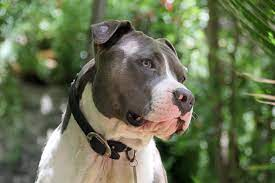

Found: 80 image links, done!
persist
https://us.123rf.com/450wm/albertoclemares/albertoclemares1911/albertoclemares191100030/133228141-amerikanischer-bullenhund.jpg?ver=6
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_0.jpg'>
SUCCESS - saved https://us.123rf.com/450wm/albertoclemares/albertoclemares1911/albertoclemares191100030/133228141-amerikanischer-bullenhund.jpg?ver=6 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://media.gettyimages.com/photos/high-angle-view-of-pitbull-sitting-on-floor-at-home-picture-id1291640844?s=612x612


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'us.123rf.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_1.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/high-angle-view-of-pitbull-sitting-on-floor-at-home-picture-id1291640844?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTyaGSzfB8wOFbG3vlmJW5nYqwiK7gFUNGdg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_2.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTyaGSzfB8wOFbG3vlmJW5nYqwiK7gFUNGdg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT41O5g791KXUqnpItb2mXk3i39s-vhznuK1Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied dat

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT41O5g791KXUqnpItb2mXk3i39s-vhznuK1Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5_cj8qaqlgxfuL6s1PBG4QifXb9R00xG9yQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_4.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5_cj8qaqlgxfuL6s1PBG4QifXb9R00xG9yQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://images.unsplash.com/photo-1587790311640-50b019663f01?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8ZG9nJTIwcGl0YnVsbHxlbnwwfHwwfHw%3D&w=1000&q=80


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.unsplash.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_5.jpg'>
SUCCESS - saved https://images.unsplash.com/photo-1587790311640-50b019663f01?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8ZG9nJTIwcGl0YnVsbHxlbnwwfHwwfHw%3D&w=1000&q=80 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://mediaproxy.salon.com/width/1200/https://media.salon.com/2013/02/shutterstock_62858089.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_6.jpg'>
SUCCESS - saved https://mediaproxy.salon.com/width/1200/https://media.salon.com/2013/02/shutterstock_62858089.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLzNlE_fOgHE7HpRE42XFmNkPhqTV9VgwXKg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mediaproxy.salon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_7.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLzNlE_fOgHE7HpRE42XFmNkPhqTV9VgwXKg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://www.thesprucepets.com/thmb/-ZHR_fLGpKN6LeWExVDhF2g75Kc=/2472x1854/smart/filters:no_upscale()/pitbull-dog-breeds-4843994-hero-db6922b6c8294b45b19c07aff5865790.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_8.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/-ZHR_fLGpKN6LeWExVDhF2g75Kc=/2472x1854/smart/filters:no_upscale()/pitbull-dog-breeds-4843994-hero-db6922b6c8294b45b19c07aff5865790.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlqybX1vouA-Vn8CSVP4DAbrEB0Ucb1ouNEQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_9.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlqybX1vouA-Vn8CSVP4DAbrEB0Ucb1ouNEQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTyypaQnUai-o--JqFrF0qnBrq73JFUQnWkNA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_10.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTyypaQnUai-o--JqFrF0qnBrq73JFUQnWkNA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQA2SiISsCr533v0MU5KAkT6SwneaP7VedMtQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_11.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQA2SiISsCr533v0MU5KAkT6SwneaP7VedMtQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://i.pinimg.com/originals/74/3f/1c/743f1c688f78bd420865b4dff5be27d8.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_12.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/74/3f/1c/743f1c688f78bd420865b4dff5be27d8.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://www.hepper.com/wp-content/uploads/2021/11/black-pitbull-with-chain-collar.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hepper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_13.jpg'>
SUCCESS - saved https://www.hepper.com/wp-content/uploads/2021/11/black-pitbull-with-chain-collar.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://www.petmd.com/sites/default/files/2020-11/picture-of-american-pitt-bull-terrier.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.petmd.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_14.jpg'>
fail
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8hjF504ZA7cUfc2-xHl64IZqki9DZfclv9A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_15.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8hjF504ZA7cUfc2-xHl64IZqki9DZfclv9A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtdq6UbEXF1J2sCDi3H5IUCWYPL1wyyEk8QQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_16.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtdq6UbEXF1J2sCDi3H5IUCWYPL1wyyEk8QQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://www.thesprucepets.com/thmb/hTqXseABXLKnlZ-WyFU7A0f5gGg=/1988x1509/filters:no_upscale():max_bytes(150000):strip_icc()/AmericanBullysobakabarobaka-4ce0d4dc0e144dccadb5159b222e275e.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_17.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/hTqXseABXLKnlZ-WyFU7A0f5gGg=/1988x1509/filters:no_upscale():max_bytes(150000):strip_icc()/AmericanBullysobakabarobaka-4ce0d4dc0e144dccadb5159b222e275e.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://octanecdn.com/forevervetscom/What_are_the_different_types_of_pit_bulls.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'octanecdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_18.jpg'>
SUCCESS - saved https://octanecdn.com/forevervetscom/What_are_the_different_types_of_pit_bulls.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5__egS2Zr-859tSHGYmR0wsDr2hg37y6FTQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_19.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5__egS2Zr-859tSHGYmR0wsDr2hg37y6FTQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://busytape.com/wp-content/uploads/2021/11/Photo-of-huge-pitbull-dog-that-had-to-be-shot.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'busytape.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_20.jpg'>
SUCCESS - saved https://busytape.com/wp-content/uploads/2021/11/Photo-of-huge-pitbull-dog-that-had-to-be-shot.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://media.istockphoto.com/photos/big-dog-picture-id513392620
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_21.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/big-dog-picture-id513392620 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://image.shutterstock.com/image-photo/portrait-white-dog-puppy-american-260nw-1693117600.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_22.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/portrait-white-dog-puppy-american-260nw-1693117600.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://i.ytimg.com/vi/N2eTC2S2NKI/maxresdefault.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_23.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/N2eTC2S2NKI/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZcpNKZ5dWdYytxN4ELQnWk80I9uU8_joENg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_24.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZcpNKZ5dWdYytxN4ELQnWk80I9uU8_joENg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/147453034-pit-bull-myths-reality-632x475.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17fnq9dkz9hgj.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_25.jpg'>
SUCCESS - saved https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/147453034-pit-bull-myths-reality-632x475.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://image.winudf.com/v2/image/Y29tLkZ1bkdhbWVzMTAuUGl0MTYxX3NjcmVlbnNob3RzXzBfNDk3NjgzMmI/screen-0.jpg?fakeurl=1&type=.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_26.jpg'>
SUCCESS - saved https://image.winudf.com/v2/image/Y29tLkZ1bkdhbWVzMTAuUGl0MTYxX3NjcmVlbnNob3RzXzBfNDk3NjgzMmI/screen-0.jpg?fakeurl=1&type=.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://media.istockphoto.com/photos/american-pitbull-dog-isolate-picture-id1144689450


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.winudf.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_27.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/american-pitbull-dog-isolate-picture-id1144689450 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_Kdd0iF-Vc6jW1V9jLNWiOLdIjy_c9vUwGQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_Kdd0iF-Vc6jW1V9jLNWiOLdIjy_c9vUwGQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTf-wQ_sLloJk8RW_I1q_25Ca85xUirnkOHEQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_30.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZVD-vQcFkS4zWEGYUQXHhY5kcDI0-nXx7hA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTy0HGqP993GCJXESjfjaOqKzxpNDKObG4_Fw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_31.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTy0HGqP993GCJXESjfjaOqKzxpNDKObG4_Fw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrn7Fwaz2jye5Ysa5soxrD494Kr46Iade-bw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads proj

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_33.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/pit-bull-dog-260nw-139055582.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://upload.wikimedia.org/wikipedia/commons/c/c0/Pit_bull_sampler.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_34.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/c/c0/Pit_bull_sampler.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCvDdlYPRiAUNj-hjtha1jpGUIaTeZRS729w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_35.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCvDdlYPRiAUNj-hjtha1jpGUIaTeZRS729w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://image.shutterstock.com/image-photo/portrait-one-gray-pitbull-dog-260nw-2002803857.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_36.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/portrait-one-gray-pitbull-dog-260nw-2002803857.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFw_JsCIMVPTLsofGEu1H-iqniqM6mUjklDQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_37.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFw_JsCIMVPTLsofGEu1H-iqniqM6mUjklDQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSx1VcnWB-4DLFMGlcl6V2ECB_BCCZuTUSOAQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\p
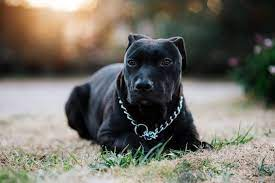

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_40.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3GeKmxCoD9IEPm_xCkIk10Hk6pj4xn-0T1w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-Udwudzgh7N_XJBVqu3q7EhJFw5rSP2XT1Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_41.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-Udwudzgh7N_XJBVqu3q7EhJFw5rSP2XT1Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://www.pitbullinfo.org/uploads/7/8/9/7/7897520/pitbull-dog-facts-1_orig.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pitbullinfo.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_42.jpg'>
SUCCESS - saved https://www.pitbullinfo.org/uploads/7/8/9/7/7897520/pitbull-dog-facts-1_orig.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTv2fGl9zsSgvmeiTYubg729ZrNa2RgWKlKzg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_43.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTv2fGl9zsSgvmeiTYubg729ZrNa2RgWKlKzg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://cdn.xxl.thumbs.canstockphoto.at/pitbull-bild_csp6711181.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.xxl.thumbs.canstockphoto.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_44.jpg'>
SUCCESS - saved https://cdn.xxl.thumbs.canstockphoto.at/pitbull-bild_csp6711181.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfmizRi2jaJgOkzg_S_oOQLaroCiSws3iiyA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_45.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfmizRi2jaJgOkzg_S_oOQLaroCiSws3iiyA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTunA6p36Q7DvQFuWk71MTO9I9WFc6EBnUEg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_46.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTunA6p36Q7DvQFuWk71MTO9I9WFc6EBnUEg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://c8.alamy.com/compde/apm2yn/pitbull-hund-portrait-apm2yn.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_47.jpg'>
SUCCESS - saved https://c8.alamy.com/compde/apm2yn/pitbull-hund-portrait-apm2yn.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://media.gettyimages.com/photos/pitbull-dog-looking-at-camera-picture-id143380960?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_48.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/pitbull-dog-looking-at-camera-picture-id143380960?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://i.pinimg.com/originals/5f/a0/f6/5fa0f65d7ac789a54200083c8bf1645e.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_49.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/5f/a0/f6/5fa0f65d7ac789a54200083c8bf1645e.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
http://cdn.shopify.com/s/files/1/0284/2391/3547/articles/American-Pitbull-Puppies-6.JPG_c4357295-9ee4-45f8-9718-e36c98022c46_1200x1200.jpg?v=1603063314


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.shopify.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_50.jpg'>
SUCCESS - saved http://cdn.shopify.com/s/files/1/0284/2391/3547/articles/American-Pitbull-Puppies-6.JPG_c4357295-9ee4-45f8-9718-e36c98022c46_1200x1200.jpg?v=1603063314 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://t4.ftcdn.net/jpg/03/07/42/13/360_F_307421355_EVAvOobVaJwCqiYXFuSbcNsHVYl6HlqM.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 't4.ftcdn.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_51.jpg'>
SUCCESS - saved https://t4.ftcdn.net/jpg/03/07/42/13/360_F_307421355_EVAvOobVaJwCqiYXFuSbcNsHVYl6HlqM.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjx3HR_GB_XyXXPEcfOGvt685vy9Hss1OCwQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_52.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjx3HR_GB_XyXXPEcfOGvt685vy9Hss1OCwQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbZWpl17Iq7ORj-SeZnr_1hb5PgZKFSWeAzQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbu

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_54.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRp_m8i3PFcTDJ5SGGxgfxojPwmDbH90DxpAA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUWvqpgyOl0muWhBQelCzXAYYXc6TweWWe1Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_55.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUWvqpgyOl0muWhBQelCzXAYYXc6TweWWe1Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTylweC_f1avx5Q9KfSJTyBey7sLchUnF_FLg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads proj

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_57.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/pitbull-dog-isolated-white-background-147251591.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://i.ytimg.com/vi/_KRIhOnGEDk/maxresdefault.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_58.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/_KRIhOnGEDk/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://media.istockphoto.com/photos/angry-dog-picture-id463071255?k=20&m=463071255&s=612x612&w=0&h=X-BjZzIEx7N0tXDANwMMOOyjKqsWvICEfuI7v60oMjA=


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_59.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/angry-dog-picture-id463071255?k=20&m=463071255&s=612x612&w=0&h=X-BjZzIEx7N0tXDANwMMOOyjKqsWvICEfuI7v60oMjA= - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://www.zooplus.ch/magazin/wp-content/uploads/2017/07/zwei-american-pit-bull-terrier-meer-1024x682.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_60.jpg'>
SUCCESS - saved https://www.zooplus.ch/magazin/wp-content/uploads/2017/07/zwei-american-pit-bull-terrier-meer-1024x682.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://st.depositphotos.com/1669155/2927/i/950/depositphotos_29272445-stock-photo-face-of-pitbull-dog.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.zooplus.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'st.depositphotos.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_61.jpg'>
SUCCESS - saved https://st.depositphotos.com/1669155/2927/i/950/depositphotos_29272445-stock-photo-face-of-pitbull-dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdgzXzNRWWgBDWn_i2jYm7PqX5TKWhF4pGIQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_62.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdgzXzNRWWgBDWn_i2jYm7PqX5TKWhF4pGIQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://i.ytimg.com/vi/FLWcchzs2fE/maxresdefault.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_63.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/FLWcchzs2fE/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://dogexpress.in/wp-content/uploads/2020/11/imgpsh_fullsize_anim-7.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogexpress.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_64.jpg'>
SUCCESS - saved https://dogexpress.in/wp-content/uploads/2020/11/imgpsh_fullsize_anim-7.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://thumbs.dreamstime.com/b/pitbull-dog-isolated-white-background-130542224.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_65.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/b/pitbull-dog-isolated-white-background-130542224.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3dhGANZAlmndohHy4LME7B-HUsBR4-8lGxw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_66.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3dhGANZAlmndohHy4LME7B-HUsBR4-8lGxw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://i2-prod.mirror.co.uk/incoming/article25423441.ece/ALTERNATES/n310p/0_WNS_101121_Dog_Killed_Boy_002JPEG.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_67.jpg'>
SUCCESS - saved https://i2-prod.mirror.co.uk/incoming/article25423441.ece/ALTERNATES/n310p/0_WNS_101121_Dog_Killed_Boy_002JPEG.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://www.u-buy.ch/productimg/?image=aHR0cHM6Ly9tLm1lZGlhLWFtYXpvbi5jb20vaW1hZ2VzL0kvODE4Q0RIR2hjUUwuX0FDX1NMMTUwMF8uanBn.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i2-prod.mirror.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.u-buy.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [403]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_68.jpg'>
SUCCESS - saved https://www.u-buy.ch/productimg/?image=aHR0cHM6Ly9tLm1lZGlhLWFtYXpvbi5jb20vaW1hZ2VzL0kvODE4Q0RIR2hjUUwuX0FDX1NMMTUwMF8uanBn.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMr4IlJmDNeQV8ALe_vYCyG1V6i6TM7_XRhQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_69.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMr4IlJmDNeQV8ALe_vYCyG1V6i6TM7_XRhQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4F92T4MvWfOBXpGdDL4Fj7Zy_qaM8yctchA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/A

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'play-lh.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_71.jpg'>
SUCCESS - saved https://play-lh.googleusercontent.com/hXDkSR2ncf9RVvYEuTe2mTfG_txLCNI7w5VKvKZpAC3hWPV978xo7VPEuXrvwsgpqrk - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Ginger_December_3579836414e4b5ce786eoPitBull.jpg/800px-Ginger_December_3579836414e4b5ce786eoPitBull.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_72.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Ginger_December_3579836414e4b5ce786eoPitBull.jpg/800px-Ginger_December_3579836414e4b5ce786eoPitBull.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTG9C9N7-1RL_QzvzLdhdolMAcOcNgI6w5FtA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_73.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTG9C9N7-1RL_QzvzLdhdolMAcOcNgI6w5FtA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhujDt-pSduLiRASkkP6T8H0kJ6ZF0vLYglg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_74.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhujDt-pSduLiRASkkP6T8H0kJ6ZF0vLYglg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://i.pinimg.com/736x/5f/22/1f/5f221f548651dff0f08d5688864b3984--animal-anatomy-pitbull-terriers.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imagesvc.meredithcorp.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_75.jpg'>
SUCCESS - saved https://i.pinimg.com/736x/5f/22/1f/5f221f548651dff0f08d5688864b3984--animal-anatomy-pitbull-terriers.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F03%2F26%2Fbrindle-pit-bull-1263480093-2000.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_76.jpg'>
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F03%2F26%2Fbrindle-pit-bull-1263480093-2000.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://media-cldnry.s-nbcnews.com/image/upload/newscms/2017_

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media-cldnry.s-nbcnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_77.jpg'>
SUCCESS - saved https://media-cldnry.s-nbcnews.com/image/upload/newscms/2017_43/1291859/pit-bull-today-171027-06.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://static01.nyt.com/images/2020/02/11/multimedia/11xp-pitbull/11xp-pitbull-mobileMasterAt3x.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'static01.nyt.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_78.jpg'>
SUCCESS - saved https://static01.nyt.com/images/2020/02/11/multimedia/11xp-pitbull/11xp-pitbull-mobileMasterAt3x.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQ6LfHL58tU5jmY5G8Mnk8RTlDDzOUSijeJQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\pitbull\\jpg_79.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQ6LfHL58tU5jmY5G8Mnk8RTlDDzOUSijeJQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\pitbull


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
persist
https://www.akc.org/wp-content/uploads/2017/11/Shiba-Inu-standing-in-profile-outdoors.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.akc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_0.jpg'>
SUCCESS - saved https://www.akc.org/wp-content/uploads/2017/11/Shiba-Inu-standing-in-profile-outdoors.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://www3.nhk.or.jp/nhkworld/en/special/episode/202201080910/images/220108_shibainu02.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www3.nhk.or.jp'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_1.jpg'>
SUCCESS - saved https://www3.nhk.or.jp/nhkworld/en/special/episode/202201080910/images/220108_shibainu02.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Taro_%28black_and_tan%2C_reu%29_-_Chiko_%28rood%2C_reu%29_-_Ichigo_%28rood%2C_teef%29.jpg/800px-Taro_%28black_and_tan%2C_reu%29_-_Chiko_%28rood%2C_reu%29_-_Ichigo_%28rood%2C_teef%29.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_2.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Taro_%28black_and_tan%2C_reu%29_-_Chiko_%28rood%2C_reu%29_-_Ichigo_%28rood%2C_teef%29.jpg/800px-Taro_%28black_and_tan%2C_reu%29_-_Chiko_%28rood%2C_reu%29_-_Ichigo_%28rood%2C_teef%29.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://www.hepper.com/wp-content/uploads/2021/11/dog-3724261_1280.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hepper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_3.jpg'>
SUCCESS - saved https://www.hepper.com/wp-content/uploads/2021/11/dog-3724261_1280.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4zIeX8xch2OtBR8HwCSZ_fqfhLP58W_cu7Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_4.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4zIeX8xch2OtBR8HwCSZ_fqfhLP58W_cu7Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://www.rover.com/blog/wp-content/uploads/2019/11/shiba-dreamstime-960x540.jpg
<Response [403]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_5.jpg'>
SUCCESS - saved https://www.rove

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.rover.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.petplan.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_6.jpg'>
SUCCESS - saved https://www.petplan.co.uk/images/breed-info/shiba-inu/vital-stats_shiba-inu.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://www.thekennelclub.org.uk/media/1704/japanese-shiba-inu-headshot.jpg?mode=pad&width=1000&rnd=132143856110000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thekennelclub.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kc-media-cdn-live.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17fnq9dkz9hgj.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_7.jpg'>
SUCCESS - saved https://www.thekennelclub.org.uk/media/1704/japanese-shiba-inu-headshot.jpg?mode=pad&width=1000&rnd=132143856110000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/shiba-inu-detail.jpg?bust=1535566568&width=355
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_8.jpg'>
SUCCESS - saved https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/shiba-inu-detail.jpg?bust=1535566568&width=355 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1AlkaU_ebIDhD0qo7x7tlwN-O5yflRY7dPg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_9.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1AlkaU_ebIDhD0qo7x7tlwN-O5yflRY7dPg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://media.gettyimages.com/photos/smiling-shiba-inu-picture-id528718431?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_10.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/smiling-shiba-inu-picture-id528718431?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://cdn-japantimes.com/wp-content/uploads/2022/01/np_file_134471-870x489.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn-japantimes.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_11.jpg'>
SUCCESS - saved https://cdn-japantimes.com/wp-content/uploads/2022/01/np_file_134471-870x489.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://thumbs.dreamstime.com/z/closeup-young-purebred-japanese-shiba-inu-dog-shiba-inu-dogs-looking-great-interest-closeup-young-purebred-171455833.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_12.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/closeup-young-purebred-japanese-shiba-inu-dog-shiba-inu-dogs-looking-great-interest-closeup-young-purebred-171455833.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4QDO2b6rCtpI1a1niuodsSvT9KLBr7SnDZg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_13.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4QDO2b6rCtpI1a1niuodsSvT9KLBr7SnDZg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMIHr_JKuseur-GeL6f_VzKACefcYxitJEWQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDr

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_15.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrKJhD0C0OrK86Wd3BKNJoDlKEeCekBT_7zA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://img.myloview.de/poster/beautiful-portrait-of-a-shiba-dog-in-the-autumn-grass-the-photo-is-of-good-quality-700-202294243.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.myloview.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_16.jpg'>
SUCCESS - saved https://img.myloview.de/poster/beautiful-portrait-of-a-shiba-dog-in-the-autumn-grass-the-photo-is-of-good-quality-700-202294243.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFJ-aL6ly7673MxEXdzBSA5DEL_rTN4tI_Fw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_17.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFJ-aL6ly7673MxEXdzBSA5DEL_rTN4tI_Fw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzfMWTDzVkCQeUlqPuU03kYrgFz7g6OE-FVw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_18.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzfMWTDzVkCQeUlqPuU03kYrgFz7g6OE-FVw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://i.ytimg.com/vi/O2pKZ8uOZJk/hqdefault.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_19.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/O2pKZ8uOZJk/hqdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHDaMm3hUwK0D15ATv_VZ5-u49U7-aUNK1Sw&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_20.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHDaMm3hUwK0D15ATv_VZ5-u49U7-aUNK1Sw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPkHOna4zW2K23bNPi9Gv77mrCujndF1fRHg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_21.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPkHOna4zW2K23bNPi9Gv77mrCujndF1fRHg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZC5AIHDv-Pwjx_4Wm7ZjDJ5RN07tLzSfMQQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_22.jpg'>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.scotsman.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_23.jpg'>
SUCCESS - saved https://www.scotsman.com/webimg/b25lY21zOmNiZDU5Yzk4LTdhYWMtNGY3Ny05NmI3LWYyYzM0OGUzY2QwNDo3YTU2OWMzYS1jMDkxLTQzODItOTAzNS0wNTFlZDBkOTBlMjU=.jpg?width=640&enable=upscale - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://blockchainwelt.de/wp-content/uploads/2022/05/happy-calm-shiba-inu-dog-in-sunlight-2021-08-31-11-54-09-utc-1-1.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_24.jpg'>
SUCCESS - saved https://blockchainwelt.de/wp-content/uploads/2022/05/happy-calm-shiba-inu-dog-in-sunlight-2021-08-31-11-54-09-utc-1-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://images.fnlondon.com/im-413154/?width=1280&height=853


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'blockchainwelt.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.fnlondon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_25.jpg'>
SUCCESS - saved https://images.fnlondon.com/im-413154/?width=1280&height=853 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQs4Nu3hAHrxmPXLScxKQA0lQSl3M9eswPcg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_26.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQs4Nu3hAHrxmPXLScxKQA0lQSl3M9eswPcg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://worlddogfinder.com/imager/1200x630/upload/shiba_inu_dog_breed.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'worlddogfinder.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_27.jpg'>
SUCCESS - saved https://worlddogfinder.com/imager/1200x630/upload/shiba_inu_dog_breed.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXG7urcF2vR9B5_ttbqXG8B6OqrBSGM-OcQg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXG7urcF2vR9B5_ttbqXG8B6OqrBSGM-OcQg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://static.wixstatic.com/media/3beafa_daea8358a534431eb9712f40b689cede~mv2.jpg/v1/fill/w_1126,h_836,al_c/3beafa_daea8358a534431eb9712f40b689cede~mv2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'static.wixstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_29.jpg'>
SUCCESS - saved https://static.wixstatic.com/media/3beafa_daea8358a534431eb9712f40b689cede~mv2.jpg/v1/fill/w_1126,h_836,al_c/3beafa_daea8358a534431eb9712f40b689cede~mv2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://www.nbcsports.com/sites/nbcsports.com/files/2021/11/23/nbc_dog_nonsporting_shibainu_211122.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.nbcsports.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_30.jpg'>
SUCCESS - saved https://www.nbcsports.com/sites/nbcsports.com/files/2021/11/23/nbc_dog_nonsporting_shibainu_211122.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://media.istockphoto.com/photos/mameshibainu-picture-id1214044812?k=20&m=1214044812&s=612x612&w=0&h=iiV83PaKKsatuh-oPtGVa_rnT8aA26wKnsnN05P0wmo=
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_31.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/mameshibainu-picture-id1214044812?k=20&m=1214044812&s=612x612&w=0&h=iiV83PaKKsatuh-oPtGVa_rnT8aA26wKnsnN05P0wmo= - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://media.gettyimages.com/photos/portrait-of-dog-against-blue-background-picture-id1280591647?s=612x612


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_32.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/portrait-of-dog-against-blue-background-picture-id1280591647?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCyi8m7EM5rCAHTNmR7pRzgtJrNvCfXy4vSA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_33.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCyi8m7EM5rCAHTNmR7pRzgtJrNvCfXy4vSA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNxsW7TVtJbIuCvXfpS1g9ttXpJs6GwkMmtA&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_34.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNxsW7TVtJbIuCvXfpS1g9ttXpJs6GwkMmtA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://media.gettyimages.com/photos/close-up-view-of-a-girl-lying-on-her-bed-watching-a-movie-next-to-her-picture-id1325626157?s=170667a
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_35.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/close-up-view-of-a-girl-lying-on-her-bed-watching-a-movie-next-to-her-picture-id1325626157?s=170667a - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://i.pinimg.com/736x/c0/6f/e8/c06fe8cd3ed04d18db655c6716c139f4--dog-day-shiba-inu.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_36.jpg'>
SUCCESS - saved https://i.pinimg.com/736x/c0/6f/e8/c06fe8cd3ed04d18db655c6716c139f4--dog-day-shiba-inu.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiY3EV8naiP5ATi8DLFubih7XUO7MdZWBqiA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_37.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiY3EV8naiP5ATi8DLFubih7XUO7MdZWBqiA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://images.news18.com/ibnlive/uploads/2021/06/1623900306_untitled-design-2021-06-17t085747.057.png?im=FitAndFill,width=1200,height=1200


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.news18.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_38.jpg'>
SUCCESS - saved https://images.news18.com/ibnlive/uploads/2021/06/1623900306_untitled-design-2021-06-17t085747.057.png?im=FitAndFill,width=1200,height=1200 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdXi3uUCogQGkTJk_uCpr1nwS7iMyIHIDDUg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_39.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdXi3uUCogQGkTJk_uCpr1nwS7iMyIHIDDUg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsOsBsZ4tEakpY4i2UkGoYwbO1QRq_mrnu1A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_41.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/Y_SGTTXfuro/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/shiba-inu-card-small.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_42.jpg'>
SUCCESS - saved https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/shiba-inu-card-small.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsLeXWa38HCTgz6uo4ShK-0JVNz5mjCZfhcA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17fnq9dkz9hgj.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_43.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsLeXWa38HCTgz6uo4ShK-0JVNz5mjCZfhcA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://rimage.gnst.jp/livejapan.com/public/article/detail/a/00/01/a0001799/img/basic/a0001799_main.jpg?20200605180827&q=80&rw=750&rh=536
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_44.jpg'>
SUCCESS - saved https://rimage.gnst.jp/livejapan.com/public/article/detail/a/00/01/a0001799/img/basic/a0001799_main.jpg?20200605180827&q=80&rw=750&rh=536 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Taka_Shiba.jpg/800px-Taka_Shiba.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rimage.gnst.jp'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_45.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Taka_Shiba.jpg/800px-Taka_Shiba.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLFazbBbgfNSU9hzcm2dExTkpf4Ghc5PtdQg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_46.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLFazbBbgfNSU9hzcm2dExTkpf4Ghc5PtdQg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://vetstreet.brightspotcdn.com/dims4/default/0f42b23/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F05%2Fae6220a81c11e0a0d50050568d634f%2Ffile%2FShiba-In

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_47.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/0f42b23/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F05%2Fae6220a81c11e0a0d50050568d634f%2Ffile%2FShiba-Inu-5-645mk070111.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZWpFAMkXJH9TasgikBywPU9t2diBcQJJA9Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_48.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZWpFAMkXJH9TasgikBywPU9t2diBcQJJA9Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://img.myloview.de/sticker/beautiful-portrait-of-a-shiba-dog-in-the-autumn-grass-the-p

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'img.myloview.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_49.jpg'>
SUCCESS - saved https://img.myloview.de/sticker/beautiful-portrait-of-a-shiba-dog-in-the-autumn-grass-the-photo-is-of-good-quality-700-202294248.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://exlibris.azureedge.net/covers/9783/7526/7438/5/9783752674385xxl.webp
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_50.jpg'>
SUCCESS - saved https://exlibris.azureedge.net/covers/9783/7526/7438/5/9783752674385xxl.webp - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://www.thesprucepets.com/thmb/EoReiTX-oZnGTFzHWEJKd7UfWdw=/1885x1414/smart/filters:no_upscale()/EricVanderVeken500pxGettyImages-1068094978-9df2fa51da8749488b7d0b653fec8030.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'exlibris.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_51.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/EoReiTX-oZnGTFzHWEJKd7UfWdw=/1885x1414/smart/filters:no_upscale()/EricVanderVeken500pxGettyImages-1068094978-9df2fa51da8749488b7d0b653fec8030.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://blog.healthypawspetinsurance.com/wp-content/uploads/2021/12/tan-shiba-inu-dog-inside.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'blog.healthypawspetinsurance.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_52.jpg'>
SUCCESS - saved https://blog.healthypawspetinsurance.com/wp-content/uploads/2021/12/tan-shiba-inu-dog-inside.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://i.pinimg.com/474x/79/77/b4/7977b4fe3feb893fa91db64274a2bf5e.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_53.jpg'>
SUCCESS - saved https://i.pinimg.com/474x/79/77/b4/7977b4fe3feb893fa91db64274a2bf5e.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQW5kyDp97IypFLo6WBbyiIJfk0qQDqRs3R_g&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_54.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQW5kyDp97IypFLo6WBbyiIJfk0qQDqRs3R_g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxjC0oV9mHLug4xexQmHaF2djWXEZAIcUXjg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_55.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxjC0oV9mHLug4xexQmHaF2djWXEZAIcUXjg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://t4.ftcdn.net/jpg/01/15/84/23/360_F_115842322_ENQDHHX3n4Xs2ISMDggXJHkIUcMIKMoO.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 't4.ftcdn.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_56.jpg'>
SUCCESS - saved https://t4.ftcdn.net/jpg/01/15/84/23/360_F_115842322_ENQDHHX3n4Xs2ISMDggXJHkIUcMIKMoO.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvSUBPWTiWmsnFArqznd7i6bkFmZkWgFnOsg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_57.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvSUBPWTiWmsnFArqznd7i6bkFmZkWgFnOsg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://cdn.britannica.com/67/159867-050-89C3FAAE/Shiba-inu.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.britannica.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_58.jpg'>
SUCCESS - saved https://cdn.britannica.com/67/159867-050-89C3FAAE/Shiba-inu.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://a.storyblok.com/f/83829/1200x628/21d41d2bf6/shiba-inu-vivre-appartement.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'a.storyblok.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_59.jpg'>
SUCCESS - saved https://a.storyblok.com/f/83829/1200x628/21d41d2bf6/shiba-inu-vivre-appartement.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWeqY9u7aNjFzs85vVcHEylAjxRKBoEeXkKw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_60.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWeqY9u7aNjFzs85vVcHEylAjxRKBoEeXkKw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://www.thekennelclub.org.uk/media/3490/japanese-shiba-inu-standing.jpg?mode=pad&width=1000&rnd=132332335300000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thekennelclub.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kc-media-cdn-live.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289

<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_61.jpg'>
SUCCESS - saved https://www.thekennelclub.org.uk/media/3490/japanese-shiba-inu-standing.jpg?mode=pad&width=1000&rnd=132332335300000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT62bzUdm_j27Tq71W9sO0oCc2Z_yPX6yC7ZA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_62.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT62bzUdm_j27Tq71W9sO0oCc2Z_yPX6yC7ZA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://www.purina.de/sites/default/files/2021-02/BREED%20Hero_0075_japanese_shiba_inu.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thehappypuppysite.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_63.jpg'>
SUCCESS - saved https://www.purina.de/sites/default/files/2021-02/BREED%20Hero_0075_japanese_shiba_inu.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://thehappypuppysite.com/wp-content/uploads/2018/06/Shiba-Inu-Wonderful-Watchdog-or-Family-Pet_-HP-long.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_64.jpg'>
SUCCESS - saved https://thehappypuppysite.com/wp-content/uploads/2018/06/Shiba-Inu-Wonderful-Watchdog-or-Family-Pet_-HP-long.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKlYiS14EAIzHRe8kean1-nyiVzXrxbrlnyg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ebayimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_65.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKlYiS14EAIzHRe8kean1-nyiVzXrxbrlnyg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://i.ebayimg.com/images/g/nSgAAOxyLm9TEhs2/s-l400.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_66.jpg'>
SUCCESS - saved https://i.ebayimg.com/images/g/nSgAAOxyLm9TEhs2/s-l400.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://assets.thalia.media/img/artikel/8e55f1e2c2cfc690ad394ad06004710c616f344d-00-00.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'assets.thalia.media'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [403]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_67.jpg'>
SUCCESS - saved https://assets.thalia.media/img/artikel/8e55f1e2c2cfc690ad394ad06004710c616f344d-00-00.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP67Z_iis-4GGJahw3PmKZpnXU6yWw-BUBYA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_68.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP67Z_iis-4GGJahw3PmKZpnXU6yWw-BUBYA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5fbm1xBbmNfIpXuFuPGbWkp-HL9-8VWLA7w&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_69.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5fbm1xBbmNfIpXuFuPGbWkp-HL9-8VWLA7w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBnvjgWQBNbfqBzFsbhkO47Lm33YLzB9zi8w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_70.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBnvjgWQBNbfqBzFsbhkO47Lm33YLzB9zi8w&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRejKT6R9Af6G6HIX6IKtGpnjTq3w7FE8U7pg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_71.jpg'>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_72.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Foto_Shiba_Inu_.jpg/1200px-Foto_Shiba_Inu_.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSZUfEqcGlFg6z3OUDb-rGUIO1eAyYrEW3_Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_73.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSZUfEqcGlFg6z3OUDb-rGUIO1eAyYrEW3_Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://i.ytimg.com/vi/3hz-kxAyqTY/maxresdefault.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_74.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/3hz-kxAyqTY/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3XiQW__qCu3J1HsR0QupIaerXSeiNTG2DBA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_75.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3XiQW__qCu3J1HsR0QupIaerXSeiNTG2DBA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzd392gJ-UD89-Pl8eu8fLI7_dQwotU-nc_Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_76.jpg'>
SUCCESS - saved https://encryp

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.news18.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_77.jpg'>
SUCCESS - saved https://images.news18.com/ibnlive/uploads/2021/10/floki.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba
persist
https://media-be.chewy.com/wp-content/uploads/2021/05/27135654/Shiba-Inu_FeaturedImage.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media-be.chewy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_78.jpg'>
fail
persist
https://media.istockphoto.com/photos/happy-shiba-inu-dog-on-yellow-redhaired-japanese-dog-smile-portrait-picture-id1197121742
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\shiba\\jpg_79.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/happy-shiba-inu-dog-on-yellow-redhaired-japanese-dog-smile-portrait-picture-id1197121742 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\shiba


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
persist
https://ckcusa.com/media/147465/belgian-sheepdog-tervuren.jpg?preset=ckcBreedImage375


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ckcusa.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_0.jpg'>
SUCCESS - saved https://ckcusa.com/media/147465/belgian-sheepdog-tervuren.jpg?preset=ckcBreedImage375 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/collie-card-medium.jpg?bust=1535568924


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17fnq9dkz9hgj.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_1.jpg'>
SUCCESS - saved https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/collie-card-medium.jpg?bust=1535568924 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://thumbs.dreamstime.com/z/belgian-shepherd-tervuren-dog-standing-path-grassland-55823557.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_2.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/belgian-shepherd-tervuren-dog-standing-path-grassland-55823557.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://i.pinimg.com/originals/ed/4e/b7/ed4eb7887f67847d3a0cd3df0f2408d9.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_3.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/ed/4e/b7/ed4eb7887f67847d3a0cd3df0f2408d9.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
http://cdn.akc.org/content/hero/belgian_tervuren_hero.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_4.jpg'>
SUCCESS - saved http://cdn.akc.org/content/hero/belgian_tervuren_hero.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2xfiZuupU5dRswNuxFe0TxC-xcisjwXcjKw&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_5.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2xfiZuupU5dRswNuxFe0TxC-xcisjwXcjKw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://i.pinimg.com/736x/05/a3/24/05a32484ecfb005a6a3035a6385400b2.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_6.jpg'>
SUCCESS - saved https://i.pinimg.com/736x/05/a3/24/05a32484ecfb005a6a3035a6385400b2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS49CZGTnVxdvkHwTsCePbDURATMh1FSLGsrA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_7.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS49CZGTnVxdvkHwTsCePbDURATMh1FSLGsrA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvvSjrRpAD61d6EeI1nHeyMnow423Vcq5o8g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_8.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvvSjrRpAD61d6EeI1nHeyMnow423Vcq5o8g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgfQToaEFz83aLTjIqrmGpLtymP77t82Uahg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads pr

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_12.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/b58e0a0/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F33%2F520ce0a67311e087a80050568d634f%2Ffile%2FBelgian-Tervuren-3-645mk062311.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRD6acppIrE2vPvadx8aV7a5u8Ve079mQRd7Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_13.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRD6acppIrE2vPvadx8aV7a5u8Ve079mQRd7Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://diamondpaintkit.com/wp-content/uploads/2022/01/

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'diamondpaintkit.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_14.jpg'>
SUCCESS - saved https://diamondpaintkit.com/wp-content/uploads/2022/01/Belgian-Tervuren-Dog-paint-by-number.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTD5fbsx_bHp9E8c9s6cjAEGJRKl4rhHH8_Kg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_15.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTD5fbsx_bHp9E8c9s6cjAEGJRKl4rhHH8_Kg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://image.shutterstock.com/z/stock-photo-belgian-shepherd-tervuren-dog-sitting-isolated-on-white-background-328423268.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_16.jpg'>
SUCCESS - saved https://image.shutterstock.com/z/stock-photo-belgian-shepherd-tervuren-dog-sitting-isolated-on-white-background-328423268.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.loveyourdog.com/wp-content/uploads/2021/09/Belgian-Tervuren-standing-in-grass.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.loveyourdog.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_17.jpg'>
SUCCESS - saved https://www.loveyourdog.com/wp-content/uploads/2021/09/Belgian-Tervuren-standing-in-grass.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.omlet.de/images/cache/1024/680/Dog-Belgian_Shepherd_Dog_(Tervueren)-An_agile_Belgian_Shepherd_Dog_(Tervueren)_jumping_a_hurdle.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.omlet.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_18.jpg'>
SUCCESS - saved https://www.omlet.de/images/cache/1024/680/Dog-Belgian_Shepherd_Dog_(Tervueren)-An_agile_Belgian_Shepherd_Dog_(Tervueren)_jumping_a_hurdle.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.dogtime.com/assets/uploads/2011/01/file_23176_belgian-tervuren.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_19.jpg'>
SUCCESS - saved https://www.dogtime.com/assets/uploads/2011/01/file_23176_belgian-tervuren.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdBII2_0bUCWGAudrJI4ooGcdwGUQFlM7WAA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_20.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdBII2_0bUCWGAudrJI4ooGcdwGUQFlM7WAA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUQqV7kNjuXFGl2g7DKzLOclADHP5AIed_4w&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jp

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'researchbreeder.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_23.jpg'>
SUCCESS - saved https://researchbreeder.com/images/Breed%20Pictures/B/Belgian-Tervuren.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZTRabNILaEnyTMwTffc74-S6gFMeE1nBYnA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_24.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZTRabNILaEnyTMwTffc74-S6gFMeE1nBYnA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZ5q92T_5c8im788umJjvs0vd7stgFMoYlzA&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_25.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZ5q92T_5c8im788umJjvs0vd7stgFMoYlzA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4gfLPtCxV0oYIA4jPHInPx6KamXcuJDsVmA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_26.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4gfLPtCxV0oYIA4jPHInPx6KamXcuJDsVmA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6S8273rYIeVx7y9GdubGs2hp-S2MJ5XtGMg&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_27.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6S8273rYIeVx7y9GdubGs2hp-S2MJ5XtGMg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwEnlmtXh8z-3h5qni4E-IeJVBqM2gdkG_8A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_28.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwEnlmtXh8z-3h5qni4E-IeJVBqM2gdkG_8A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4luDmaLjkcqigp_1uX0YypLbgV-UKk2-jCA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads 

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_30.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/FrwTB3mjX487BeE9yKc3scI9LZw=/1885x1414/smart/filters:no_upscale()/GettyImages-1055662238-4cc79d64847d4eca9de1d20b8fe2bca1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://thumbs.dreamstime.com/z/belgian-shepherd-tervuren-puppy-25097751.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_31.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/belgian-shepherd-tervuren-puppy-25097751.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://vetstreet.brightspotcdn.com/dims4/default/54e411e/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F5c%2Fe5d190a67311e087a80050568d634f%2Ffile%2FBelgian-Tervuren-4-645mk062311.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_32.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/54e411e/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F5c%2Fe5d190a67311e087a80050568d634f%2Ffile%2FBelgian-Tervuren-4-645mk062311.jpg - as C:/Users/keza289/OneDrive - ZHAW

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_33.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSX_tbXqB_wTRPXpyQnjrTiUfTk2l_pnxMdVw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://i.pinimg.com/originals/6d/3c/65/6d3c653201db1fe780a7f4d57c5c7ba8.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_34.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/6d/3c/65/6d3c653201db1fe780a7f4d57c5c7ba8.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.k9web.com/wp-content/uploads/2021/04/close-up-belgian-tervuren.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.k9web.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_35.jpg'>
SUCCESS - saved https://www.k9web.com/wp-content/uploads/2021/04/close-up-belgian-tervuren.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.dogzone.com/images/breeds/tervuren-dog-800.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogzone.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_36.jpg'>
SUCCESS - saved https://www.dogzone.com/images/breeds/tervuren-dog-800.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.dogalize.com/wp-content/uploads/2017/02/Belgian-Tervuren-dog.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_37.jpg'>
SUCCESS - saved https://www.dogalize.com/wp-content/uploads/2017/02/Belgian-Tervuren-dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.thepetsandlove.com/questions-to-consider-before-getting-a-belgian-tervuren/questions-to-consider-before-getting-a-belgian-tervuren-1452x1041.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogalize.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thepetsandlove.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_38.jpg'>
SUCCESS - saved https://www.thepetsandlove.com/questions-to-consider-before-getting-a-belgian-tervuren/questions-to-consider-before-getting-a-belgian-tervuren-1452x1041.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQi9Srvi9FpLxdh-wtXeEQFgk-6Li6YLQtYkw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_39.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQi9Srvi9FpLxdh-wtXeEQFgk-6Li6YLQtYkw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://previews.agefotostock.com/previewimage/medibigoff/54600cdf4ae708f683eac1208e00120f/mev-10752934.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'previews.agefotostock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_40.jpg'>
SUCCESS - saved https://previews.agefotostock.com/previewimage/medibigoff/54600cdf4ae708f683eac1208e00120f/mev-10752934.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://i.pinimg.com/originals/dc/11/1b/dc111b1a61155efc5ec3128495fccf76.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_41.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/dc/11/1b/dc111b1a61155efc5ec3128495fccf76.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://i.ytimg.com/vi/PlCz3S5W_Oo/maxresdefault.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_42.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/PlCz3S5W_Oo/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://media.gettyimages.com/photos/the-autumnal-greenery-in-tervuren-picture-id564232263?s=612x612


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'tythedogguy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_43.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/the-autumnal-greenery-in-tervuren-picture-id564232263?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://tythedogguy.com/wp-content/uploads/2015/01/How-to-train-a-belgain-Belgian-Tervuren-scaled.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_44.jpg'>
SUCCESS - saved https://tythedogguy.com/wp-content/uploads/2015/01/How-to-train-a-belgain-Belgian-Tervuren-scaled.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhZ5okBDHsksz9xcudh9NMcLlggsVkJhITMg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_46.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwqoKTdvU5NZkKI5jXXow4w_hYsjNm1r3N8A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.mediastorehouse.com.au/p/172/dog-belgium-shepherd-tervuren-puppy-garden-1315403.jpg.webp


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mediastorehouse.com.au'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_47.jpg'>
SUCCESS - saved https://www.mediastorehouse.com.au/p/172/dog-belgium-shepherd-tervuren-puppy-garden-1315403.jpg.webp - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzjYVnQ7jRaaLENSWJfoDmcivz3iD55yWRUg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_48.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzjYVnQ7jRaaLENSWJfoDmcivz3iD55yWRUg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://c8.alamy.com/comp/KPNW2D/belgian-shepherd-tervuren-dog-standing-KPNW2D.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_49.jpg'>
SUCCESS - saved https://c8.alamy.com/comp/KPNW2D/belgian-shepherd-tervuren-dog-standing-KPNW2D.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.animalspedia.org/wp-content/uploads/2020/03/Belgian-Tervuren-Beautiful.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.animalspedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_50.jpg'>
SUCCESS - saved https://www.animalspedia.org/wp-content/uploads/2020/03/Belgian-Tervuren-Beautiful.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPixDdD9Y9Jceue4AexsR9IsewcgcCST0c8A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_51.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPixDdD9Y9Jceue4AexsR9IsewcgcCST0c8A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://vetstreet.brightspotcdn.com/dims4/default/28d0bec/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F71%2F67c1f0a67311e087a80050568d634f%2Ffile%2FBel

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_52.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/28d0bec/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F71%2F67c1f0a67311e087a80050568d634f%2Ffile%2FBelgian-Tervuren-5-645mk062311.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://c8.alamy.com/comp/KFX9MT/belgian-shepherd-dog-tervuren-KFX9MT.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_53.jpg'>
SUCCESS - saved https://c8.alamy.com/comp/KFX9MT/belgian-shepherd-dog-tervuren-KFX9MT.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F09%2F14%2Fbelgian-tervuren-in-snow-193044604-2000.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imagesvc.meredithcorp.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_54.jpg'>
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F09%2F14%2Fbelgian-tervuren-in-snow-193044604-2000.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEKciver1Dm9cM6xo0eHOKxhd_aXJ0_naf1g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_55.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEKciver1Dm9cM6xo0eHOKxhd_aXJ0_naf1g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.imago-images.de/bild/st/0133021450/w.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imago-images.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_56.jpg'>
SUCCESS - saved https://www.imago-images.de/bild/st/0133021450/w.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRe1jxiZF6ftVs2_uAcxoB6diJ_RkhBOmtuAA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_57.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRe1jxiZF6ftVs2_uAcxoB6diJ_RkhBOmtuAA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://media.istockphoto.com/photos/portrait-of-a-tervuren-dog-living-in-belgium-picture-id1009152102


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_58.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/portrait-of-a-tervuren-dog-living-in-belgium-picture-id1009152102 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://thumbs.dreamstime.com/z/colored-decorative-standing-portrait-belgian-shepherd-tervuren-vector-illustration-outline-profile-dog-colorful-isolated-141231503.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_59.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/colored-decorative-standing-portrait-belgian-shepherd-tervuren-vector-illustration-outline-profile-dog-colorful-isolated-141231503.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://cdn-fastly.petguide.com/media/2022/02/28/8264249/belgian-terv

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn-fastly.petguide.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_60.jpg'>
SUCCESS - saved https://cdn-fastly.petguide.com/media/2022/02/28/8264249/belgian-tervuren.jpg?size=720x845&nocrop=1 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://previews.123rf.com/images/avanheertum/avanheertum1506/avanheertum150600113/41559129-belgischer-sch%C3%A4ferhund-tervuren-dog-standing.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'previews.123rf.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_61.jpg'>
SUCCESS - saved https://previews.123rf.com/images/avanheertum/avanheertum1506/avanheertum150600113/41559129-belgischer-sch%C3%A4ferhund-tervuren-dog-standing.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.dogbreedslist.info/uploads/dog-pictures/belgian-shepherd-tervuren-2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogbreedslist.info'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [406]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_62.jpg'>
SUCCESS - saved https://www.dogbreedslist.info/uploads/dog-pictures/belgian-shepherd-tervuren-2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfgSdyiRuI9FPu_RzudkoZwJv52cQ-naS2SQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_63.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfgSdyiRuI9FPu_RzudkoZwJv52cQ-naS2SQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.thekennelclub.org.uk/media/1432/belgian-shepherd-dog-tervueren-standing.jpg?mode=pad&width=1000&rnd=132140538360000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thekennelclub.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kc-media-cdn-live.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_64.jpg'>
SUCCESS - saved https://www.thekennelclub.org.uk/media/1432/belgian-shepherd-dog-tervueren-standing.jpg?mode=pad&width=1000&rnd=132140538360000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQ9_xVIw004VcACKoJIzraonY2fZyG7LhuRQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_65.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQ9_xVIw004VcACKoJIzraonY2fZyG7LhuRQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/belgian-shepherd-tervuren-detail.jpg?bust=1535565226&width=355


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17fnq9dkz9hgj.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_66.jpg'>
SUCCESS - saved https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/belgian-shepherd-tervuren-detail.jpg?bust=1535565226&width=355 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://c8.alamy.com/comp/HMJKM2/tervuren-dog-in-garden-belgian-shepherd-dog-HMJKM2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c8.alamy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_67.jpg'>
SUCCESS - saved https://c8.alamy.com/comp/HMJKM2/tervuren-dog-in-garden-belgian-shepherd-dog-HMJKM2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5TaQJ1J6c2hPcaK1ZCSQuqIEz8ONSXUyHpA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_68.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5TaQJ1J6c2hPcaK1ZCSQuqIEz8ONSXUyHpA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_5CCa4OtFMKrpjh327v_JthfUVsk1xCttTA&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_69.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_5CCa4OtFMKrpjh327v_JthfUVsk1xCttTA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYZqdlnqrrN_9jUokqUGAZ6-X3vshsX4AJCQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_70.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYZqdlnqrrN_9jUokqUGAZ6-X3vshsX4AJCQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRsPFTBRUgGbGGADUsnHaiolRH4AD0DOBZuYw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads 

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.wikihow.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_72.jpg'>
SUCCESS - saved https://www.wikihow.com/images/thumb/6/61/Identify-a-Belgian-Tervuren-Dog-Step-1.jpg/v4-460px-Identify-a-Belgian-Tervuren-Dog-Step-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWBJi4mCrZpXQ467ipB-zs1fdAdyZu5t15EQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_73.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWBJi4mCrZpXQ467ipB-zs1fdAdyZu5t15EQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://cdn.w600.comps.canstockphoto.com/belgian-tervuren-dog-stock-image_csp3952076.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.w600.comps.canstockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_74.jpg'>
SUCCESS - saved https://cdn.w600.comps.canstockphoto.com/belgian-tervuren-dog-stock-image_csp3952076.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlCKC9nRUTOiYtWMZLwheIYcuXw-rEKgeAJw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_75.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlCKC9nRUTOiYtWMZLwheIYcuXw-rEKgeAJw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDfqvCKsOuCeYEjxwqJZclHN3JFmjgpyfYhNaZXkXe4KPSD50G24kptCpgvTOXBxFqtwI&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [404]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_76.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDfqvCKsOuCeYEjxwqJZclHN3JFmjgpyfYhNaZXkXe4KPSD50G24kptCpgvTOXBxFqtwI&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.dogbible.com/i/de/tervueren-rassebeschreibung.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogbible.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_77.jpg'>
SUCCESS - saved https://www.dogbible.com/i/de/tervueren-rassebeschreibung.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://doglime.com/wp-content/uploads/2020/01/Belgian-Tervuren-puppies-development-stage-and-their-behavior.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_78.jpg'>
SUCCESS - saved https://doglime.com/wp-content/uploads/2020/01/Belgian-Tervuren-puppies-development-stage-and-their-behavior.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
persist
https://www.ardeaprints.com/p/172/jd-19816-tervuren-dog-belgian-shepherd-5286265.jpg.webp


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doglime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ardeaprints.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\tervuren\\jpg_79.jpg'>
SUCCESS - saved https://www.ardeaprints.com/p/172/jd-19816-tervuren-dog-belgian-shepherd-5286265.jpg.webp - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\tervuren
Found: 100 search results. Extracting links from 0:100
Found: 81 image links, done!
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhai-oHnw3yxaV2LwgRoqCiLqctvB1VJ7PBQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_0.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhai-oHnw3yxaV2LwgRoqCiLqctvB1VJ7PBQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxSAR3ON1Bo-y58cyH-zJ0YiXTVSfNXWZHKA&usqp=CAU
<Response [200]>
<_io.BufferedWri

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hepper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_2.jpg'>
SUCCESS - saved https://www.hepper.com/wp-content/uploads/2021/11/Spanish-Water-Dog-outside-e1603506917848.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBGc27Io6trC7CL1VhMAih18rg37ePwc_T6g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_3.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBGc27Io6trC7CL1VhMAih18rg37ePwc_T6g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.purina-arabia.com/sites/default/files/2021-02/BREED%20Hero_0128_spanish_water_dog.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina-arabia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_4.jpg'>
SUCCESS - saved https://www.purina-arabia.com/sites/default/files/2021-02/BREED%20Hero_0128_spanish_water_dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7g_dogMoUEMRtvVuZNMl-ZZbqhb5aAms0ng&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_5.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7g_dogMoUEMRtvVuZNMl-ZZbqhb5aAms0ng&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.purinaproclub.com/sites/g/files/auxxlc346/files/styles/social_share_large/public/2021-07/PWD_list.jpg?itok=m8HkZoBM


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purinaproclub.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_6.jpg'>
SUCCESS - saved https://www.purinaproclub.com/sites/g/files/auxxlc346/files/styles/social_share_large/public/2021-07/PWD_list.jpg?itok=m8HkZoBM - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://cdn.shopify.com/s/files/1/2394/1045/articles/Portuguese_Water_Dogs_1600x.jpg?v=1614868817


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.shopify.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_7.jpg'>
SUCCESS - saved https://cdn.shopify.com/s/files/1/2394/1045/articles/Portuguese_Water_Dogs_1600x.jpg?v=1614868817 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgJI9QnsLSn0J4ARSqdUItjguBAkxwTTbI8Q&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_8.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgJI9QnsLSn0J4ARSqdUItjguBAkxwTTbI8Q&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://dogtime.com/assets/uploads/gallery/portuguese-water-dogs-and-puppies/portuguese-water-dog-dogs-puppies-1.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_9.jpg'>
SUCCESS - saved https://dogtime.com/assets/uploads/gallery/portuguese-water-dogs-and-puppies/portuguese-water-dog-dogs-puppies-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://cdn.w600.comps.canstockphoto.com/portuguese-water-dog-picture_csp4338987.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.w600.comps.canstockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hundeo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_10.jpg'>
SUCCESS - saved https://cdn.w600.comps.canstockphoto.com/portuguese-water-dog-picture_csp4338987.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.hundeo.com/wp-content/uploads/2019/10/Ca%CC%83o-De-A%CC%81gua-Portugue%CC%82s-Hund-liegt.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_11.jpg'>
SUCCESS - saved https://www.hundeo.com/wp-content/uploads/2019/10/Ca%CC%83o-De-A%CC%81gua-Portugue%CC%82s-Hund-liegt.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.wuff-finder.de/assets/imgs/dogs/Portuguese-Water-Dog-2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.wuff-finder.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_12.jpg'>
SUCCESS - saved https://www.wuff-finder.de/assets/imgs/dogs/Portuguese-Water-Dog-2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ42-GnO93fpLllQW0jHDWHwVuzYNmqMTcptQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_13.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ42-GnO93fpLllQW0jHDWHwVuzYNmqMTcptQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1rsgDumFVWpIKxmVX0dUT7_d1D3S4G-5YUw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_14.jpg

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_15.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/h5NlhjENjK8eHnjZ1N_ggVuJrBo=/1449x966/filters:fill(auto,1)/GettyImages-1285710682-b0236f4671d1428fa53fd5be8a37c521.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShky9IfE-2IGoRvV3DBzgnancGuGm_LFfvLQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_16.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShky9IfE-2IGoRvV3DBzgnancGuGm_LFfvLQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlozJFMzzQt80xYjRKZA2xGnhjuYtBmNDLSg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_18.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRC7cgUQHDjv6mlkTby7a1ay8uszw3ELkKwlA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://i.pinimg.com/originals/f0/6e/00/f06e006a80a3f4ccba6c81ecd8dab376.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.pinimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_19.jpg'>
SUCCESS - saved https://i.pinimg.com/originals/f0/6e/00/f06e006a80a3f4ccba6c81ecd8dab376.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.hillspet.ch/content/dam/cp-sites/hills/hills-pet/en_us/exported/dog-breeds/images/img_DogBreed-Portuguese-Water-Dog.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hillspet.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_20.jpg'>
SUCCESS - saved https://www.hillspet.ch/content/dam/cp-sites/hills/hills-pet/en_us/exported/dog-breeds/images/img_DogBreed-Portuguese-Water-Dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://media.gettyimages.com/photos/portrait-of-a-portuguese-waterdog-winking-and-looking-to-the-side-picture-id93192391?s=612x612
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_21.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/portrait-of-a-portuguese-waterdog-winking-and-looking-to-the-side-picture-id93192391?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://biologydictionary.net/wp-content/uploads/2020/07/A-Spanish-Water-Dog.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'biologydictionary.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_22.jpg'>
SUCCESS - saved https://biologydictionary.net/wp-content/uploads/2020/07/A-Spanish-Water-Dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://vlifenews.vilavitaparc.com/sites/default/files/styles/fullest-screen/public/2_caes_agua.jpg?itok=nudFrxnh


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vlifenews.vilavitaparc.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_23.jpg'>
SUCCESS - saved https://vlifenews.vilavitaparc.com/sites/default/files/styles/fullest-screen/public/2_caes_agua.jpg?itok=nudFrxnh - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.petmd.com/sites/default/files/styles/article_image/public/3640585659_ce40392fb3.jpg?itok=QrzPUQAB


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.petmd.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_24.jpg'>
fail
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCMdcgi-3ykXLaxG_fV9CtIvni52tA2tAE9g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_25.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCMdcgi-3ykXLaxG_fV9CtIvni52tA2tAE9g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR590tSmvQvtE2w3yxLPpOYxaxIB1JKy8RFBQ&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_26.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR590tSmvQvtE2w3yxLPpOYxaxIB1JKy8RFBQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F02%2F24%2Fportuguese-water-dog-grey-outside-184388092-2000.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imagesvc.meredithcorp.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_27.jpg'>
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F02%2F24%2Fportuguese-water-dog-grey-outside-184388092-2000.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.101dogbreeds.com/wp-content/uploads/2019/08/Types-of-Water-Dog-Breeds.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.101dogbreeds.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_28.jpg'>
SUCCESS - saved https://www.101dogbreeds.com/wp-content/uploads/2019/08/Types-of-Water-Dog-Breeds.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlcmQBAmQ9hbvAyldu-7G2cijwZQstHQpwLQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_29.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlcmQBAmQ9hbvAyldu-7G2cijwZQstHQpwLQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://upload.wikimedia.org/wikipedia/commons/0/09/C%C3%A3o_de_agua_Portugu%C3%AAs_2.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_30.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/0/09/C%C3%A3o_de_agua_Portugu%C3%AAs_2.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.oodlelife.com/wp-content/uploads/2021/10/portuguese-water-dog-vs-labradoodle-1.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_31.jpg'>
SUCCESS - saved https://www.oodlelife.com/wp-content/uploads/2021/10/portuguese-water-dog-vs-labradoodle-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCrRFb-14whqGwJBYwyZhoG47bsLf4l6xR7A&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.oodlelife.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_32.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCrRFb-14whqGwJBYwyZhoG47bsLf4l6xR7A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://media.istockphoto.com/photos/portuguese-water-dog-picture-id92286860
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_33.jpg'>
SUCCESS - saved https://media.istockphoto.com/photos/portuguese-water-dog-picture-id92286860 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.hospitalveterinariglories.com/wp-content/uploads/2021/07/28-07-21-Conociendo-al-perro-de-agua-espan%CC%83ol-676x451.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.istockphoto.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hospitalveterinariglories.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_34.jpg'>
SUCCESS - saved https://www.hospitalveterinariglories.com/wp-content/uploads/2021/07/28-07-21-Conociendo-al-perro-de-agua-espan%CC%83ol-676x451.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAfaytka3zdj7iSsu69b2fx3hQE-wbzENg7g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_35.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAfaytka3zdj7iSsu69b2fx3hQE-wbzENg7g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.dogbible.com/i/en/portuguese-water-dog-profile-description.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogbible.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_36.jpg'>
SUCCESS - saved https://www.dogbible.com/i/en/portuguese-water-dog-profile-description.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLgxqsLxtpEBUR_DJN8RVj-OVtSBFIfjT-RA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_37.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLgxqsLxtpEBUR_DJN8RVj-OVtSBFIfjT-RA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://vetstreet.brightspotcdn.com/dims4/default/a79f1b9/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F0a%2F2cfa50a7f911e0a0d50050568d634f%2Ffile%2FPortugese-Water-Dog-3-645mk06

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet.brightspotcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_38.jpg'>
SUCCESS - saved https://vetstreet.brightspotcdn.com/dims4/default/a79f1b9/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F0a%2F2cfa50a7f911e0a0d50050568d634f%2Ffile%2FPortugese-Water-Dog-3-645mk062811.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRh6qgR0MFCBMSF6RDvbW1pvbKjVs5mT6RwjA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_39.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRh6qgR0MFCBMSF6RDvbW1pvbKjVs5mT6RwjA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.akc.org/wp-content/uploads/2017/11/Portuguese-Water-Do

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.akc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_40.jpg'>
SUCCESS - saved https://www.akc.org/wp-content/uploads/2017/11/Portuguese-Water-Dog-standing-in-profile-outdoors.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://i.ytimg.com/vi/A3X-GtRWmC0/maxresdefault.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_41.jpg'>
SUCCESS - saved https://i.ytimg.com/vi/A3X-GtRWmC0/maxresdefault.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHRW7I5Iji8hTvXRITI91C82IWR3k1joReDQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_42.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHRW7I5Iji8hTvXRITI91C82IWR3k1joReDQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfynLcU4LYswCO8yND3YkTRdONEBKcSZFZEA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_43.jpg'>
SUCCESS - saved https://encrypte

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'vetstreet-brightspot.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_44.jpg'>
SUCCESS - saved https://vetstreet-brightspot.s3.amazonaws.com/06/91/8cde6dd14063a79d1874ba7f183e/dark-brown-spanish-water-dog-ap-6rnyjk-650sm12815.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRpBccSGL3yv5UlWjXDkPG81llu_Gm61s08XQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_45.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRpBccSGL3yv5UlWjXDkPG81llu_Gm61s08XQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAm6U4NrBtrcHVOqqVLNC5-3teHdQLNRiWEw&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_46.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAm6U4NrBtrcHVOqqVLNC5-3teHdQLNRiWEw&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.pwdfoundation.org/wp-content/uploads/13wks_15-pwdf-transparent-509x610.png


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pwdfoundation.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_47.jpg'>
SUCCESS - saved https://www.pwdfoundation.org/wp-content/uploads/13wks_15-pwdf-transparent-509x610.png - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZ9aHYfvMFSHM_Y0z0ZQX8S0seYPTRqGEolQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_48.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZ9aHYfvMFSHM_Y0z0ZQX8S0seYPTRqGEolQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRe_htPNChjFiw8G6Fnsr3R7GWsk8r0QCQbVw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\wate

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_50.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaMG6ZLyJzd9bZA-c-zmD_jsqV_Oi_Zm2nMA&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuqNiPW72iPh_mE3UULCv62rpQT3Iv3SS_Ew&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_51.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuqNiPW72iPh_mE3UULCv62rpQT3Iv3SS_Ew&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeaAjXWXXtolfjgU5QJUk_Vs39fjzeWv7NyA&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads 

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media.gettyimages.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_53.jpg'>
SUCCESS - saved https://media.gettyimages.com/photos/dog-on-a-leash-picture-id90046697?s=612x612 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.akc.org/wp-content/uploads/2018/08/Spanish-Water-Dog-Outside.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.akc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_54.jpg'>
SUCCESS - saved https://www.akc.org/wp-content/uploads/2018/08/Spanish-Water-Dog-Outside.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAwyAOXmU5vHcnc0JSMQCi_aSd22YHHcyP9A&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_55.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAwyAOXmU5vHcnc0JSMQCi_aSd22YHHcyP9A&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://t2.ea.ltmcdn.com/en/posts/2/5/1/10_breeds_of_water_dogs_characteristics_photos_3152_orig.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 't2.ea.ltmcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_56.jpg'>
SUCCESS - saved https://t2.ea.ltmcdn.com/en/posts/2/5/1/10_breeds_of_water_dogs_characteristics_photos_3152_orig.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.dogtime.com/assets/uploads/2011/01/file_22940_portuguese-water-dog-460x290.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dogtime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_57.jpg'>
SUCCESS - saved https://www.dogtime.com/assets/uploads/2011/01/file_22940_portuguese-water-dog-460x290.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6eWVcxjEpxWTkTLd__tNzohk0iqSQNPIjhg&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_58.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6eWVcxjEpxWTkTLd__tNzohk0iqSQNPIjhg&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhbA1LGpAkQPGQ0_AB4m-6wC8Y-t7J92BkRQ&usqp=CAU
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_59.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhbA1LGpAkQPGQ0_AB4m-6wC8Y-t7J92BkRQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.thekennelclub.org.uk/media/1333/spanish-water-dog-standing.jpg?mode=pad&width=1000&rnd=132140441430000000


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thekennelclub.org.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kc-media-cdn-live.azureedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_60.jpg'>
SUCCESS - saved https://www.thekennelclub.org.uk/media/1333/spanish-water-dog-standing.jpg?mode=pad&width=1000&rnd=132140441430000000 - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://cf.ltkcdn.net/dogs/images/std/90349-800x599r1-pwd_bloom.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf.ltkcdn.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_61.jpg'>
SUCCESS - saved https://cf.ltkcdn.net/dogs/images/std/90349-800x599r1-pwd_bloom.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://upload.wikimedia.org/wikipedia/commons/7/74/Cantabrian_Water_Dog.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_62.jpg'>
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/7/74/Cantabrian_Water_Dog.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F02%2F24%2Fportuguese-water-fence-vertical-24405279.jpeg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imagesvc.meredithcorp.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_63.jpg'>
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F02%2F24%2Fportuguese-water-fence-vertical-24405279.jpeg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://animals.net/wp-content/uploads/2018/09/Spanish-Water-Dog-1-650x425.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_64.jpg'>
SUCCESS - saved https://animals.net/wp-content/uploads/2018/09/Spanish-Water-Dog-1-650x425.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLVFCzMi5mAbxuZoR3k3cRUbcbkcDjGBTgBQ&usqp=CAU


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'animals.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_65.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLVFCzMi5mAbxuZoR3k3cRUbcbkcDjGBTgBQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://image.shutterstock.com/image-photo/spanish-waterdog-standing-on-park-260nw-2139159953.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_66.jpg'>
SUCCESS - saved https://image.shutterstock.com/image-photo/spanish-waterdog-standing-on-park-260nw-2139159953.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://thumbs.dreamstime.com/z/mardi-paws-mambo-usspwd-fun-day-leiland-portuguese-water-dogs-kennel-142429180.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.shutterstock.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thumbs.dreamstime.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_67.jpg'>
SUCCESS - saved https://thumbs.dreamstime.com/z/mardi-paws-mambo-usspwd-fun-day-leiland-portuguese-water-dogs-kennel-142429180.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.hundeo.com/wp-content/uploads/2019/10/Portugiesischer-Wasserhund-Hunderasse-Profil.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hundeo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_68.jpg'>
SUCCESS - saved https://www.hundeo.com/wp-content/uploads/2019/10/Portugiesischer-Wasserhund-Hunderasse-Profil.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.purina-arabia.com/sites/default/files/styles/ttt_image_510/public/2021-02/BREED%20Hero%20Mobile_0047_portuguese_water_dog.jpg?itok=ZvrpMKGg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina-arabia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.thesprucepets.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_69.jpg'>
SUCCESS - saved https://www.purina-arabia.com/sites/default/files/styles/ttt_image_510/public/2021-02/BREED%20Hero%20Mobile_0047_portuguese_water_dog.jpg?itok=ZvrpMKGg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.thesprucepets.com/thmb/VcU-iTQwzWLKQU26TFh9B3tn76s=/2355x2355/smart/filters:no_upscale()/GettyImages-517703972-b1a96d5d8f4c4e9eb669e2c94e8d3bb9.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_70.jpg'>
SUCCESS - saved https://www.thesprucepets.com/thmb/VcU-iTQwzWLKQU26TFh9B3tn76s=/2355x2355/smart/filters:no_upscale()/GettyImages-517703972-b1a96d5d8f4c4e9eb669e2c94e8d3bb9.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://cdn-acgla.nitrocdn.com/bvI

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn-acgla.nitrocdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_71.jpg'>
SUCCESS - saved https://cdn-acgla.nitrocdn.com/bvIhcJyiWKFqlMsfAAXRLitDZjWdRlLX/assets/static/optimized/rev-5131b73/wp-content/uploads/2020/09/Portuguese-Water-Dog-1.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://media-be.chewy.com/wp-content/uploads/2021/06/25115606/PortugueseWaterDog-FeaturedImage.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'media-be.chewy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


fail2
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_72.jpg'>
fail
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTp2zPMHe5NakoM4rD6-PdJO9OqKop4Y4pH3g&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_73.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTp2zPMHe5NakoM4rD6-PdJO9OqKop4Y4pH3g&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://portugaltravelguide.com/wp-content/uploads/2019/12/portuguese_water_dogs.jpg


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'portugaltravelguide.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_74.jpg'>
SUCCESS - saved https://portugaltravelguide.com/wp-content/uploads/2019/12/portuguese_water_dogs.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://www.purina.com.au/-/media/project/purina/main/breeds/dog/dog_portuguese-water-dog_desktop.jpg?h=475&la=en&w=825&hash=D3F6D85B979CC505301174D95072EC1B


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.purina.com.au'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_75.jpg'>
SUCCESS - saved https://www.purina.com.au/-/media/project/purina/main/breeds/dog/dog_portuguese-water-dog_desktop.jpg?h=475&la=en&w=825&hash=D3F6D85B979CC505301174D95072EC1B - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfyBS_X691ty0k-uQitViMcrZIsMomVUNfOQ&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_76.jpg'>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfyBS_X691ty0k-uQitViMcrZIsMomVUNfOQ&usqp=CAU - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnAwAh_5-TKpel2J7eBhTCnVerZEkVLuAkJw&usqp=CAU
<Response [200]>
<_io.BufferedWriter name='C:/Us

C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'encrypted-tbn0.gstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'assets.orvis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_78.jpg'>
SUCCESS - saved https://assets.orvis.com/is/image/orvisprd/portuguese-water-dog?wid=1023&src=is($object$:7-3) - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://premierpups.com/azure/affordablepup/pups/portuguese-water-dog-puppies-637648970024628472.jpg
<Response [200]>


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'premierpups.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_79.jpg'>
SUCCESS - saved https://premierpups.com/azure/affordablepup/pups/portuguese-water-dog-puppies-637648970024628472.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog
persist
https://image.winudf.com/v2/image/Y29tLmZ1bmRvZ3B1enpsZS5Qb3J0dWd1ZXNlV2F0ZXJEb2dQdXp6bGVfc2NyZWVuXzBfMTUzNzg4OTE5MF8wOTY/screen-0.jpg?fakeurl=1&type=.jpg
<Response [200]>
<_io.BufferedWriter name='C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\\waterdog\\jpg_80.jpg'>
SUCCESS - saved https://image.winudf.com/v2/image/Y29tLmZ1bmRvZ3B1enpsZS5Qb3J0dWd1ZXNlV2F0ZXJEb2dQdXp6bGVfc2NyZWVuXzBfMTUzNzg4OTE5MF8wOTY/screen-0.jpg?fakeurl=1&type=.jpg - as C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt\waterdog


C:\Users\keza289\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.winudf.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [9]:
#Bilder Scraping
DRIVER_PATH = 'C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/chromedriver_win32/chromedriver.exe'
#Klassen mit weniger als 50 Bilder
search_term_List = ['akita','buhund','cockapoo','cotondetulear','dachshund','dalmatian','havanese','pitbull','shiba','tervuren','waterdog']


for dog in search_term_List:

    try:
        search_and_download(search_term=dog, driver_path=DRIVER_PATH)
    except Exception as e:
                print(e)    
                


Daten Aufbereitung

In [1]:
#dropping pictures with humans on it
#dies bitte nicht ausführen
#scheint nicht gut zu funktionieren, es werden zu viele bilder gelöscht
import cv2 
import imutils 
import os
   
# Initializing the HOG person 
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 


inputFolder = 'C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt'
folderlen = len(inputFolder)


for category in categories: 
    path = os.path.join(inputFolder, category)
    for img in os.listdir(path):   
        try: 
   
            # Reading the Image 
            image = cv2.imread(os.path.join(path, img)) 

            # Resizing the Image 
            image = imutils.resize(image, 
                                   width=min(500, image.shape[1])) 

            # Detecting all humans 
            (humans, _) = hog.detectMultiScale(image,  
                                                winStride=(2, 2), 
                                                padding=(3, 3), 
                                                scale=1.1)
            # getting no. of human detected
            print('Human Detected : ', len(humans),'in picture',img)

            if len(humans) > 0:

                try: 
                    os.remove(os.path.join(path, img))
                except: pass
            else:
                pass
        except: pass
    
   


NameError: name 'categories' is not defined

In [8]:
#dropping pictures with humans on it nr 2
#diese Funktion funktioniert besser
import cv2 
import os


inputFolder = 'C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt'


for category in categories: 
    path = os.path.join(inputFolder, category)
    for img in os.listdir(path):   
        try: 
    
            face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change

            img2 = cv2.imread(os.path.join(path, img))
            gray_img=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

            faces=face_cascade.detectMultiScale(gray_img, scaleFactor=1.05,minNeighbors=20)

        except: 
            pass 
            
            #Menge an Menschen pro Bild
        print('Human Detected : ', len(faces),'in picture',img)

        if len(faces) > 0:

                try: 
                    os.remove(os.path.join(path, img))
                except: pass
        else:
                pass
        #except: 
           # print("ops")
    
   


Human Detected :  0 in picture affenpinscher1.jpg
Human Detected :  0 in picture affenpinscher10.jpg
Human Detected :  0 in picture affenpinscher102.jpg
Human Detected :  0 in picture affenpinscher103.jpg
Human Detected :  1 in picture affenpinscher104.jpg
Human Detected :  0 in picture affenpinscher105.jpg
Human Detected :  0 in picture affenpinscher107.jpg
Human Detected :  0 in picture affenpinscher108.jpg
Human Detected :  0 in picture affenpinscher109.jpg
Human Detected :  0 in picture affenpinscher11.jpg
Human Detected :  0 in picture affenpinscher110.jpg
Human Detected :  0 in picture affenpinscher111.jpg
Human Detected :  0 in picture affenpinscher113.jpg
Human Detected :  0 in picture affenpinscher114.jpg
Human Detected :  0 in picture affenpinscher115.jpg
Human Detected :  0 in picture affenpinscher116.jpg
Human Detected :  0 in picture affenpinscher118.jpg
Human Detected :  0 in picture affenpinscher119.jpg
Human Detected :  0 in picture affenpinscher12.jpg
Human Detected : 

Human Detected :  0 in picture african121.jpg
Human Detected :  0 in picture african122.jpg
Human Detected :  0 in picture african123.jpg
Human Detected :  0 in picture african124.jpg
Human Detected :  0 in picture african125.jpg
Human Detected :  0 in picture african126.jpg
Human Detected :  0 in picture african127.jpg
Human Detected :  0 in picture african128.jpg
Human Detected :  0 in picture african129.jpg
Human Detected :  0 in picture african13.jpg
Human Detected :  0 in picture african130.jpg
Human Detected :  0 in picture african131.jpg
Human Detected :  0 in picture african132.jpg
Human Detected :  0 in picture african133.jpg
Human Detected :  0 in picture african134.jpg
Human Detected :  0 in picture african135.jpg
Human Detected :  0 in picture african136.jpg
Human Detected :  0 in picture african137.jpg
Human Detected :  0 in picture african138.jpg
Human Detected :  0 in picture african139.jpg
Human Detected :  0 in picture african14.jpg
Human Detected :  0 in picture afric

Human Detected :  0 in picture airedale149.jpg
Human Detected :  0 in picture airedale15.jpg
Human Detected :  0 in picture airedale16.jpg
Human Detected :  0 in picture airedale17.jpg
Human Detected :  0 in picture airedale18.jpg
Human Detected :  0 in picture airedale19.jpg
Human Detected :  0 in picture airedale2.jpg
Human Detected :  0 in picture airedale20.jpg
Human Detected :  0 in picture airedale21.jpg
Human Detected :  0 in picture airedale22.jpg
Human Detected :  0 in picture airedale23.jpg
Human Detected :  0 in picture airedale24.jpg
Human Detected :  0 in picture airedale25.jpg
Human Detected :  0 in picture airedale26.jpg
Human Detected :  0 in picture airedale27.jpg
Human Detected :  0 in picture airedale28.jpg
Human Detected :  0 in picture airedale29.jpg
Human Detected :  0 in picture airedale3.jpg
Human Detected :  0 in picture airedale30.jpg
Human Detected :  0 in picture airedale31.jpg
Human Detected :  0 in picture airedale32.jpg
Human Detected :  0 in picture aire

Human Detected :  0 in picture appenzeller102.jpg
Human Detected :  0 in picture appenzeller103.jpg
Human Detected :  0 in picture appenzeller104.jpg
Human Detected :  0 in picture appenzeller105.jpg
Human Detected :  0 in picture appenzeller106.jpg
Human Detected :  0 in picture appenzeller107.jpg
Human Detected :  0 in picture appenzeller108.jpg
Human Detected :  0 in picture appenzeller109.jpg
Human Detected :  0 in picture appenzeller11.jpg
Human Detected :  0 in picture appenzeller110.jpg
Human Detected :  0 in picture appenzeller111.jpg
Human Detected :  0 in picture appenzeller112.jpg
Human Detected :  0 in picture appenzeller113.jpg
Human Detected :  0 in picture appenzeller114.jpg
Human Detected :  0 in picture appenzeller115.jpg
Human Detected :  0 in picture appenzeller116.jpg
Human Detected :  0 in picture appenzeller117.jpg
Human Detected :  0 in picture appenzeller118.jpg
Human Detected :  0 in picture appenzeller119.jpg
Human Detected :  0 in picture appenzeller12.jpg
Hu

Human Detected :  0 in picture basenji12.jpg
Human Detected :  0 in picture basenji120.jpg
Human Detected :  0 in picture basenji121.jpg
Human Detected :  0 in picture basenji122.jpg
Human Detected :  0 in picture basenji123.jpg
Human Detected :  0 in picture basenji124.jpg
Human Detected :  0 in picture basenji125.jpg
Human Detected :  0 in picture basenji126.jpg
Human Detected :  0 in picture basenji127.jpg
Human Detected :  0 in picture basenji128.jpg
Human Detected :  0 in picture basenji129.jpg
Human Detected :  0 in picture basenji13.jpg
Human Detected :  0 in picture basenji130.jpg
Human Detected :  0 in picture basenji131.jpg
Human Detected :  0 in picture basenji132.jpg
Human Detected :  0 in picture basenji133.jpg
Human Detected :  0 in picture basenji134.jpg
Human Detected :  0 in picture basenji135.jpg
Human Detected :  0 in picture basenji136.jpg
Human Detected :  0 in picture basenji137.jpg
Human Detected :  0 in picture basenji138.jpg
Human Detected :  0 in picture basen

Human Detected :  0 in picture beagle149.jpg
Human Detected :  0 in picture beagle15.jpg
Human Detected :  0 in picture beagle16.jpg
Human Detected :  0 in picture beagle17.jpg
Human Detected :  0 in picture beagle18.jpg
Human Detected :  0 in picture beagle19.jpg
Human Detected :  0 in picture beagle2.jpg
Human Detected :  0 in picture beagle20.jpg
Human Detected :  1 in picture beagle21.jpg
Human Detected :  0 in picture beagle22.jpg
Human Detected :  0 in picture beagle23.jpg
Human Detected :  0 in picture beagle24.jpg
Human Detected :  0 in picture beagle25.jpg
Human Detected :  1 in picture beagle26.jpg
Human Detected :  0 in picture beagle27.jpg
Human Detected :  0 in picture beagle28.jpg
Human Detected :  0 in picture beagle29.jpg
Human Detected :  1 in picture beagle3.jpg
Human Detected :  0 in picture beagle30.jpg
Human Detected :  0 in picture beagle31.jpg
Human Detected :  0 in picture beagle32.jpg
Human Detected :  0 in picture beagle33.jpg
Human Detected :  0 in picture be

Human Detected :  0 in picture bluetick44.jpg
Human Detected :  0 in picture bluetick45.jpg
Human Detected :  0 in picture bluetick46.jpg
Human Detected :  0 in picture bluetick47.jpg
Human Detected :  0 in picture bluetick48.jpg
Human Detected :  1 in picture bluetick49.jpg
Human Detected :  0 in picture bluetick5.jpg
Human Detected :  0 in picture bluetick50.jpg
Human Detected :  0 in picture bluetick51.jpg
Human Detected :  0 in picture bluetick52.jpg
Human Detected :  0 in picture bluetick53.jpg
Human Detected :  0 in picture bluetick54.jpg
Human Detected :  0 in picture bluetick55.jpg
Human Detected :  0 in picture bluetick56.jpg
Human Detected :  0 in picture bluetick57.jpg
Human Detected :  0 in picture bluetick58.jpg
Human Detected :  0 in picture bluetick59.jpg
Human Detected :  0 in picture bluetick6.jpg
Human Detected :  0 in picture bluetick60.jpg
Human Detected :  1 in picture bluetick61.jpg
Human Detected :  0 in picture bluetick62.jpg
Human Detected :  0 in picture bluet

Human Detected :  0 in picture borzoi76.jpg
Human Detected :  0 in picture borzoi77.jpg
Human Detected :  0 in picture borzoi78.jpg
Human Detected :  0 in picture borzoi79.jpg
Human Detected :  0 in picture borzoi8.jpg
Human Detected :  0 in picture borzoi80.jpg
Human Detected :  1 in picture borzoi81.jpg
Human Detected :  0 in picture borzoi82.jpg
Human Detected :  0 in picture borzoi83.jpg
Human Detected :  0 in picture borzoi84.jpg
Human Detected :  0 in picture borzoi85.jpg
Human Detected :  0 in picture borzoi86.jpg
Human Detected :  0 in picture borzoi87.jpg
Human Detected :  0 in picture borzoi88.jpg
Human Detected :  0 in picture borzoi89.jpg
Human Detected :  0 in picture borzoi9.jpg
Human Detected :  0 in picture borzoi90.jpg
Human Detected :  0 in picture borzoi91.jpg
Human Detected :  0 in picture borzoi92.jpg
Human Detected :  0 in picture borzoi93.jpg
Human Detected :  0 in picture borzoi94.jpg
Human Detected :  0 in picture borzoi95.jpg
Human Detected :  0 in picture bor

Human Detected :  0 in picture boxer105.jpg
Human Detected :  0 in picture boxer106.jpg
Human Detected :  0 in picture boxer107.jpg
Human Detected :  0 in picture boxer108.jpg
Human Detected :  0 in picture boxer109.jpg
Human Detected :  0 in picture boxer11.jpg
Human Detected :  1 in picture boxer110.jpg
Human Detected :  0 in picture boxer111.jpg
Human Detected :  0 in picture boxer112.jpg
Human Detected :  0 in picture boxer113.jpg
Human Detected :  0 in picture boxer114.jpg
Human Detected :  0 in picture boxer115.jpg
Human Detected :  0 in picture boxer116.jpg
Human Detected :  0 in picture boxer117.jpg
Human Detected :  0 in picture boxer118.jpg
Human Detected :  0 in picture boxer119.jpg
Human Detected :  0 in picture boxer12.jpg
Human Detected :  0 in picture boxer120.jpg
Human Detected :  0 in picture boxer121.jpg
Human Detected :  0 in picture boxer122.jpg
Human Detected :  0 in picture boxer123.jpg
Human Detected :  0 in picture boxer124.jpg
Human Detected :  0 in picture box

Human Detected :  0 in picture brabancon139.jpg
Human Detected :  0 in picture brabancon14.jpg
Human Detected :  0 in picture brabancon140.jpg
Human Detected :  0 in picture brabancon141.jpg
Human Detected :  0 in picture brabancon142.jpg
Human Detected :  0 in picture brabancon143.jpg
Human Detected :  1 in picture brabancon144.jpg
Human Detected :  0 in picture brabancon145.jpg
Human Detected :  0 in picture brabancon146.jpg
Human Detected :  0 in picture brabancon147.jpg
Human Detected :  0 in picture brabancon148.jpg
Human Detected :  0 in picture brabancon149.jpg
Human Detected :  0 in picture brabancon15.jpg
Human Detected :  0 in picture brabancon16.jpg
Human Detected :  0 in picture brabancon17.jpg
Human Detected :  0 in picture brabancon18.jpg
Human Detected :  0 in picture brabancon19.jpg
Human Detected :  0 in picture brabancon2.jpg
Human Detected :  0 in picture brabancon20.jpg
Human Detected :  0 in picture brabancon21.jpg
Human Detected :  0 in picture brabancon22.jpg
Hum

Human Detected :  0 in picture briard31.jpg
Human Detected :  0 in picture briard32.jpg
Human Detected :  0 in picture briard33.jpg
Human Detected :  0 in picture briard34.jpg
Human Detected :  0 in picture briard35.jpg
Human Detected :  0 in picture briard36.jpg
Human Detected :  1 in picture briard37.jpg
Human Detected :  0 in picture briard38.jpg
Human Detected :  0 in picture briard39.jpg
Human Detected :  0 in picture briard4.jpg
Human Detected :  0 in picture briard40.jpg
Human Detected :  0 in picture briard41.jpg
Human Detected :  0 in picture briard42.jpg
Human Detected :  0 in picture briard43.jpg
Human Detected :  0 in picture briard44.jpg
Human Detected :  0 in picture briard45.jpg
Human Detected :  0 in picture briard46.jpg
Human Detected :  0 in picture briard47.jpg
Human Detected :  0 in picture briard48.jpg
Human Detected :  0 in picture briard49.jpg
Human Detected :  0 in picture briard5.jpg
Human Detected :  0 in picture briard50.jpg
Human Detected :  0 in picture bri

Human Detected :  0 in picture bulldog127.jpg
Human Detected :  0 in picture bulldog128.jpg
Human Detected :  0 in picture bulldog129.jpg
Human Detected :  0 in picture bulldog13.jpg
Human Detected :  0 in picture bulldog130.jpg
Human Detected :  0 in picture bulldog131.jpg
Human Detected :  0 in picture bulldog132.jpg
Human Detected :  0 in picture bulldog133.jpg
Human Detected :  0 in picture bulldog134.jpg
Human Detected :  0 in picture bulldog135.jpg
Human Detected :  0 in picture bulldog136.jpg
Human Detected :  0 in picture bulldog137.jpg
Human Detected :  0 in picture bulldog138.jpg
Human Detected :  0 in picture bulldog139.jpg
Human Detected :  0 in picture bulldog14.jpg
Human Detected :  0 in picture bulldog140.jpg
Human Detected :  0 in picture bulldog141.jpg
Human Detected :  0 in picture bulldog142.jpg
Human Detected :  0 in picture bulldog143.jpg
Human Detected :  0 in picture bulldog144.jpg
Human Detected :  0 in picture bulldog145.jpg
Human Detected :  0 in picture bulld

Human Detected :  0 in picture bullterrier17.jpg
Human Detected :  0 in picture bullterrier18.jpg
Human Detected :  0 in picture bullterrier19.jpg
Human Detected :  0 in picture bullterrier2.jpg
Human Detected :  0 in picture bullterrier20.jpg
Human Detected :  0 in picture bullterrier21.jpg
Human Detected :  0 in picture bullterrier22.jpg
Human Detected :  0 in picture bullterrier23.jpg
Human Detected :  0 in picture bullterrier24.jpg
Human Detected :  0 in picture bullterrier25.jpg
Human Detected :  0 in picture bullterrier26.jpg
Human Detected :  0 in picture bullterrier27.jpg
Human Detected :  0 in picture bullterrier28.jpg
Human Detected :  0 in picture bullterrier29.jpg
Human Detected :  0 in picture bullterrier3.jpg
Human Detected :  0 in picture bullterrier30.jpg
Human Detected :  0 in picture bullterrier31.jpg
Human Detected :  0 in picture bullterrier32.jpg
Human Detected :  0 in picture bullterrier33.jpg
Human Detected :  0 in picture bullterrier34.jpg
Human Detected :  0 in

Human Detected :  0 in picture jpg_72.jpg
Human Detected :  1 in picture jpg_73.jpg
Human Detected :  0 in picture jpg_74.jpg
Human Detected :  0 in picture jpg_75.jpg
Human Detected :  0 in picture jpg_76.jpg
Human Detected :  0 in picture jpg_77.jpg
Human Detected :  0 in picture jpg_78.jpg
Human Detected :  1 in picture jpg_79.jpg
Human Detected :  0 in picture jpg_8.jpg
Human Detected :  0 in picture jpg_80.jpg
Human Detected :  0 in picture jpg_9.jpg
Human Detected :  0 in picture chihuahua0.jpg
Human Detected :  0 in picture chihuahua1.jpg
Human Detected :  0 in picture chihuahua10.jpg
Human Detected :  0 in picture chihuahua100.jpg
Human Detected :  0 in picture chihuahua101.jpg
Human Detected :  2 in picture chihuahua102.jpg
Human Detected :  0 in picture chihuahua103.jpg
Human Detected :  0 in picture chihuahua104.jpg
Human Detected :  0 in picture chihuahua105.jpg
Human Detected :  0 in picture chihuahua106.jpg
Human Detected :  0 in picture chihuahua107.jpg
Human Detected : 

Human Detected :  0 in picture chow112.jpg
Human Detected :  0 in picture chow113.jpg
Human Detected :  0 in picture chow114.jpg
Human Detected :  0 in picture chow115.jpg
Human Detected :  0 in picture chow116.jpg
Human Detected :  0 in picture chow117.jpg
Human Detected :  0 in picture chow118.jpg
Human Detected :  0 in picture chow119.jpg
Human Detected :  0 in picture chow12.jpg
Human Detected :  0 in picture chow120.jpg
Human Detected :  0 in picture chow121.jpg
Human Detected :  0 in picture chow122.jpg
Human Detected :  0 in picture chow123.jpg
Human Detected :  0 in picture chow124.jpg
Human Detected :  0 in picture chow125.jpg
Human Detected :  0 in picture chow126.jpg
Human Detected :  0 in picture chow127.jpg
Human Detected :  0 in picture chow128.jpg
Human Detected :  2 in picture chow129.jpg
Human Detected :  0 in picture chow13.jpg
Human Detected :  0 in picture chow130.jpg
Human Detected :  0 in picture chow131.jpg
Human Detected :  0 in picture chow132.jpg
Human Detecte

Human Detected :  0 in picture clumber149.jpg
Human Detected :  0 in picture clumber15.jpg
Human Detected :  0 in picture clumber16.jpg
Human Detected :  0 in picture clumber17.jpg
Human Detected :  3 in picture clumber18.jpg
Human Detected :  1 in picture clumber19.jpg
Human Detected :  0 in picture clumber2.jpg
Human Detected :  0 in picture clumber20.jpg
Human Detected :  0 in picture clumber21.jpg
Human Detected :  0 in picture clumber22.jpg
Human Detected :  0 in picture clumber23.jpg
Human Detected :  0 in picture clumber24.jpg
Human Detected :  0 in picture clumber25.jpg
Human Detected :  0 in picture clumber26.jpg
Human Detected :  0 in picture clumber27.jpg
Human Detected :  0 in picture clumber28.jpg
Human Detected :  0 in picture clumber29.jpg
Human Detected :  0 in picture clumber3.jpg
Human Detected :  0 in picture clumber30.jpg
Human Detected :  0 in picture clumber31.jpg
Human Detected :  0 in picture clumber32.jpg
Human Detected :  0 in picture clumber33.jpg
Human Detec

Human Detected :  0 in picture collie105.jpg
Human Detected :  0 in picture collie106.jpg
Human Detected :  0 in picture collie107.jpg
Human Detected :  1 in picture collie108.jpg
Human Detected :  0 in picture collie109.jpg
Human Detected :  0 in picture collie11.jpg
Human Detected :  0 in picture collie110.jpg
Human Detected :  0 in picture collie111.jpg
Human Detected :  0 in picture collie112.jpg
Human Detected :  0 in picture collie113.jpg
Human Detected :  0 in picture collie114.jpg
Human Detected :  1 in picture collie115.jpg
Human Detected :  0 in picture collie116.jpg
Human Detected :  0 in picture collie117.jpg
Human Detected :  0 in picture collie118.jpg
Human Detected :  0 in picture collie119.jpg
Human Detected :  0 in picture collie12.jpg
Human Detected :  0 in picture collie120.jpg
Human Detected :  0 in picture collie121.jpg
Human Detected :  0 in picture collie122.jpg
Human Detected :  0 in picture collie123.jpg
Human Detected :  0 in picture collie124.jpg
Human Detect

Human Detected :  0 in picture coonhound134.jpg
Human Detected :  0 in picture coonhound135.jpg
Human Detected :  0 in picture coonhound136.jpg
Human Detected :  1 in picture coonhound137.jpg
Human Detected :  0 in picture coonhound138.jpg
Human Detected :  0 in picture coonhound139.jpg
Human Detected :  0 in picture coonhound14.jpg
Human Detected :  0 in picture coonhound140.jpg
Human Detected :  0 in picture coonhound141.jpg
Human Detected :  0 in picture coonhound142.jpg
Human Detected :  0 in picture coonhound143.jpg
Human Detected :  0 in picture coonhound144.jpg
Human Detected :  0 in picture coonhound145.jpg
Human Detected :  0 in picture coonhound146.jpg
Human Detected :  0 in picture coonhound147.jpg
Human Detected :  0 in picture coonhound148.jpg
Human Detected :  0 in picture coonhound149.jpg
Human Detected :  0 in picture coonhound15.jpg
Human Detected :  0 in picture coonhound16.jpg
Human Detected :  0 in picture coonhound17.jpg
Human Detected :  0 in picture coonhound18.j

Human Detected :  0 in picture corgi27.jpg
Human Detected :  0 in picture corgi28.jpg
Human Detected :  0 in picture corgi29.jpg
Human Detected :  0 in picture corgi3.jpg
Human Detected :  0 in picture corgi30.jpg
Human Detected :  1 in picture corgi31.jpg
Human Detected :  0 in picture corgi32.jpg
Human Detected :  0 in picture corgi33.jpg
Human Detected :  0 in picture corgi34.jpg
Human Detected :  0 in picture corgi35.jpg
Human Detected :  0 in picture corgi36.jpg
Human Detected :  0 in picture corgi37.jpg
Human Detected :  0 in picture corgi38.jpg
Human Detected :  0 in picture corgi39.jpg
Human Detected :  0 in picture corgi4.jpg
Human Detected :  0 in picture corgi40.jpg
Human Detected :  0 in picture corgi41.jpg
Human Detected :  0 in picture corgi42.jpg
Human Detected :  0 in picture corgi43.jpg
Human Detected :  0 in picture corgi44.jpg
Human Detected :  0 in picture corgi45.jpg
Human Detected :  0 in picture corgi46.jpg
Human Detected :  0 in picture corgi47.jpg
Human Detecte

Human Detected :  0 in picture dachshund9.jpg
Human Detected :  0 in picture jpg_0.jpg
Human Detected :  0 in picture jpg_1.jpg
Human Detected :  0 in picture jpg_10.jpg
Human Detected :  0 in picture jpg_11.jpg
Human Detected :  0 in picture jpg_12.jpg
Human Detected :  0 in picture jpg_13.jpg
Human Detected :  0 in picture jpg_14.jpg
Human Detected :  0 in picture jpg_15.jpg
Human Detected :  2 in picture jpg_16.jpg
Human Detected :  0 in picture jpg_17.jpg
Human Detected :  0 in picture jpg_18.jpg
Human Detected :  0 in picture jpg_19.jpg
Human Detected :  0 in picture jpg_2.jpg
Human Detected :  0 in picture jpg_20.jpg
Human Detected :  0 in picture jpg_21.jpg
Human Detected :  0 in picture jpg_22.jpg
Human Detected :  0 in picture jpg_23.jpg
Human Detected :  0 in picture jpg_24.jpg
Human Detected :  0 in picture jpg_25.jpg
Human Detected :  0 in picture jpg_26.jpg
Human Detected :  0 in picture jpg_27.jpg
Human Detected :  0 in picture jpg_28.jpg
Human Detected :  0 in picture jp

Human Detected :  1 in picture dane127.jpg
Human Detected :  0 in picture dane128.jpg
Human Detected :  0 in picture dane129.jpg
Human Detected :  0 in picture dane13.jpg
Human Detected :  0 in picture dane130.jpg
Human Detected :  0 in picture dane131.jpg
Human Detected :  0 in picture dane132.jpg
Human Detected :  1 in picture dane133.jpg
Human Detected :  0 in picture dane134.jpg
Human Detected :  0 in picture dane135.jpg
Human Detected :  0 in picture dane136.jpg
Human Detected :  0 in picture dane137.jpg
Human Detected :  0 in picture dane138.jpg
Human Detected :  0 in picture dane139.jpg
Human Detected :  1 in picture dane14.jpg
Human Detected :  0 in picture dane140.jpg
Human Detected :  0 in picture dane141.jpg
Human Detected :  0 in picture dane142.jpg
Human Detected :  0 in picture dane143.jpg
Human Detected :  0 in picture dane144.jpg
Human Detected :  0 in picture dane145.jpg
Human Detected :  0 in picture dane146.jpg
Human Detected :  0 in picture dane147.jpg
Human Detecte

Human Detected :  0 in picture deerhound26.jpg
Human Detected :  0 in picture deerhound27.jpg
Human Detected :  0 in picture deerhound28.jpg
Human Detected :  0 in picture deerhound29.jpg
Human Detected :  0 in picture deerhound3.jpg
Human Detected :  0 in picture deerhound30.jpg
Human Detected :  0 in picture deerhound31.jpg
Human Detected :  0 in picture deerhound32.jpg
Human Detected :  0 in picture deerhound33.jpg
Human Detected :  0 in picture deerhound34.jpg
Human Detected :  0 in picture deerhound35.jpg
Human Detected :  0 in picture deerhound36.jpg
Human Detected :  0 in picture deerhound37.jpg
Human Detected :  1 in picture deerhound38.jpg
Human Detected :  0 in picture deerhound39.jpg
Human Detected :  1 in picture deerhound4.jpg
Human Detected :  0 in picture deerhound40.jpg
Human Detected :  1 in picture deerhound41.jpg
Human Detected :  0 in picture deerhound42.jpg
Human Detected :  0 in picture deerhound43.jpg
Human Detected :  0 in picture deerhound44.jpg
Human Detected 

Human Detected :  0 in picture dhole57.jpg
Human Detected :  0 in picture dhole58.jpg
Human Detected :  0 in picture dhole59.jpg
Human Detected :  0 in picture dhole6.jpg
Human Detected :  0 in picture dhole60.jpg
Human Detected :  0 in picture dhole61.jpg
Human Detected :  0 in picture dhole62.jpg
Human Detected :  0 in picture dhole63.jpg
Human Detected :  0 in picture dhole64.jpg
Human Detected :  0 in picture dhole65.jpg
Human Detected :  0 in picture dhole66.jpg
Human Detected :  0 in picture dhole67.jpg
Human Detected :  0 in picture dhole68.jpg
Human Detected :  0 in picture dhole69.jpg
Human Detected :  0 in picture dhole7.jpg
Human Detected :  0 in picture dhole70.jpg
Human Detected :  0 in picture dhole71.jpg
Human Detected :  0 in picture dhole72.jpg
Human Detected :  0 in picture dhole73.jpg
Human Detected :  0 in picture dhole74.jpg
Human Detected :  0 in picture dhole75.jpg
Human Detected :  0 in picture dhole76.jpg
Human Detected :  0 in picture dhole77.jpg
Human Detecte

Human Detected :  0 in picture dingo93.jpg
Human Detected :  0 in picture dingo94.jpg
Human Detected :  0 in picture dingo95.jpg
Human Detected :  0 in picture dingo96.jpg
Human Detected :  0 in picture dingo97.jpg
Human Detected :  0 in picture dingo98.jpg
Human Detected :  0 in picture dingo99.jpg
Human Detected :  0 in picture doberman0.jpg
Human Detected :  0 in picture doberman1.jpg
Human Detected :  0 in picture doberman10.jpg
Human Detected :  0 in picture doberman100.jpg
Human Detected :  0 in picture doberman101.jpg
Human Detected :  0 in picture doberman102.jpg
Human Detected :  0 in picture doberman103.jpg
Human Detected :  0 in picture doberman104.jpg
Human Detected :  0 in picture doberman105.jpg
Human Detected :  0 in picture doberman106.jpg
Human Detected :  0 in picture doberman107.jpg
Human Detected :  0 in picture doberman108.jpg
Human Detected :  0 in picture doberman109.jpg
Human Detected :  0 in picture doberman11.jpg
Human Detected :  0 in picture doberman110.jpg


Human Detected :  0 in picture elkhound117.jpg
Human Detected :  0 in picture elkhound118.jpg
Human Detected :  0 in picture elkhound119.jpg
Human Detected :  0 in picture elkhound12.jpg
Human Detected :  0 in picture elkhound120.jpg
Human Detected :  0 in picture elkhound121.jpg
Human Detected :  0 in picture elkhound122.jpg
Human Detected :  1 in picture elkhound123.jpg
Human Detected :  0 in picture elkhound124.jpg
Human Detected :  0 in picture elkhound125.jpg
Human Detected :  0 in picture elkhound126.jpg
Human Detected :  0 in picture elkhound127.jpg
Human Detected :  0 in picture elkhound128.jpg
Human Detected :  1 in picture elkhound129.jpg
Human Detected :  0 in picture elkhound13.jpg
Human Detected :  0 in picture elkhound130.jpg
Human Detected :  0 in picture elkhound131.jpg
Human Detected :  0 in picture elkhound132.jpg
Human Detected :  0 in picture elkhound133.jpg
Human Detected :  0 in picture elkhound134.jpg
Human Detected :  0 in picture elkhound135.jpg
Human Detected 

Human Detected :  0 in picture entlebucher14.jpg
Human Detected :  0 in picture entlebucher140.jpg
Human Detected :  0 in picture entlebucher141.jpg
Human Detected :  0 in picture entlebucher142.jpg
Human Detected :  0 in picture entlebucher143.jpg
Human Detected :  0 in picture entlebucher144.jpg
Human Detected :  0 in picture entlebucher145.jpg
Human Detected :  0 in picture entlebucher146.jpg
Human Detected :  0 in picture entlebucher147.jpg
Human Detected :  0 in picture entlebucher148.jpg
Human Detected :  0 in picture entlebucher149.jpg
Human Detected :  0 in picture entlebucher15.jpg
Human Detected :  0 in picture entlebucher16.jpg
Human Detected :  0 in picture entlebucher17.jpg
Human Detected :  0 in picture entlebucher18.jpg
Human Detected :  0 in picture entlebucher19.jpg
Human Detected :  0 in picture entlebucher2.jpg
Human Detected :  0 in picture entlebucher20.jpg
Human Detected :  0 in picture entlebucher21.jpg
Human Detected :  0 in picture entlebucher22.jpg
Human Detec

Human Detected :  0 in picture eskimo28.jpg
Human Detected :  0 in picture eskimo29.jpg
Human Detected :  0 in picture eskimo3.jpg
Human Detected :  0 in picture eskimo30.jpg
Human Detected :  0 in picture eskimo31.jpg
Human Detected :  0 in picture eskimo32.jpg
Human Detected :  0 in picture eskimo33.jpg
Human Detected :  0 in picture eskimo34.jpg
Human Detected :  1 in picture eskimo35.jpg
Human Detected :  2 in picture eskimo36.jpg
Human Detected :  0 in picture eskimo37.jpg
Human Detected :  0 in picture eskimo38.jpg
Human Detected :  0 in picture eskimo39.jpg
Human Detected :  0 in picture eskimo4.jpg
Human Detected :  0 in picture eskimo40.jpg
Human Detected :  0 in picture eskimo41.jpg
Human Detected :  0 in picture eskimo42.jpg
Human Detected :  1 in picture eskimo43.jpg
Human Detected :  0 in picture eskimo44.jpg
Human Detected :  0 in picture eskimo45.jpg
Human Detected :  0 in picture eskimo46.jpg
Human Detected :  0 in picture eskimo47.jpg
Human Detected :  0 in picture esk

Human Detected :  0 in picture germanshepherd46.jpg
Human Detected :  0 in picture germanshepherd47.jpg
Human Detected :  0 in picture germanshepherd48.jpg
Human Detected :  0 in picture germanshepherd49.jpg
Human Detected :  1 in picture germanshepherd5.jpg
Human Detected :  0 in picture germanshepherd50.jpg
Human Detected :  0 in picture germanshepherd51.jpg
Human Detected :  0 in picture germanshepherd52.jpg
Human Detected :  1 in picture germanshepherd53.jpg
Human Detected :  0 in picture germanshepherd54.jpg
Human Detected :  0 in picture germanshepherd55.jpg
Human Detected :  1 in picture germanshepherd56.jpg
Human Detected :  0 in picture germanshepherd57.jpg
Human Detected :  0 in picture germanshepherd58.jpg
Human Detected :  0 in picture germanshepherd59.jpg
Human Detected :  0 in picture germanshepherd6.jpg
Human Detected :  0 in picture germanshepherd60.jpg
Human Detected :  0 in picture germanshepherd61.jpg
Human Detected :  0 in picture germanshepherd62.jpg
Human Detected

Human Detected :  0 in picture greyhound62.jpg
Human Detected :  0 in picture greyhound63.jpg
Human Detected :  0 in picture greyhound64.jpg
Human Detected :  0 in picture greyhound65.jpg
Human Detected :  0 in picture greyhound66.jpg
Human Detected :  0 in picture greyhound67.jpg
Human Detected :  0 in picture greyhound68.jpg
Human Detected :  0 in picture greyhound69.jpg
Human Detected :  0 in picture greyhound7.jpg
Human Detected :  0 in picture greyhound70.jpg
Human Detected :  0 in picture greyhound71.jpg
Human Detected :  0 in picture greyhound72.jpg
Human Detected :  0 in picture greyhound73.jpg
Human Detected :  0 in picture greyhound74.jpg
Human Detected :  0 in picture greyhound75.jpg
Human Detected :  0 in picture greyhound76.jpg
Human Detected :  0 in picture greyhound77.jpg
Human Detected :  0 in picture greyhound78.jpg
Human Detected :  0 in picture greyhound79.jpg
Human Detected :  0 in picture greyhound8.jpg
Human Detected :  0 in picture greyhound80.jpg
Human Detected 

Human Detected :  0 in picture groenendael8.jpg
Human Detected :  0 in picture groenendael80.jpg
Human Detected :  0 in picture groenendael81.jpg
Human Detected :  0 in picture groenendael82.jpg
Human Detected :  0 in picture groenendael83.jpg
Human Detected :  0 in picture groenendael84.jpg
Human Detected :  0 in picture groenendael85.jpg
Human Detected :  0 in picture groenendael86.jpg
Human Detected :  0 in picture groenendael87.jpg
Human Detected :  0 in picture groenendael88.jpg
Human Detected :  1 in picture groenendael89.jpg
Human Detected :  0 in picture groenendael9.jpg
Human Detected :  0 in picture groenendael90.jpg
Human Detected :  1 in picture groenendael91.jpg
Human Detected :  0 in picture groenendael92.jpg
Human Detected :  0 in picture groenendael93.jpg
Human Detected :  0 in picture groenendael94.jpg
Human Detected :  0 in picture groenendael95.jpg
Human Detected :  0 in picture groenendael96.jpg
Human Detected :  0 in picture groenendael97.jpg
Human Detected :  0 in

Human Detected :  0 in picture hound37.jpg
Human Detected :  0 in picture hound38.jpg
Human Detected :  0 in picture hound39.jpg
Human Detected :  0 in picture hound4.jpg
Human Detected :  0 in picture hound40.jpg
Human Detected :  0 in picture hound41.jpg
Human Detected :  0 in picture hound42.jpg
Human Detected :  0 in picture hound43.jpg
Human Detected :  0 in picture hound44.jpg
Human Detected :  0 in picture hound45.jpg
Human Detected :  0 in picture hound46.jpg
Human Detected :  0 in picture hound47.jpg
Human Detected :  0 in picture hound48.jpg
Human Detected :  0 in picture hound49.jpg
Human Detected :  0 in picture hound5.jpg
Human Detected :  0 in picture hound50.jpg
Human Detected :  0 in picture hound51.jpg
Human Detected :  1 in picture hound52.jpg
Human Detected :  0 in picture hound53.jpg
Human Detected :  3 in picture hound54.jpg
Human Detected :  2 in picture hound55.jpg
Human Detected :  0 in picture hound56.jpg
Human Detected :  0 in picture hound57.jpg
Human Detecte

Human Detected :  0 in picture husky73.jpg
Human Detected :  0 in picture husky74.jpg
Human Detected :  0 in picture husky75.jpg
Human Detected :  0 in picture husky76.jpg
Human Detected :  0 in picture husky77.jpg
Human Detected :  0 in picture husky78.jpg
Human Detected :  1 in picture husky79.jpg
Human Detected :  0 in picture husky8.jpg
Human Detected :  0 in picture husky80.jpg
Human Detected :  0 in picture husky81.jpg
Human Detected :  0 in picture husky82.jpg
Human Detected :  0 in picture husky83.jpg
Human Detected :  0 in picture husky84.jpg
Human Detected :  1 in picture husky85.jpg
Human Detected :  0 in picture husky86.jpg
Human Detected :  0 in picture husky87.jpg
Human Detected :  0 in picture husky88.jpg
Human Detected :  0 in picture husky89.jpg
Human Detected :  0 in picture husky9.jpg
Human Detected :  0 in picture husky90.jpg
Human Detected :  0 in picture husky91.jpg
Human Detected :  0 in picture husky92.jpg
Human Detected :  0 in picture husky93.jpg
Human Detecte

Human Detected :  0 in picture kelpie10.jpg
Human Detected :  0 in picture kelpie100.jpg
Human Detected :  0 in picture kelpie101.jpg
Human Detected :  0 in picture kelpie102.jpg
Human Detected :  0 in picture kelpie103.jpg
Human Detected :  0 in picture kelpie104.jpg
Human Detected :  0 in picture kelpie105.jpg
Human Detected :  0 in picture kelpie106.jpg
Human Detected :  0 in picture kelpie107.jpg
Human Detected :  0 in picture kelpie108.jpg
Human Detected :  0 in picture kelpie109.jpg
Human Detected :  0 in picture kelpie11.jpg
Human Detected :  0 in picture kelpie110.jpg
Human Detected :  0 in picture kelpie111.jpg
Human Detected :  0 in picture kelpie112.jpg
Human Detected :  0 in picture kelpie113.jpg
Human Detected :  0 in picture kelpie114.jpg
Human Detected :  0 in picture kelpie115.jpg
Human Detected :  0 in picture kelpie116.jpg
Human Detected :  0 in picture kelpie117.jpg
Human Detected :  1 in picture kelpie118.jpg
Human Detected :  0 in picture kelpie119.jpg
Human Detect

Human Detected :  0 in picture komondor131.jpg
Human Detected :  0 in picture komondor132.jpg
Human Detected :  0 in picture komondor133.jpg
Human Detected :  0 in picture komondor134.jpg
Human Detected :  0 in picture komondor135.jpg
Human Detected :  0 in picture komondor136.jpg
Human Detected :  0 in picture komondor137.jpg
Human Detected :  0 in picture komondor138.jpg
Human Detected :  0 in picture komondor139.jpg
Human Detected :  0 in picture komondor14.jpg
Human Detected :  0 in picture komondor140.jpg
Human Detected :  3 in picture komondor141.jpg
Human Detected :  0 in picture komondor142.jpg
Human Detected :  0 in picture komondor143.jpg
Human Detected :  1 in picture komondor144.jpg
Human Detected :  0 in picture komondor145.jpg
Human Detected :  0 in picture komondor146.jpg
Human Detected :  0 in picture komondor147.jpg
Human Detected :  0 in picture komondor148.jpg
Human Detected :  0 in picture komondor149.jpg
Human Detected :  0 in picture komondor15.jpg
Human Detected 

Human Detected :  0 in picture kuvasz26.jpg
Human Detected :  1 in picture kuvasz27.jpg
Human Detected :  0 in picture kuvasz28.jpg
Human Detected :  0 in picture kuvasz29.jpg
Human Detected :  0 in picture kuvasz3.jpg
Human Detected :  0 in picture kuvasz30.jpg
Human Detected :  0 in picture kuvasz31.jpg
Human Detected :  0 in picture kuvasz32.jpg
Human Detected :  1 in picture kuvasz33.jpg
Human Detected :  0 in picture kuvasz34.jpg
Human Detected :  0 in picture kuvasz35.jpg
Human Detected :  0 in picture kuvasz36.jpg
Human Detected :  0 in picture kuvasz37.jpg
Human Detected :  0 in picture kuvasz38.jpg
Human Detected :  0 in picture kuvasz39.jpg
Human Detected :  0 in picture kuvasz4.jpg
Human Detected :  0 in picture kuvasz40.jpg
Human Detected :  0 in picture kuvasz41.jpg
Human Detected :  0 in picture kuvasz42.jpg
Human Detected :  0 in picture kuvasz43.jpg
Human Detected :  0 in picture kuvasz44.jpg
Human Detected :  0 in picture kuvasz45.jpg
Human Detected :  0 in picture kuv

Human Detected :  1 in picture labrador54.jpg
Human Detected :  0 in picture labrador55.jpg
Human Detected :  0 in picture labrador56.jpg
Human Detected :  0 in picture labrador57.jpg
Human Detected :  0 in picture labrador58.jpg
Human Detected :  0 in picture labrador59.jpg
Human Detected :  0 in picture labrador6.jpg
Human Detected :  0 in picture labrador60.jpg
Human Detected :  0 in picture labrador61.jpg
Human Detected :  1 in picture labrador62.jpg
Human Detected :  0 in picture labrador63.jpg
Human Detected :  0 in picture labrador64.jpg
Human Detected :  0 in picture labrador65.jpg
Human Detected :  0 in picture labrador66.jpg
Human Detected :  0 in picture labrador67.jpg
Human Detected :  0 in picture labrador68.jpg
Human Detected :  0 in picture labrador69.jpg
Human Detected :  0 in picture labrador7.jpg
Human Detected :  0 in picture labrador70.jpg
Human Detected :  0 in picture labrador71.jpg
Human Detected :  0 in picture labrador72.jpg
Human Detected :  0 in picture labra

Human Detected :  0 in picture leonberg80.jpg
Human Detected :  0 in picture leonberg81.jpg
Human Detected :  1 in picture leonberg82.jpg
Human Detected :  0 in picture leonberg83.jpg
Human Detected :  0 in picture leonberg84.jpg
Human Detected :  0 in picture leonberg85.jpg
Human Detected :  0 in picture leonberg86.jpg
Human Detected :  0 in picture leonberg87.jpg
Human Detected :  0 in picture leonberg88.jpg
Human Detected :  1 in picture leonberg89.jpg
Human Detected :  0 in picture leonberg9.jpg
Human Detected :  0 in picture leonberg90.jpg
Human Detected :  0 in picture leonberg91.jpg
Human Detected :  0 in picture leonberg92.jpg
Human Detected :  0 in picture leonberg93.jpg
Human Detected :  0 in picture leonberg94.jpg
Human Detected :  0 in picture leonberg95.jpg
Human Detected :  0 in picture leonberg96.jpg
Human Detected :  0 in picture leonberg97.jpg
Human Detected :  0 in picture leonberg98.jpg
Human Detected :  0 in picture leonberg99.jpg
Human Detected :  1 in picture lhas

Human Detected :  1 in picture malamute112.jpg
Human Detected :  0 in picture malamute113.jpg
Human Detected :  0 in picture malamute114.jpg
Human Detected :  0 in picture malamute115.jpg
Human Detected :  0 in picture malamute116.jpg
Human Detected :  0 in picture malamute117.jpg
Human Detected :  0 in picture malamute118.jpg
Human Detected :  0 in picture malamute119.jpg
Human Detected :  0 in picture malamute12.jpg
Human Detected :  0 in picture malamute120.jpg
Human Detected :  0 in picture malamute121.jpg
Human Detected :  0 in picture malamute122.jpg
Human Detected :  0 in picture malamute123.jpg
Human Detected :  0 in picture malamute124.jpg
Human Detected :  4 in picture malamute125.jpg
Human Detected :  0 in picture malamute126.jpg
Human Detected :  0 in picture malamute127.jpg
Human Detected :  0 in picture malamute128.jpg
Human Detected :  0 in picture malamute129.jpg
Human Detected :  0 in picture malamute13.jpg
Human Detected :  0 in picture malamute130.jpg
Human Detected 

Human Detected :  0 in picture malinois137.jpg
Human Detected :  0 in picture malinois138.jpg
Human Detected :  1 in picture malinois139.jpg
Human Detected :  0 in picture malinois14.jpg
Human Detected :  0 in picture malinois140.jpg
Human Detected :  0 in picture malinois141.jpg
Human Detected :  0 in picture malinois142.jpg
Human Detected :  1 in picture malinois143.jpg
Human Detected :  0 in picture malinois144.jpg
Human Detected :  0 in picture malinois145.jpg
Human Detected :  0 in picture malinois146.jpg
Human Detected :  0 in picture malinois147.jpg
Human Detected :  0 in picture malinois148.jpg
Human Detected :  0 in picture malinois149.jpg
Human Detected :  1 in picture malinois15.jpg
Human Detected :  0 in picture malinois16.jpg
Human Detected :  0 in picture malinois17.jpg
Human Detected :  0 in picture malinois18.jpg
Human Detected :  0 in picture malinois19.jpg
Human Detected :  0 in picture malinois2.jpg
Human Detected :  0 in picture malinois20.jpg
Human Detected :  0 in

Human Detected :  0 in picture maltese3.jpg
Human Detected :  0 in picture maltese30.jpg
Human Detected :  0 in picture maltese31.jpg
Human Detected :  0 in picture maltese32.jpg
Human Detected :  0 in picture maltese33.jpg
Human Detected :  0 in picture maltese34.jpg
Human Detected :  0 in picture maltese35.jpg
Human Detected :  0 in picture maltese36.jpg
Human Detected :  0 in picture maltese37.jpg
Human Detected :  1 in picture maltese38.jpg
Human Detected :  0 in picture maltese39.jpg
Human Detected :  0 in picture maltese4.jpg
Human Detected :  0 in picture maltese40.jpg
Human Detected :  0 in picture maltese41.jpg
Human Detected :  0 in picture maltese42.jpg
Human Detected :  0 in picture maltese43.jpg
Human Detected :  1 in picture maltese44.jpg
Human Detected :  0 in picture maltese45.jpg
Human Detected :  0 in picture maltese46.jpg
Human Detected :  0 in picture maltese47.jpg
Human Detected :  0 in picture maltese48.jpg
Human Detected :  0 in picture maltese49.jpg
Human Detect

Human Detected :  0 in picture mastiff59.jpg
Human Detected :  0 in picture mastiff6.jpg
Human Detected :  0 in picture mastiff60.jpg
Human Detected :  0 in picture mastiff61.jpg
Human Detected :  0 in picture mastiff62.jpg
Human Detected :  0 in picture mastiff63.jpg
Human Detected :  0 in picture mastiff64.jpg
Human Detected :  1 in picture mastiff65.jpg
Human Detected :  0 in picture mastiff66.jpg
Human Detected :  0 in picture mastiff67.jpg
Human Detected :  0 in picture mastiff68.jpg
Human Detected :  0 in picture mastiff69.jpg
Human Detected :  0 in picture mastiff7.jpg
Human Detected :  0 in picture mastiff70.jpg
Human Detected :  1 in picture mastiff71.jpg
Human Detected :  0 in picture mastiff72.jpg
Human Detected :  0 in picture mastiff73.jpg
Human Detected :  1 in picture mastiff74.jpg
Human Detected :  0 in picture mastiff75.jpg
Human Detected :  0 in picture mastiff76.jpg
Human Detected :  0 in picture mastiff77.jpg
Human Detected :  0 in picture mastiff78.jpg
Human Detect

Human Detected :  0 in picture mexicanhairless7.jpg
Human Detected :  0 in picture mexicanhairless70.jpg
Human Detected :  0 in picture mexicanhairless71.jpg
Human Detected :  0 in picture mexicanhairless72.jpg
Human Detected :  0 in picture mexicanhairless73.jpg
Human Detected :  0 in picture mexicanhairless74.jpg
Human Detected :  0 in picture mexicanhairless75.jpg
Human Detected :  0 in picture mexicanhairless76.jpg
Human Detected :  0 in picture mexicanhairless77.jpg
Human Detected :  0 in picture mexicanhairless78.jpg
Human Detected :  0 in picture mexicanhairless79.jpg
Human Detected :  0 in picture mexicanhairless8.jpg
Human Detected :  0 in picture mexicanhairless80.jpg
Human Detected :  0 in picture mexicanhairless81.jpg
Human Detected :  0 in picture mexicanhairless82.jpg
Human Detected :  0 in picture mexicanhairless83.jpg
Human Detected :  0 in picture mexicanhairless84.jpg
Human Detected :  0 in picture mexicanhairless85.jpg
Human Detected :  0 in picture mexicanhairless86

Human Detected :  0 in picture mountain91.jpg
Human Detected :  0 in picture mountain92.jpg
Human Detected :  0 in picture mountain93.jpg
Human Detected :  0 in picture mountain94.jpg
Human Detected :  0 in picture mountain95.jpg
Human Detected :  0 in picture mountain96.jpg
Human Detected :  3 in picture mountain97.jpg
Human Detected :  0 in picture mountain98.jpg
Human Detected :  0 in picture mountain99.jpg
Human Detected :  0 in picture newfoundland0.jpg
Human Detected :  0 in picture newfoundland1.jpg
Human Detected :  0 in picture newfoundland10.jpg
Human Detected :  0 in picture newfoundland100.jpg
Human Detected :  0 in picture newfoundland101.jpg
Human Detected :  0 in picture newfoundland102.jpg
Human Detected :  0 in picture newfoundland103.jpg
Human Detected :  0 in picture newfoundland104.jpg
Human Detected :  0 in picture newfoundland105.jpg
Human Detected :  0 in picture newfoundland106.jpg
Human Detected :  0 in picture newfoundland107.jpg
Human Detected :  0 in picture

Human Detected :  0 in picture otterhound104.jpg
Human Detected :  0 in picture otterhound105.jpg
Human Detected :  0 in picture otterhound106.jpg
Human Detected :  0 in picture otterhound107.jpg
Human Detected :  1 in picture otterhound108.jpg
Human Detected :  0 in picture otterhound109.jpg
Human Detected :  0 in picture otterhound11.jpg
Human Detected :  0 in picture otterhound110.jpg
Human Detected :  0 in picture otterhound111.jpg
Human Detected :  0 in picture otterhound112.jpg
Human Detected :  0 in picture otterhound113.jpg
Human Detected :  0 in picture otterhound114.jpg
Human Detected :  0 in picture otterhound115.jpg
Human Detected :  0 in picture otterhound116.jpg
Human Detected :  0 in picture otterhound117.jpg
Human Detected :  0 in picture otterhound118.jpg
Human Detected :  0 in picture otterhound119.jpg
Human Detected :  0 in picture otterhound12.jpg
Human Detected :  0 in picture otterhound120.jpg
Human Detected :  0 in picture otterhound121.jpg
Human Detected :  0 in

Human Detected :  0 in picture ovcharka5.jpg
Human Detected :  0 in picture ovcharka6.jpg
Human Detected :  1 in picture ovcharka7.jpg
Human Detected :  0 in picture ovcharka8.jpg
Human Detected :  0 in picture ovcharka9.jpg
Human Detected :  0 in picture papillon0.jpg
Human Detected :  0 in picture papillon1.jpg
Human Detected :  0 in picture papillon10.jpg
Human Detected :  0 in picture papillon100.jpg
Human Detected :  0 in picture papillon101.jpg
Human Detected :  0 in picture papillon102.jpg
Human Detected :  0 in picture papillon103.jpg
Human Detected :  0 in picture papillon104.jpg
Human Detected :  0 in picture papillon105.jpg
Human Detected :  0 in picture papillon106.jpg
Human Detected :  0 in picture papillon107.jpg
Human Detected :  0 in picture papillon108.jpg
Human Detected :  0 in picture papillon109.jpg
Human Detected :  0 in picture papillon11.jpg
Human Detected :  0 in picture papillon110.jpg
Human Detected :  0 in picture papillon111.jpg
Human Detected :  0 in pictur

Human Detected :  0 in picture pekinese119.jpg
Human Detected :  0 in picture pekinese12.jpg
Human Detected :  0 in picture pekinese120.jpg
Human Detected :  0 in picture pekinese121.jpg
Human Detected :  0 in picture pekinese122.jpg
Human Detected :  0 in picture pekinese123.jpg
Human Detected :  0 in picture pekinese124.jpg
Human Detected :  0 in picture pekinese125.jpg
Human Detected :  0 in picture pekinese126.jpg
Human Detected :  0 in picture pekinese127.jpg
Human Detected :  0 in picture pekinese128.jpg
Human Detected :  0 in picture pekinese129.jpg
Human Detected :  0 in picture pekinese13.jpg
Human Detected :  0 in picture pekinese130.jpg
Human Detected :  0 in picture pekinese131.jpg
Human Detected :  0 in picture pekinese132.jpg
Human Detected :  0 in picture pekinese133.jpg
Human Detected :  0 in picture pekinese134.jpg
Human Detected :  0 in picture pekinese135.jpg
Human Detected :  0 in picture pekinese136.jpg
Human Detected :  0 in picture pekinese137.jpg
Human Detected 

Human Detected :  0 in picture pembroke145.jpg
Human Detected :  1 in picture pembroke146.jpg
Human Detected :  0 in picture pembroke147.jpg
Human Detected :  0 in picture pembroke148.jpg
Human Detected :  1 in picture pembroke149.jpg
Human Detected :  0 in picture pembroke15.jpg
Human Detected :  0 in picture pembroke16.jpg
Human Detected :  0 in picture pembroke17.jpg
Human Detected :  0 in picture pembroke18.jpg
Human Detected :  1 in picture pembroke19.jpg
Human Detected :  0 in picture pembroke2.jpg
Human Detected :  2 in picture pembroke20.jpg
Human Detected :  0 in picture pembroke21.jpg
Human Detected :  0 in picture pembroke22.jpg
Human Detected :  0 in picture pembroke23.jpg
Human Detected :  0 in picture pembroke24.jpg
Human Detected :  0 in picture pembroke25.jpg
Human Detected :  0 in picture pembroke26.jpg
Human Detected :  0 in picture pembroke27.jpg
Human Detected :  0 in picture pembroke28.jpg
Human Detected :  0 in picture pembroke29.jpg
Human Detected :  0 in picture

Human Detected :  0 in picture pinscher36.jpg
Human Detected :  0 in picture pinscher37.jpg
Human Detected :  0 in picture pinscher38.jpg
Human Detected :  0 in picture pinscher39.jpg
Human Detected :  0 in picture pinscher4.jpg
Human Detected :  0 in picture pinscher40.jpg
Human Detected :  0 in picture pinscher41.jpg
Human Detected :  0 in picture pinscher42.jpg
Human Detected :  0 in picture pinscher43.jpg
Human Detected :  0 in picture pinscher44.jpg
Human Detected :  0 in picture pinscher45.jpg
Human Detected :  0 in picture pinscher46.jpg
Human Detected :  0 in picture pinscher47.jpg
Human Detected :  0 in picture pinscher48.jpg
Human Detected :  0 in picture pinscher49.jpg
Human Detected :  0 in picture pinscher5.jpg
Human Detected :  0 in picture pinscher50.jpg
Human Detected :  0 in picture pinscher51.jpg
Human Detected :  0 in picture pinscher52.jpg
Human Detected :  0 in picture pinscher53.jpg
Human Detected :  0 in picture pinscher54.jpg
Human Detected :  1 in picture pinsc

Human Detected :  0 in picture pointer129.jpg
Human Detected :  0 in picture pointer13.jpg
Human Detected :  0 in picture pointer130.jpg
Human Detected :  0 in picture pointer131.jpg
Human Detected :  0 in picture pointer132.jpg
Human Detected :  0 in picture pointer133.jpg
Human Detected :  0 in picture pointer134.jpg
Human Detected :  0 in picture pointer135.jpg
Human Detected :  0 in picture pointer136.jpg
Human Detected :  0 in picture pointer137.jpg
Human Detected :  0 in picture pointer138.jpg
Human Detected :  0 in picture pointer139.jpg
Human Detected :  1 in picture pointer14.jpg
Human Detected :  0 in picture pointer140.jpg
Human Detected :  0 in picture pointer141.jpg
Human Detected :  0 in picture pointer142.jpg
Human Detected :  0 in picture pointer143.jpg
Human Detected :  0 in picture pointer144.jpg
Human Detected :  0 in picture pointer145.jpg
Human Detected :  0 in picture pointer146.jpg
Human Detected :  0 in picture pointer147.jpg
Human Detected :  0 in picture point

Human Detected :  0 in picture pomeranian2.jpg
Human Detected :  0 in picture pomeranian20.jpg
Human Detected :  0 in picture pomeranian21.jpg
Human Detected :  0 in picture pomeranian22.jpg
Human Detected :  0 in picture pomeranian23.jpg
Human Detected :  0 in picture pomeranian24.jpg
Human Detected :  0 in picture pomeranian25.jpg
Human Detected :  0 in picture pomeranian26.jpg
Human Detected :  0 in picture pomeranian27.jpg
Human Detected :  0 in picture pomeranian28.jpg
Human Detected :  0 in picture pomeranian29.jpg
Human Detected :  0 in picture pomeranian3.jpg
Human Detected :  0 in picture pomeranian30.jpg
Human Detected :  0 in picture pomeranian31.jpg
Human Detected :  0 in picture pomeranian32.jpg
Human Detected :  0 in picture pomeranian33.jpg
Human Detected :  0 in picture pomeranian34.jpg
Human Detected :  0 in picture pomeranian35.jpg
Human Detected :  0 in picture pomeranian36.jpg
Human Detected :  0 in picture pomeranian37.jpg
Human Detected :  0 in picture pomeranian3

Human Detected :  0 in picture poodle46.jpg
Human Detected :  0 in picture poodle47.jpg
Human Detected :  0 in picture poodle48.jpg
Human Detected :  0 in picture poodle49.jpg
Human Detected :  0 in picture poodle5.jpg
Human Detected :  0 in picture poodle50.jpg
Human Detected :  0 in picture poodle51.jpg
Human Detected :  1 in picture poodle52.jpg
Human Detected :  0 in picture poodle53.jpg
Human Detected :  0 in picture poodle54.jpg
Human Detected :  0 in picture poodle55.jpg
Human Detected :  0 in picture poodle56.jpg
Human Detected :  0 in picture poodle57.jpg
Human Detected :  2 in picture poodle58.jpg
Human Detected :  0 in picture poodle59.jpg
Human Detected :  0 in picture poodle6.jpg
Human Detected :  0 in picture poodle60.jpg
Human Detected :  0 in picture poodle61.jpg
Human Detected :  0 in picture poodle62.jpg
Human Detected :  1 in picture poodle63.jpg
Human Detected :  0 in picture poodle64.jpg
Human Detected :  0 in picture poodle65.jpg
Human Detected :  0 in picture poo

Human Detected :  0 in picture pug88.jpg
Human Detected :  0 in picture pug89.jpg
Human Detected :  0 in picture pug9.jpg
Human Detected :  0 in picture pug90.jpg
Human Detected :  0 in picture pug91.jpg
Human Detected :  0 in picture pug92.jpg
Human Detected :  0 in picture pug93.jpg
Human Detected :  0 in picture pug94.jpg
Human Detected :  0 in picture pug95.jpg
Human Detected :  0 in picture pug96.jpg
Human Detected :  0 in picture pug97.jpg
Human Detected :  0 in picture pug98.jpg
Human Detected :  0 in picture pug99.jpg
Human Detected :  0 in picture pyrenees0.jpg
Human Detected :  1 in picture pyrenees1.jpg
Human Detected :  0 in picture pyrenees10.jpg
Human Detected :  0 in picture pyrenees100.jpg
Human Detected :  0 in picture pyrenees101.jpg
Human Detected :  0 in picture pyrenees102.jpg
Human Detected :  0 in picture pyrenees103.jpg
Human Detected :  0 in picture pyrenees104.jpg
Human Detected :  0 in picture pyrenees105.jpg
Human Detected :  0 in picture pyrenees106.jpg
Hum

Human Detected :  0 in picture redbone112.jpg
Human Detected :  0 in picture redbone113.jpg
Human Detected :  0 in picture redbone114.jpg
Human Detected :  0 in picture redbone115.jpg
Human Detected :  0 in picture redbone116.jpg
Human Detected :  0 in picture redbone117.jpg
Human Detected :  0 in picture redbone118.jpg
Human Detected :  0 in picture redbone119.jpg
Human Detected :  0 in picture redbone12.jpg
Human Detected :  0 in picture redbone120.jpg
Human Detected :  0 in picture redbone121.jpg
Human Detected :  0 in picture redbone122.jpg
Human Detected :  0 in picture redbone123.jpg
Human Detected :  0 in picture redbone124.jpg
Human Detected :  0 in picture redbone125.jpg
Human Detected :  0 in picture redbone126.jpg
Human Detected :  0 in picture redbone127.jpg
Human Detected :  0 in picture redbone128.jpg
Human Detected :  0 in picture redbone129.jpg
Human Detected :  0 in picture redbone13.jpg
Human Detected :  0 in picture redbone130.jpg
Human Detected :  0 in picture redbo

Human Detected :  0 in picture retriever140.jpg
Human Detected :  0 in picture retriever141.jpg
Human Detected :  0 in picture retriever142.jpg
Human Detected :  0 in picture retriever143.jpg
Human Detected :  0 in picture retriever144.jpg
Human Detected :  0 in picture retriever145.jpg
Human Detected :  0 in picture retriever146.jpg
Human Detected :  0 in picture retriever147.jpg
Human Detected :  0 in picture retriever148.jpg
Human Detected :  0 in picture retriever149.jpg
Human Detected :  0 in picture retriever15.jpg
Human Detected :  0 in picture retriever16.jpg
Human Detected :  1 in picture retriever17.jpg
Human Detected :  0 in picture retriever18.jpg
Human Detected :  0 in picture retriever19.jpg
Human Detected :  0 in picture retriever2.jpg
Human Detected :  0 in picture retriever20.jpg
Human Detected :  0 in picture retriever21.jpg
Human Detected :  1 in picture retriever22.jpg
Human Detected :  0 in picture retriever23.jpg
Human Detected :  0 in picture retriever24.jpg
Huma

Human Detected :  0 in picture ridgeback29.jpg
Human Detected :  0 in picture ridgeback3.jpg
Human Detected :  0 in picture ridgeback30.jpg
Human Detected :  0 in picture ridgeback31.jpg
Human Detected :  0 in picture ridgeback32.jpg
Human Detected :  0 in picture ridgeback33.jpg
Human Detected :  0 in picture ridgeback34.jpg
Human Detected :  0 in picture ridgeback35.jpg
Human Detected :  0 in picture ridgeback36.jpg
Human Detected :  0 in picture ridgeback37.jpg
Human Detected :  0 in picture ridgeback38.jpg
Human Detected :  0 in picture ridgeback39.jpg
Human Detected :  0 in picture ridgeback4.jpg
Human Detected :  0 in picture ridgeback40.jpg
Human Detected :  0 in picture ridgeback41.jpg
Human Detected :  0 in picture ridgeback42.jpg
Human Detected :  0 in picture ridgeback43.jpg
Human Detected :  0 in picture ridgeback44.jpg
Human Detected :  0 in picture ridgeback45.jpg
Human Detected :  0 in picture ridgeback46.jpg
Human Detected :  0 in picture ridgeback47.jpg
Human Detected 

Human Detected :  1 in picture rottweiler49.jpg
Human Detected :  0 in picture rottweiler5.jpg
Human Detected :  1 in picture rottweiler50.jpg
Human Detected :  0 in picture rottweiler51.jpg
Human Detected :  0 in picture rottweiler52.jpg
Human Detected :  1 in picture rottweiler53.jpg
Human Detected :  0 in picture rottweiler54.jpg
Human Detected :  0 in picture rottweiler55.jpg
Human Detected :  0 in picture rottweiler56.jpg
Human Detected :  0 in picture rottweiler57.jpg
Human Detected :  0 in picture rottweiler58.jpg
Human Detected :  0 in picture rottweiler59.jpg
Human Detected :  0 in picture rottweiler6.jpg
Human Detected :  0 in picture rottweiler60.jpg
Human Detected :  0 in picture rottweiler61.jpg
Human Detected :  0 in picture rottweiler62.jpg
Human Detected :  0 in picture rottweiler63.jpg
Human Detected :  0 in picture rottweiler64.jpg
Human Detected :  0 in picture rottweiler65.jpg
Human Detected :  0 in picture rottweiler66.jpg
Human Detected :  0 in picture rottweiler6

Human Detected :  0 in picture saluki78.jpg
Human Detected :  0 in picture saluki79.jpg
Human Detected :  0 in picture saluki8.jpg
Human Detected :  0 in picture saluki80.jpg
Human Detected :  0 in picture saluki81.jpg
Human Detected :  0 in picture saluki82.jpg
Human Detected :  0 in picture saluki83.jpg
Human Detected :  0 in picture saluki84.jpg
Human Detected :  0 in picture saluki85.jpg
Human Detected :  0 in picture saluki86.jpg
Human Detected :  1 in picture saluki87.jpg
Human Detected :  0 in picture saluki88.jpg
Human Detected :  0 in picture saluki89.jpg
Human Detected :  0 in picture saluki9.jpg
Human Detected :  0 in picture saluki90.jpg
Human Detected :  0 in picture saluki91.jpg
Human Detected :  0 in picture saluki92.jpg
Human Detected :  0 in picture saluki93.jpg
Human Detected :  0 in picture saluki94.jpg
Human Detected :  1 in picture saluki95.jpg
Human Detected :  1 in picture saluki96.jpg
Human Detected :  0 in picture saluki97.jpg
Human Detected :  0 in picture sal

Human Detected :  0 in picture schipperke105.jpg
Human Detected :  0 in picture schipperke106.jpg
Human Detected :  0 in picture schipperke107.jpg
Human Detected :  0 in picture schipperke108.jpg
Human Detected :  0 in picture schipperke109.jpg
Human Detected :  0 in picture schipperke11.jpg
Human Detected :  0 in picture schipperke110.jpg
Human Detected :  0 in picture schipperke111.jpg
Human Detected :  0 in picture schipperke112.jpg
Human Detected :  0 in picture schipperke113.jpg
Human Detected :  1 in picture schipperke114.jpg
Human Detected :  0 in picture schipperke115.jpg
Human Detected :  0 in picture schipperke116.jpg
Human Detected :  0 in picture schipperke117.jpg
Human Detected :  0 in picture schipperke118.jpg
Human Detected :  0 in picture schipperke119.jpg
Human Detected :  0 in picture schipperke12.jpg
Human Detected :  0 in picture schipperke120.jpg
Human Detected :  0 in picture schipperke121.jpg
Human Detected :  0 in picture schipperke122.jpg
Human Detected :  0 in

Human Detected :  0 in picture schnauzer124.jpg
Human Detected :  0 in picture schnauzer125.jpg
Human Detected :  0 in picture schnauzer126.jpg
Human Detected :  0 in picture schnauzer127.jpg
Human Detected :  0 in picture schnauzer128.jpg
Human Detected :  0 in picture schnauzer129.jpg
Human Detected :  0 in picture schnauzer13.jpg
Human Detected :  0 in picture schnauzer130.jpg
Human Detected :  0 in picture schnauzer131.jpg
Human Detected :  0 in picture schnauzer132.jpg
Human Detected :  0 in picture schnauzer133.jpg
Human Detected :  0 in picture schnauzer134.jpg
Human Detected :  0 in picture schnauzer135.jpg
Human Detected :  1 in picture schnauzer136.jpg
Human Detected :  0 in picture schnauzer137.jpg
Human Detected :  0 in picture schnauzer138.jpg
Human Detected :  0 in picture schnauzer139.jpg
Human Detected :  0 in picture schnauzer14.jpg
Human Detected :  0 in picture schnauzer140.jpg
Human Detected :  0 in picture schnauzer141.jpg
Human Detected :  0 in picture schnauzer14

Human Detected :  0 in picture setter15.jpg
Human Detected :  0 in picture setter16.jpg
Human Detected :  0 in picture setter17.jpg
Human Detected :  0 in picture setter18.jpg
Human Detected :  0 in picture setter19.jpg
Human Detected :  0 in picture setter2.jpg
Human Detected :  1 in picture setter20.jpg
Human Detected :  0 in picture setter21.jpg
Human Detected :  0 in picture setter22.jpg
Human Detected :  0 in picture setter23.jpg
Human Detected :  0 in picture setter24.jpg
Human Detected :  0 in picture setter25.jpg
Human Detected :  0 in picture setter26.jpg
Human Detected :  0 in picture setter27.jpg
Human Detected :  0 in picture setter28.jpg
Human Detected :  0 in picture setter29.jpg
Human Detected :  0 in picture setter3.jpg
Human Detected :  0 in picture setter30.jpg
Human Detected :  0 in picture setter31.jpg
Human Detected :  0 in picture setter32.jpg
Human Detected :  0 in picture setter33.jpg
Human Detected :  0 in picture setter34.jpg
Human Detected :  0 in picture set

Human Detected :  0 in picture sheepdog45.jpg
Human Detected :  2 in picture sheepdog46.jpg
Human Detected :  0 in picture sheepdog47.jpg
Human Detected :  0 in picture sheepdog48.jpg
Human Detected :  0 in picture sheepdog49.jpg
Human Detected :  0 in picture sheepdog5.jpg
Human Detected :  1 in picture sheepdog50.jpg
Human Detected :  0 in picture sheepdog51.jpg
Human Detected :  0 in picture sheepdog52.jpg
Human Detected :  0 in picture sheepdog53.jpg
Human Detected :  1 in picture sheepdog54.jpg
Human Detected :  0 in picture sheepdog55.jpg
Human Detected :  0 in picture sheepdog56.jpg
Human Detected :  0 in picture sheepdog57.jpg
Human Detected :  0 in picture sheepdog58.jpg
Human Detected :  0 in picture sheepdog59.jpg
Human Detected :  0 in picture sheepdog6.jpg
Human Detected :  0 in picture sheepdog60.jpg
Human Detected :  0 in picture sheepdog61.jpg
Human Detected :  0 in picture sheepdog62.jpg
Human Detected :  0 in picture sheepdog63.jpg
Human Detected :  1 in picture sheep

Human Detected :  0 in picture shihtzu123.jpg
Human Detected :  0 in picture shihtzu124.jpg
Human Detected :  0 in picture shihtzu125.jpg
Human Detected :  0 in picture shihtzu126.jpg
Human Detected :  1 in picture shihtzu127.jpg
Human Detected :  0 in picture shihtzu128.jpg
Human Detected :  0 in picture shihtzu129.jpg
Human Detected :  0 in picture shihtzu13.jpg
Human Detected :  0 in picture shihtzu130.jpg
Human Detected :  0 in picture shihtzu131.jpg
Human Detected :  0 in picture shihtzu132.jpg
Human Detected :  1 in picture shihtzu133.jpg
Human Detected :  0 in picture shihtzu134.jpg
Human Detected :  0 in picture shihtzu135.jpg
Human Detected :  0 in picture shihtzu136.jpg
Human Detected :  0 in picture shihtzu137.jpg
Human Detected :  0 in picture shihtzu138.jpg
Human Detected :  0 in picture shihtzu139.jpg
Human Detected :  0 in picture shihtzu14.jpg
Human Detected :  0 in picture shihtzu140.jpg
Human Detected :  0 in picture shihtzu141.jpg
Human Detected :  0 in picture shiht

Human Detected :  0 in picture spaniel19.jpg
Human Detected :  0 in picture spaniel2.jpg
Human Detected :  0 in picture spaniel20.jpg
Human Detected :  1 in picture spaniel21.jpg
Human Detected :  0 in picture spaniel22.jpg
Human Detected :  0 in picture spaniel23.jpg
Human Detected :  0 in picture spaniel24.jpg
Human Detected :  0 in picture spaniel25.jpg
Human Detected :  0 in picture spaniel26.jpg
Human Detected :  0 in picture spaniel27.jpg
Human Detected :  0 in picture spaniel28.jpg
Human Detected :  0 in picture spaniel29.jpg
Human Detected :  0 in picture spaniel3.jpg
Human Detected :  0 in picture spaniel30.jpg
Human Detected :  0 in picture spaniel31.jpg
Human Detected :  0 in picture spaniel32.jpg
Human Detected :  0 in picture spaniel33.jpg
Human Detected :  0 in picture spaniel34.jpg
Human Detected :  0 in picture spaniel35.jpg
Human Detected :  0 in picture spaniel36.jpg
Human Detected :  0 in picture spaniel37.jpg
Human Detected :  0 in picture spaniel38.jpg
Human Detect

Human Detected :  0 in picture springer47.jpg
Human Detected :  0 in picture springer48.jpg
Human Detected :  0 in picture springer49.jpg
Human Detected :  0 in picture springer5.jpg
Human Detected :  0 in picture springer50.jpg
Human Detected :  0 in picture springer51.jpg
Human Detected :  0 in picture springer52.jpg
Human Detected :  0 in picture springer53.jpg
Human Detected :  0 in picture springer54.jpg
Human Detected :  0 in picture springer55.jpg
Human Detected :  0 in picture springer56.jpg
Human Detected :  0 in picture springer57.jpg
Human Detected :  0 in picture springer58.jpg
Human Detected :  0 in picture springer59.jpg
Human Detected :  1 in picture springer6.jpg
Human Detected :  0 in picture springer60.jpg
Human Detected :  0 in picture springer61.jpg
Human Detected :  0 in picture springer62.jpg
Human Detected :  0 in picture springer63.jpg
Human Detected :  0 in picture springer64.jpg
Human Detected :  0 in picture springer65.jpg
Human Detected :  0 in picture sprin

Human Detected :  1 in picture stbernard70.jpg
Human Detected :  0 in picture stbernard71.jpg
Human Detected :  0 in picture stbernard72.jpg
Human Detected :  0 in picture stbernard73.jpg
Human Detected :  0 in picture stbernard74.jpg
Human Detected :  0 in picture stbernard75.jpg
Human Detected :  0 in picture stbernard76.jpg
Human Detected :  0 in picture stbernard77.jpg
Human Detected :  0 in picture stbernard78.jpg
Human Detected :  0 in picture stbernard79.jpg
Human Detected :  0 in picture stbernard8.jpg
Human Detected :  0 in picture stbernard80.jpg
Human Detected :  0 in picture stbernard81.jpg
Human Detected :  1 in picture stbernard82.jpg
Human Detected :  0 in picture stbernard83.jpg
Human Detected :  0 in picture stbernard84.jpg
Human Detected :  1 in picture stbernard85.jpg
Human Detected :  1 in picture stbernard86.jpg
Human Detected :  0 in picture stbernard87.jpg
Human Detected :  0 in picture stbernard88.jpg
Human Detected :  0 in picture stbernard89.jpg
Human Detected

Human Detected :  0 in picture terrier98.jpg
Human Detected :  0 in picture terrier99.jpg
Human Detected :  0 in picture jpg_0.jpg
Human Detected :  1 in picture jpg_1.jpg
Human Detected :  0 in picture jpg_10.jpg
Human Detected :  0 in picture jpg_11.jpg
Human Detected :  0 in picture jpg_12.jpg
Human Detected :  0 in picture jpg_13.jpg
Human Detected :  0 in picture jpg_14.jpg
Human Detected :  0 in picture jpg_15.jpg
Human Detected :  0 in picture jpg_16.jpg
Human Detected :  0 in picture jpg_17.jpg
Human Detected :  0 in picture jpg_18.jpg
Human Detected :  0 in picture jpg_19.jpg
Human Detected :  0 in picture jpg_2.jpg
Human Detected :  0 in picture jpg_20.jpg
Human Detected :  0 in picture jpg_21.jpg
Human Detected :  0 in picture jpg_22.jpg
Human Detected :  0 in picture jpg_23.jpg
Human Detected :  0 in picture jpg_24.jpg
Human Detected :  0 in picture jpg_25.jpg
Human Detected :  0 in picture jpg_26.jpg
Human Detected :  0 in picture jpg_27.jpg
Human Detected :  0 in picture 

Human Detected :  0 in picture vizsla55.jpg
Human Detected :  0 in picture vizsla56.jpg
Human Detected :  0 in picture vizsla57.jpg
Human Detected :  1 in picture vizsla58.jpg
Human Detected :  0 in picture vizsla59.jpg
Human Detected :  0 in picture vizsla6.jpg
Human Detected :  0 in picture vizsla60.jpg
Human Detected :  0 in picture vizsla61.jpg
Human Detected :  0 in picture vizsla62.jpg
Human Detected :  0 in picture vizsla63.jpg
Human Detected :  0 in picture vizsla64.jpg
Human Detected :  0 in picture vizsla65.jpg
Human Detected :  0 in picture vizsla66.jpg
Human Detected :  0 in picture vizsla67.jpg
Human Detected :  0 in picture vizsla68.jpg
Human Detected :  0 in picture vizsla69.jpg
Human Detected :  0 in picture vizsla7.jpg
Human Detected :  0 in picture vizsla70.jpg
Human Detected :  0 in picture vizsla71.jpg
Human Detected :  0 in picture vizsla72.jpg
Human Detected :  0 in picture vizsla73.jpg
Human Detected :  0 in picture vizsla74.jpg
Human Detected :  0 in picture viz

Human Detected :  0 in picture weimaraner142.jpg
Human Detected :  0 in picture weimaraner143.jpg
Human Detected :  0 in picture weimaraner144.jpg
Human Detected :  0 in picture weimaraner145.jpg
Human Detected :  0 in picture weimaraner146.jpg
Human Detected :  0 in picture weimaraner147.jpg
Human Detected :  1 in picture weimaraner148.jpg
Human Detected :  0 in picture weimaraner149.jpg
Human Detected :  0 in picture weimaraner15.jpg
Human Detected :  0 in picture weimaraner16.jpg
Human Detected :  0 in picture weimaraner17.jpg
Human Detected :  0 in picture weimaraner18.jpg
Human Detected :  0 in picture weimaraner19.jpg
Human Detected :  0 in picture weimaraner2.jpg
Human Detected :  0 in picture weimaraner20.jpg
Human Detected :  0 in picture weimaraner21.jpg
Human Detected :  0 in picture weimaraner22.jpg
Human Detected :  0 in picture weimaraner23.jpg
Human Detected :  0 in picture weimaraner24.jpg
Human Detected :  0 in picture weimaraner25.jpg
Human Detected :  0 in picture we

Human Detected :  0 in picture whippet31.jpg
Human Detected :  0 in picture whippet32.jpg
Human Detected :  0 in picture whippet33.jpg
Human Detected :  0 in picture whippet34.jpg
Human Detected :  0 in picture whippet35.jpg
Human Detected :  0 in picture whippet36.jpg
Human Detected :  0 in picture whippet37.jpg
Human Detected :  0 in picture whippet38.jpg
Human Detected :  0 in picture whippet39.jpg
Human Detected :  0 in picture whippet4.jpg
Human Detected :  0 in picture whippet40.jpg
Human Detected :  0 in picture whippet41.jpg
Human Detected :  0 in picture whippet42.jpg
Human Detected :  0 in picture whippet43.jpg
Human Detected :  0 in picture whippet44.jpg
Human Detected :  0 in picture whippet45.jpg
Human Detected :  0 in picture whippet46.jpg
Human Detected :  0 in picture whippet47.jpg
Human Detected :  0 in picture whippet48.jpg
Human Detected :  0 in picture whippet49.jpg
Human Detected :  0 in picture whippet5.jpg
Human Detected :  0 in picture whippet50.jpg
Human Detect

Human Detected :  0 in picture wolfhound56.jpg
Human Detected :  0 in picture wolfhound57.jpg
Human Detected :  0 in picture wolfhound58.jpg
Human Detected :  1 in picture wolfhound59.jpg
Human Detected :  0 in picture wolfhound6.jpg
Human Detected :  0 in picture wolfhound60.jpg
Human Detected :  0 in picture wolfhound61.jpg
Human Detected :  0 in picture wolfhound62.jpg
Human Detected :  0 in picture wolfhound63.jpg
Human Detected :  0 in picture wolfhound64.jpg
Human Detected :  0 in picture wolfhound65.jpg
Human Detected :  0 in picture wolfhound66.jpg
Human Detected :  0 in picture wolfhound67.jpg
Human Detected :  0 in picture wolfhound68.jpg
Human Detected :  0 in picture wolfhound69.jpg
Human Detected :  0 in picture wolfhound7.jpg
Human Detected :  0 in picture wolfhound70.jpg
Human Detected :  0 in picture wolfhound71.jpg
Human Detected :  0 in picture wolfhound72.jpg
Human Detected :  0 in picture wolfhound73.jpg
Human Detected :  0 in picture wolfhound74.jpg
Human Detected 

In [9]:
#Data Augmentation

#   WICHTIG nur einmal ausführen da ansonsten data augmentation doppelt
import cv2

inputFolder = 'C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt'
folderlen = len(inputFolder)


for category in categories: 
    path = os.path.join(inputFolder, category)
    for img in os.listdir(path):   
        try: 
            #read image
            chg_img = cv2.imread(os.path.join(path, img),cv2.IMREAD_UNCHANGED) 
           
            #wurde nicht gemacht da ansonsten zu viele Bilder entstehen
            
            #rotation
           
            #height, width = chg_img.shape[:2]
            #rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),45,.5)
            #rot_img = cv2.warpAffine(chg_img,rotation_matrix,(width,height))
            
            #output2 =(os.path.join(path, img))
            #output2 = output2[:-4];
            #output2 = output2+"rotated.jpg"
            #print(output2)
           

            #flipping
            flip_img = cv2.flip(chg_img, 3) #Flip horizontally
            
            output=(os.path.join(path, img))
            output = output[:-4];
            output = output+"flipped.jpg"
            #print(output)
            #write image
            cv2.imwrite(output,flip_img )  
            #cv2.imwrite(output2,rot_img ) 
            
           
        except Exception as e:
                print(e)
        


OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

Open

In [7]:
#Import der Bildern in Array definieren
import numpy as np
import cv2
img_size = 256




def get_data(data_dir):
    data = [] 
    for category in categories: 
        path = os.path.join(data_dir, category)
        
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                #normalisieren der Bilder
                norm_image = cv2.normalize(img_arr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                resized_arr = cv2.resize(norm_image, (img_size, img_size)) #Reshaping
               
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
#Import der Bildern in Array ausführen
#warnungen ignorieren
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
train = get_data('C:/Users/keza289/OneDrive - ZHAW/FS22/Applied data science/ads projekt')


'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


In [71]:
print(train.shape)
print(type(train))
print(train)
print(categories)
type(categories)

(22440, 2)
<class 'numpy.ndarray'>
[[array([[[0.32113624, 0.2152539 , 0.17995977],
          [0.41919246, 0.31331012, 0.27801597],
          [0.4413998 , 0.33551747, 0.30022332],
          ...,
          [0.36552322, 0.35382965, 0.3183221 ],
          [0.3595341 , 0.34799325, 0.31202757],
          [0.3447803 , 0.33338523, 0.29698223]],

         [[0.3990578 , 0.29317546, 0.2578813 ],
          [0.40281254, 0.2969302 , 0.26163608],
          [0.31245303, 0.20657068, 0.17127657],
          ...,
          [0.37437296, 0.3643556 , 0.323606  ],
          [0.36606926, 0.3569418 , 0.31306434],
          [0.35996303, 0.35168505, 0.3048219 ]],

         [[0.40743572, 0.30155337, 0.26625922],
          [0.4113041 , 0.30542174, 0.27012762],
          [0.42022365, 0.3143413 , 0.2790472 ],
          ...,
          [0.3794918 , 0.37164864, 0.32138482],
          [0.37087932, 0.36303616, 0.31066075],
          [0.365079  , 0.35723585, 0.30284485]],

         ...,

         [[0.5069959 , 0.42464298, 

list

Text(0.5, 1.0, 'african')

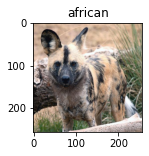

In [15]:
#Bild plotten
import matplotlib.pyplot as plt
plt.figure(figsize = (2,2))
plt.imshow(train[501][0])
plt.title(categories[train[501][1]])



In [9]:
#train test split manuell
print(train.shape)

import random
np.random.shuffle(train)
test_images, train_images = train[:4000], train[4000:]
valid_images, train_images= train_images[:4000],train_images[4000:]
print(test_images.shape)
print(train_images.shape)
print(valid_images.shape)

(22440, 2)
(4000, 2)
(14440, 2)
(4000, 2)


In [10]:
#splitting in x und y data
x_train = []
y_train = []
x_test = []
y_test = []
x_val = []
y_val = []


for feature, label in train_images:
    x_train.append(feature)
    y_train.append(label)

for feature, label in valid_images:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test_images:
    x_test.append(feature)
    y_test.append(label)


    
#transform in array
x_train = np.array(x_train)
x_test = np.array(x_test) 
x_val = np.array(x_val) 
y_val =np.asarray(y_val)
y_test=np.asarray(y_test)
y_train=np.asarray(y_train)
print(type(y_train))
print(x_test)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
[[[[0.21176472 0.2784314  0.31764707]
   [0.2134268  0.28009346 0.31930915]
   [0.21732539 0.28399205 0.32320774]
   ...
   [0.01322764 0.05244333 0.04852176]
   [0.01236213 0.04028033 0.04539676]
   [0.01048228 0.03009012 0.04185483]]

  [[0.2102275  0.27689418 0.31610987]
   [0.21442251 0.2810892  0.32030487]
   [0.22206649 0.28873318 0.32794887]
   ...
   [0.01484761 0.0540633  0.05014173]
   [0.01770142 0.04561963 0.05073605]
   [0.01462163 0.03422948 0.04599418]]

  [[0.21639095 0.2830576  0.32227328]
   [0.22182527 0.28849193 0.32770762]
   [0.22891392 0.2955806  0.33479628]
   ...
   [0.02891391 0.06666667 0.0627451 ]
   [0.02554381 0.05331269 0.05842911]
   [0.02165417 0.04126201 0.05302672]]

  ...

  [[0.50051576 0.39855498 0.40998524]
   [0.46611136 0.36415055 0.3759153 ]
   [0.51191026 0.41387105 0.42563576]
   ...
   [0.09454289 0.11415074 0.13768014]
   [0.07450969 0.08959854 0.11086845]
   [0.06477354 0.07653824 0.09614609]]

  [[0.5018628  0.3999

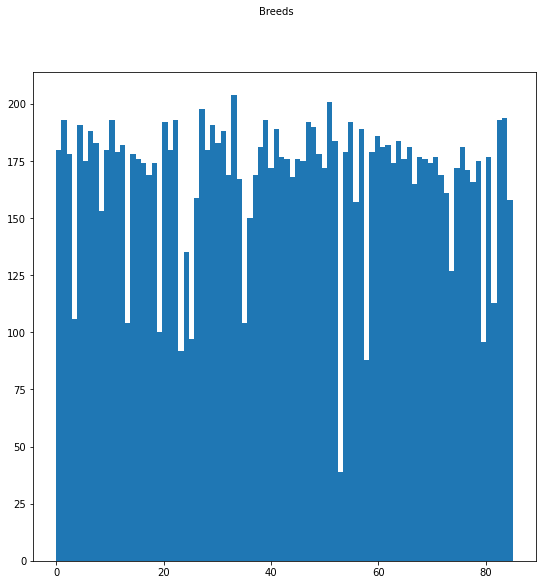

204
[180 193 178 106 191 175 188 183 153 180 193 179 182 104 178 176 174 169
 174 100 192 180 193  92 135  97 159 198 180 191 183 188 169 204 167 104
 150 169 181 193 172 189 177 176 168 176 175 192 190 178 172 201 184  39
 179 192 157 189  88 179 186 181 182 174 184 176 181 165 177 176 174 177
 169 161 127 172 181 171 166 175  96 177 113 193 194 158]


In [11]:
from matplotlib import pyplot as plt



from scipy import stats
stats.describe(y_train)

stats.describe(y_test)

#histogram
fig, ax = plt.subplots(figsize=(9, 9))
fig.suptitle('Breeds', fontsize=10, ha="center")
plt.hist(y_train, bins=86)
#ax.xaxis.set_ticks(y_train[]) 

plt.show()
np.bincount(y_train)
print(max(np.bincount(y_train)))
print(np.bincount(y_train))


In [36]:
#Klassen ausgleichen 
#scheint keinen positiven impact zu haben
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train))) 


C:\Users\keza289\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94], y=[31 35 85 ... 74 74 69] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


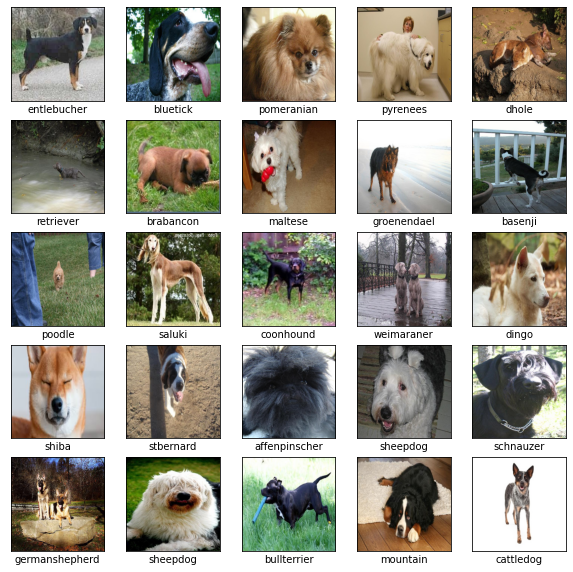

[33  7 63 ... 72 11 62]


In [16]:
#Bilder plotten trainingsdaten
plt.show()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    
    plt.xlabel(categories[y_train[i]])
plt.show()
print(y_train)

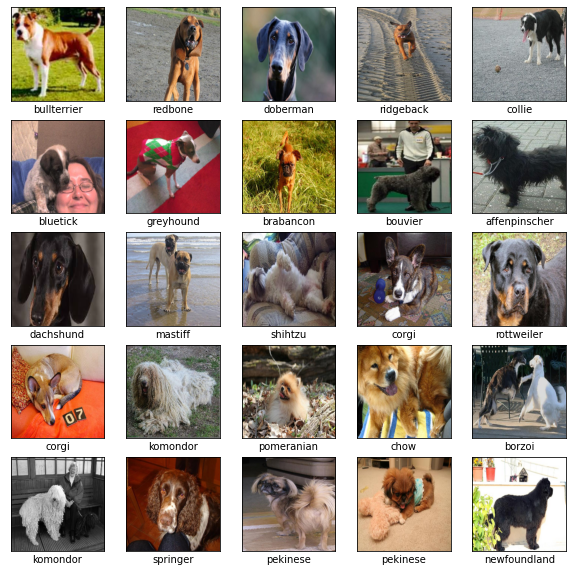

[15 67 31 ... 24 65 32]


In [17]:
#Bilder plotten Testdaten
plt.show()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    
    plt.xlabel(categories[y_test[i]])
plt.show()
print(y_test)

festgestellt: 
- besser mehrere conv pooling layer
- dropout 0.5 führt zu slow converging in training accuracy
- dense (relu) output Layer besser mit höherer menge an neuronen

Machine Learning

In [97]:
from tensorflow.keras import regularizers
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 16, kernel_size= 2, activation='relu',kernel_initializer = tf.keras.initializers.he_normal, padding='same',kernel_regularizer = tf.keras.regularizers.L2(0.01), input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
     tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(rate=0.2)
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(86, activation = 'softmax')
])


In [98]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.99),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])


In [99]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 256, 256, 16)      208       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 128)     18560     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 64)      

In [21]:
#early stopping 
early_stopping=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [101]:
model2.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val), callbacks=[tensorboard_cb, early_stopping])

Epoch 1/40
452/452 [==============================] - 633s 1s/step - loss: 4.6166 - accuracy: 0.0127 - val_loss: 4.4866 - val_accuracy: 0.0127
Epoch 2/40
452/452 [==============================] - 629s 1s/step - loss: 4.3175 - accuracy: 0.0292 - val_loss: 4.1988 - val_accuracy: 0.0393
Epoch 3/40
452/452 [==============================] - 642s 1s/step - loss: 4.1387 - accuracy: 0.0477 - val_loss: 4.1108 - val_accuracy: 0.0463
Epoch 4/40
452/452 [==============================] - 631s 1s/step - loss: 4.0345 - accuracy: 0.0634 - val_loss: 4.0140 - val_accuracy: 0.0523
Epoch 5/40
452/452 [==============================] - 626s 1s/step - loss: 3.9126 - accuracy: 0.0806 - val_loss: 3.8771 - val_accuracy: 0.0752
Epoch 6/40
452/452 [==============================] - 625s 1s/step - loss: 3.8124 - accuracy: 0.0916 - val_loss: 3.8580 - val_accuracy: 0.0793
Epoch 7/40
452/452 [==============================] - 625s 1s/step - loss: 3.7473 - accuracy: 0.1001 - val_loss: 3.7580 - val_accuracy: 0.0910

In [102]:
#model abspeichern
model2.save("model2_21_05_2022.h5")

In [8]:
#model laden
model2=tf.keras.models.load_model("model2_15_05_2022.h5")

In [86]:
#model an Testdaten anwenden
from sklearn.metrics import accuracy_score



predictions = model2.predict(x_test)




In [92]:
#Accuracy bei Tesdaten
test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest Loss:', test_loss)

125/125 - 40s - loss: 3.6952 - accuracy: 0.1538 - 40s/epoch - 316ms/step

Test accuracy: 0.1537500023841858

Test Loss: 3.6952006816864014


In [87]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

vis_arr = np.asarray(multilabel_confusion_matrix(y_test,  np.argmax(predictions, axis = 1)))


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title( class_label)

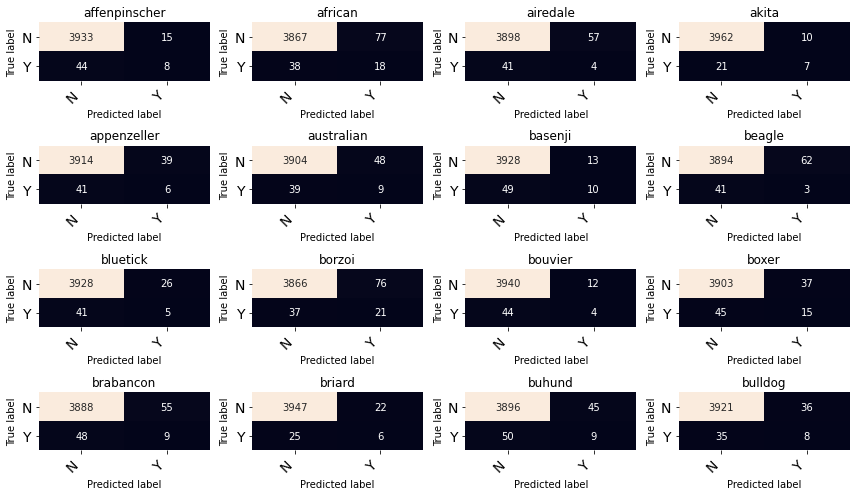

In [89]:
fig, ax = plt.subplots(4, 4, figsize=(12, 7))
    
for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
        print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
        
    
fig.tight_layout()
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, np.argmax(predictions, axis = 1))

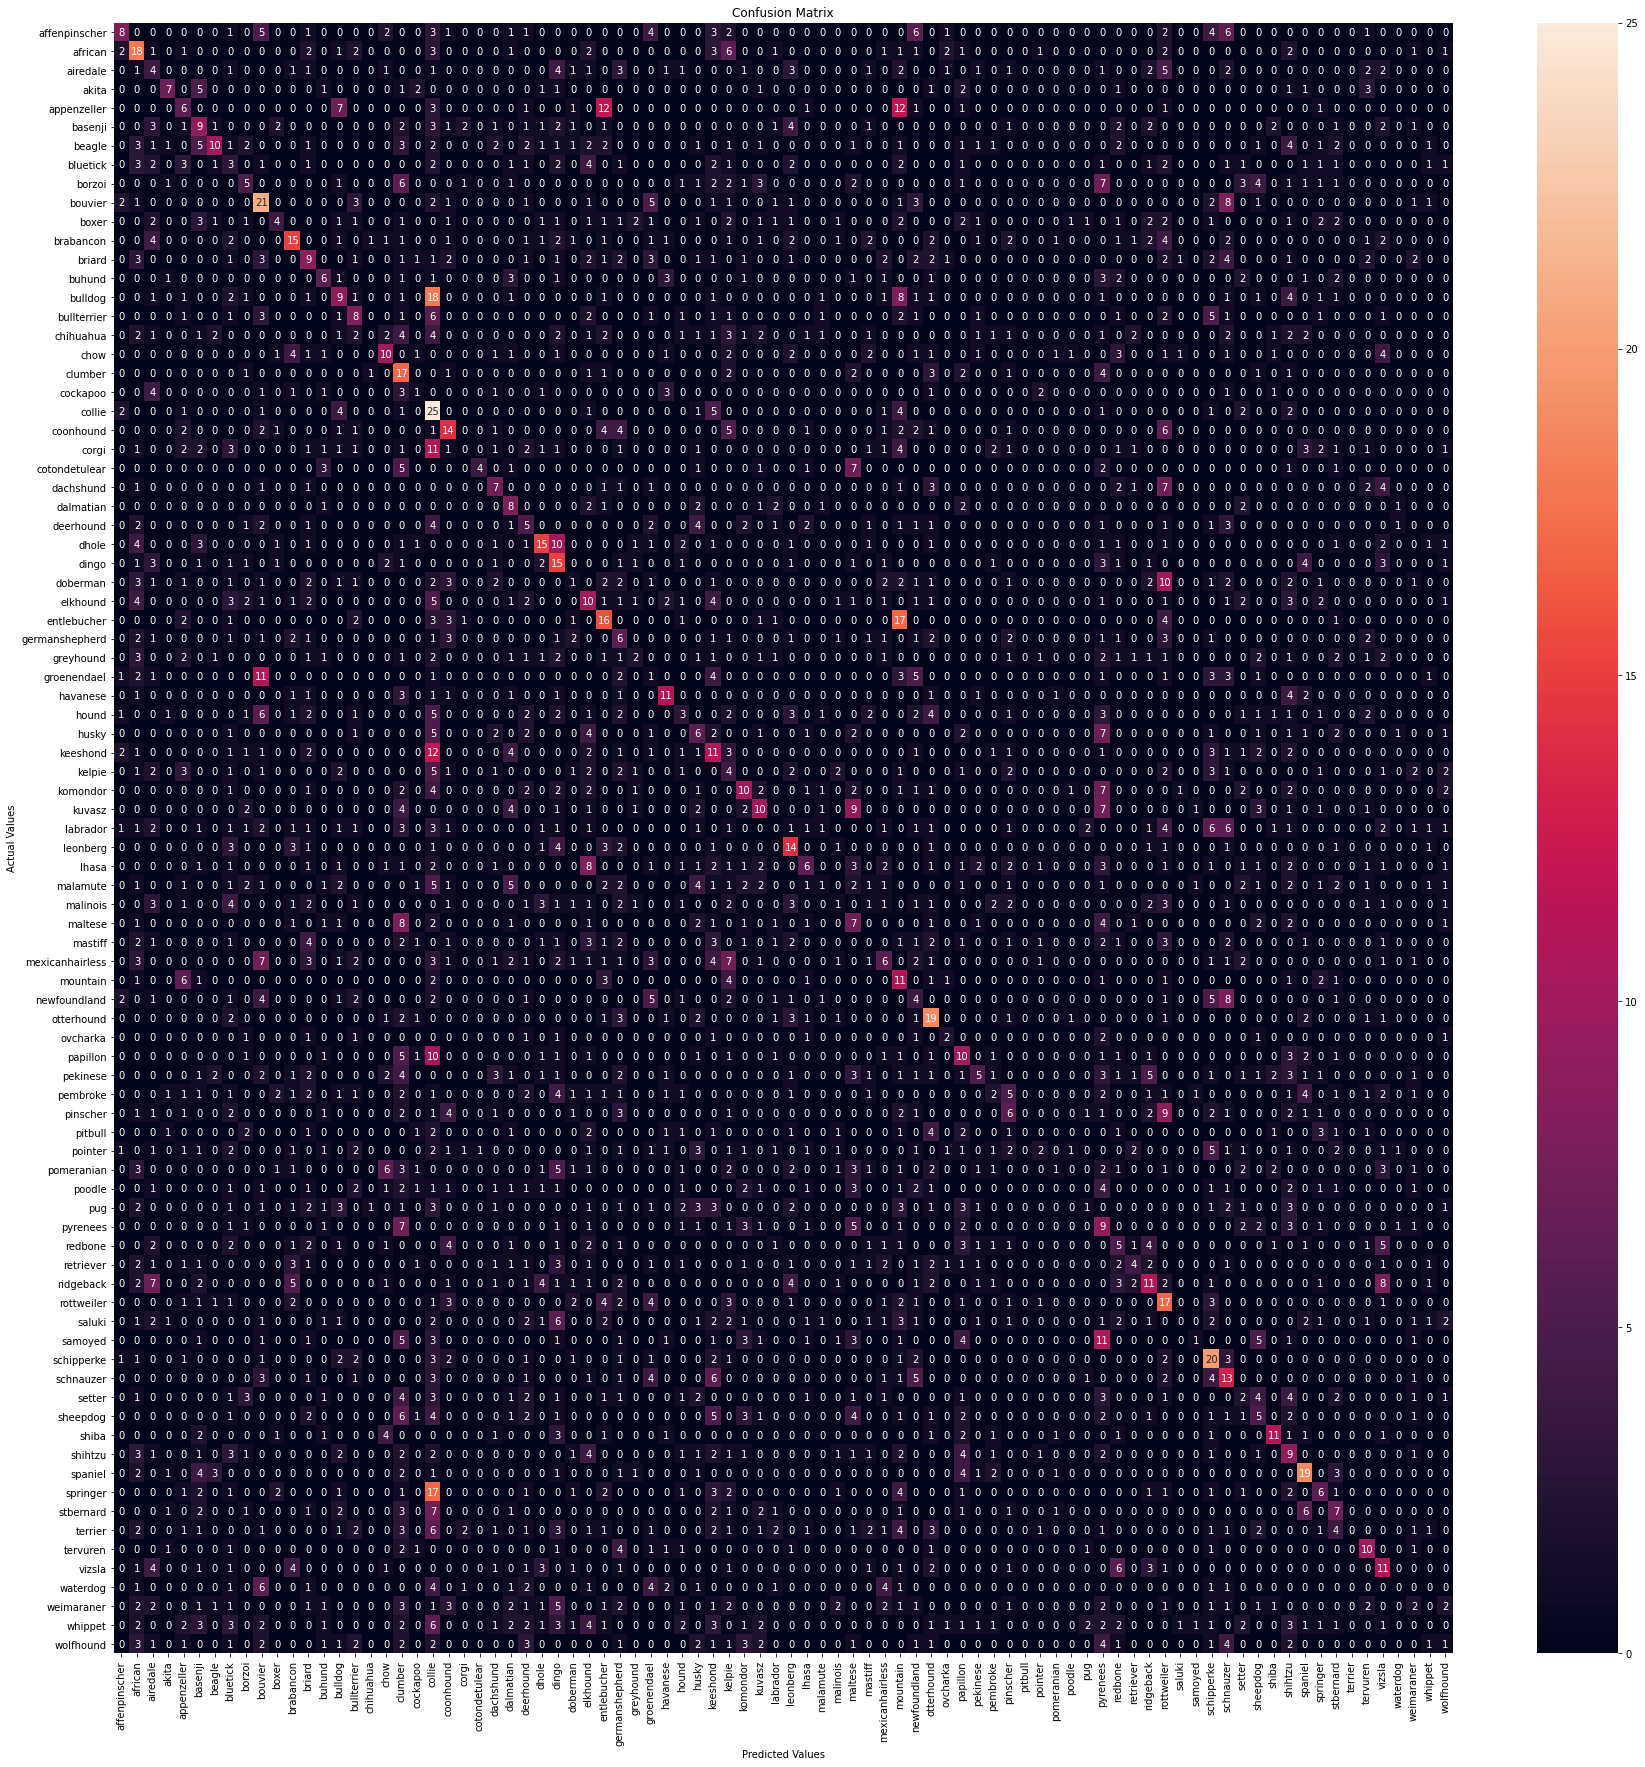

In [91]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = categories, 
                     columns = categories)
#Plotting the confusion matrix
plt.figure(figsize=(30,30))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [76]:
#definieren der Plot funktionen
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')

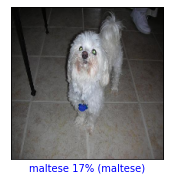

In [79]:
#Auswertung Predictions visualisierung
i = 79


plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)


plt.show()



In [13]:
#optimieren des algorithmus gemäss SW8

import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model2)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 200, 200, 3)      3         
 er)                                                             
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 200, 200, 16)     243       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 100, 100, 16)     1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 100, 100, 128)    18819     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 50, 50, 128)      1

In [14]:
#optimieren des algorithmus
#subset erstellen
train_images_subset = x_train[0:1000] # out of 60000
train_labels_subset = y_train[0:1000]

q_aware_model.fit(train_images_subset, train_labels_subset,
                  batch_size=500, epochs=1, validation_split=0.1)

2/2 [==============================] - 73s 23s/step - loss: 3.3447 - accuracy: 0.3078 - val_loss: 3.0328 - val_accuracy: 0.2600


In [15]:
#optimieren des algorithmusvergleich accuracy
#vergleich accuracy
_, baseline_model_accuracy = model2.evaluate(
    x_test, y_test, verbose=0)

_, q_aware_model_accuracy = q_aware_model.evaluate(
   x_test, y_test, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Quant test accuracy:', q_aware_model_accuracy)

Baseline test accuracy: 0.3441999852657318
Quant test accuracy: 0.32919999957084656


In [16]:
#optimieren des algorithmus
#converting in TFlite
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\keza289\AppData\Local\Temp\tmpsb601d32\assets


INFO:tensorflow:Assets written to: C:\Users\keza289\AppData\Local\Temp\tmpsb601d32\assets


In [19]:
#optimieren des algorithmus
#model evaluieren
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(x_test_under):
 
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)
      
    if i % 1000 != 0:
         print('Evaluated on {n} results so far.'.format(n=i))
    else:
         print("finish")
  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == y_test_under).mean()
  return accuracy

In [20]:
#auswerten des optimierten model

x_test_under = x_test[:1000]
y_test_under = y_test[:1000]

interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Quant TFLite test_accuracy:', test_accuracy)
print('Quant TF test accuracy:', q_aware_model_accuracy)

finish
Evaluated on 1 results so far.
Evaluated on 2 results so far.
Evaluated on 3 results so far.
Evaluated on 4 results so far.
Evaluated on 5 results so far.
Evaluated on 6 results so far.
Evaluated on 7 results so far.
Evaluated on 8 results so far.
Evaluated on 9 results so far.
Evaluated on 10 results so far.
Evaluated on 11 results so far.
Evaluated on 12 results so far.
Evaluated on 13 results so far.
Evaluated on 14 results so far.
Evaluated on 15 results so far.
Evaluated on 16 results so far.
Evaluated on 17 results so far.
Evaluated on 18 results so far.
Evaluated on 19 results so far.
Evaluated on 20 results so far.
Evaluated on 21 results so far.
Evaluated on 22 results so far.
Evaluated on 23 results so far.
Evaluated on 24 results so far.
Evaluated on 25 results so far.
Evaluated on 26 results so far.
Evaluated on 27 results so far.
Evaluated on 28 results so far.
Evaluated on 29 results so far.
Evaluated on 30 results so far.
Evaluated on 31 results so far.
Evaluated 

Evaluated on 253 results so far.
Evaluated on 254 results so far.
Evaluated on 255 results so far.
Evaluated on 256 results so far.
Evaluated on 257 results so far.
Evaluated on 258 results so far.
Evaluated on 259 results so far.
Evaluated on 260 results so far.
Evaluated on 261 results so far.
Evaluated on 262 results so far.
Evaluated on 263 results so far.
Evaluated on 264 results so far.
Evaluated on 265 results so far.
Evaluated on 266 results so far.
Evaluated on 267 results so far.
Evaluated on 268 results so far.
Evaluated on 269 results so far.
Evaluated on 270 results so far.
Evaluated on 271 results so far.
Evaluated on 272 results so far.
Evaluated on 273 results so far.
Evaluated on 274 results so far.
Evaluated on 275 results so far.
Evaluated on 276 results so far.
Evaluated on 277 results so far.
Evaluated on 278 results so far.
Evaluated on 279 results so far.
Evaluated on 280 results so far.
Evaluated on 281 results so far.
Evaluated on 282 results so far.
Evaluated 

Evaluated on 502 results so far.
Evaluated on 503 results so far.
Evaluated on 504 results so far.
Evaluated on 505 results so far.
Evaluated on 506 results so far.
Evaluated on 507 results so far.
Evaluated on 508 results so far.
Evaluated on 509 results so far.
Evaluated on 510 results so far.
Evaluated on 511 results so far.
Evaluated on 512 results so far.
Evaluated on 513 results so far.
Evaluated on 514 results so far.
Evaluated on 515 results so far.
Evaluated on 516 results so far.
Evaluated on 517 results so far.
Evaluated on 518 results so far.
Evaluated on 519 results so far.
Evaluated on 520 results so far.
Evaluated on 521 results so far.
Evaluated on 522 results so far.
Evaluated on 523 results so far.
Evaluated on 524 results so far.
Evaluated on 525 results so far.
Evaluated on 526 results so far.
Evaluated on 527 results so far.
Evaluated on 528 results so far.
Evaluated on 529 results so far.
Evaluated on 530 results so far.
Evaluated on 531 results so far.
Evaluated 

Evaluated on 751 results so far.
Evaluated on 752 results so far.
Evaluated on 753 results so far.
Evaluated on 754 results so far.
Evaluated on 755 results so far.
Evaluated on 756 results so far.
Evaluated on 757 results so far.
Evaluated on 758 results so far.
Evaluated on 759 results so far.
Evaluated on 760 results so far.
Evaluated on 761 results so far.
Evaluated on 762 results so far.
Evaluated on 763 results so far.
Evaluated on 764 results so far.
Evaluated on 765 results so far.
Evaluated on 766 results so far.
Evaluated on 767 results so far.
Evaluated on 768 results so far.
Evaluated on 769 results so far.
Evaluated on 770 results so far.
Evaluated on 771 results so far.
Evaluated on 772 results so far.
Evaluated on 773 results so far.
Evaluated on 774 results so far.
Evaluated on 775 results so far.
Evaluated on 776 results so far.
Evaluated on 777 results so far.
Evaluated on 778 results so far.
Evaluated on 779 results so far.
Evaluated on 780 results so far.
Evaluated 

In [21]:
#tflite model
# Create float TFLite model.
import tempfile
float_converter = tf.lite.TFLiteConverter.from_keras_model(model2)
float_tflite_model = float_converter.convert()

# Measure sizes of models.
_, float_file = tempfile.mkstemp('.tflite')
_, quant_file = tempfile.mkstemp('.tflite')

with open(quant_file, 'wb') as f:
  f.write(quantized_tflite_model)

with open(float_file, 'wb') as f:
  f.write(float_tflite_model)

print("Float model in Mb:", os.path.getsize(float_file) / float(2**20))
print("Quantized model in Mb:", os.path.getsize(quant_file) / float(2**20))

INFO:tensorflow:Assets written to: C:\Users\keza289\AppData\Local\Temp\tmpoqmmrhnb\assets


INFO:tensorflow:Assets written to: C:\Users\keza289\AppData\Local\Temp\tmpoqmmrhnb\assets


Float model in Mb: 5.532588958740234
Quantized model in Mb: 1.39910888671875


In [94]:
#show tensorboard

#%load_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir my_logs_ADS
#%reload_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 25476), started 12:27:21 ago. (Use '!kill 25476' to kill it.)

In [47]:
#Transfer Learning Nr 1 base layer not trainable

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


base_model = ResNet50(include_top=False, input_shape=(256, 256, 3))

model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.Conv2D(filters= 16, kernel_size= 2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add( tf.keras.layers.Dense(95, activation = 'softmax'))

for layer in base_model.layers:
    layer.trainable = False

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.99),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 16)          131088    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)               

In [22]:
#Transfer Learning Nr 2 base layer trainable
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
tf.keras.applications.resnet50.ResNet50(

    
)


resnet50_model = Sequential()
resnet50_model.add(tf.keras.layers.Conv2D(filters= 16, kernel_size= 2, activation='relu', padding='same', input_shape=(200, 200, 3)))
resnet50_model.add( tf.keras.layers.MaxPooling2D((2, 2)))
resnet50_model.add(tf.keras.layers.Flatten())
resnet50_model.add(tf.keras.layers.Dense(120, activation='relu'))
resnet50_model.add( tf.keras.layers.Dense(95, activation = 'softmax'))


resnet50_model.summary()
resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.99),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 160000)            0         
                                                                 
 dense_4 (Dense)             (None, 120)               19200120  
                                                                 
 dense_5 (Dense)             (None, 95)                11495     
                                                                 
Total params: 19,211,823
Trainable params: 19,211,823
Non-trainable params: 0
__________________________________________

In [49]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), callbacks=[tensorboard_cb, early_stopping])

Epoch 1/5
452/452 [==============================] - 2082s 5s/step - loss: 4.3481 - accuracy: 0.0229 - val_loss: 4.3105 - val_accuracy: 0.0285
Epoch 2/5
452/452 [==============================] - 1925s 4s/step - loss: 4.2872 - accuracy: 0.0276 - val_loss: 4.2852 - val_accuracy: 0.0305
Epoch 3/5
452/452 [==============================] - 1920s 4s/step - loss: 4.2447 - accuracy: 0.0304 - val_loss: 4.2312 - val_accuracy: 0.0362
Epoch 4/5
452/452 [==============================] - 2060s 5s/step - loss: 4.2166 - accuracy: 0.0341 - val_loss: 4.2200 - val_accuracy: 0.0325
Epoch 5/5
452/452 [==============================] - 2070s 5s/step - loss: 4.1865 - accuracy: 0.0397 - val_loss: 4.2021 - val_accuracy: 0.0382


In [19]:
#model abspeichern
model.save("modelwithresent.h5")

In [ ]:
#model laden
model=tf.keras.models.load_model("modelwithresent.h5")

In [27]:
#auswertung an Testdaten
test_loss, test_acc = model_resnet.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

125/125 - 345s - loss: 20.1601 - accuracy: 0.0137 - 345s/epoch - 3s/step

Test accuracy: 0.013749999925494194


In [57]:
#Gradcam function
from tensorflow.keras.models import Model



def GradCam(model, img_array, layer_name, eps=1e-8):
    '''
    Creates a grad-cam heatmap given a model and a layer name contained with that model
    

    Args:
      model: tf model
      img_array: (img_width x img_width) numpy array
      layer_name: str


    Returns 
      uint8 numpy array with shape (img_height, img_width)

    '''

    gradModel = Model(
			inputs=[model.inputs],
			outputs=[model.get_layer(layer_name).output,
				model.output])
    
    with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
      inputs = tf.cast(img_array, tf.float32)
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, 0]
		# use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)
    
    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads
		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]
    # compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
  
    # grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))
		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    # heatmap = (heatmap * 255).astype("uint8")
		# return the resulting heatmap to the calling function
    return heatmap


def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x-b)))

def superimpose(img_bgr, cam, thresh, emphasize=False):
    
    '''
    Superimposes a grad-cam heatmap onto an image for model interpretation and visualization.
    

    Args:
      image: (img_width x img_height x 3) numpy array
      grad-cam heatmap: (img_width x img_width) numpy array
      threshold: float
      emphasize: boolean

    Returns 
      uint8 numpy array with shape (img_height, img_width, 3)

    '''
    heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
    if emphasize:
        heatmap = sigmoid(heatmap, 50, thresh, 1)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    hif = .8
    superimposed_img = heatmap * hif + img_bgr
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return superimposed_img_rgb

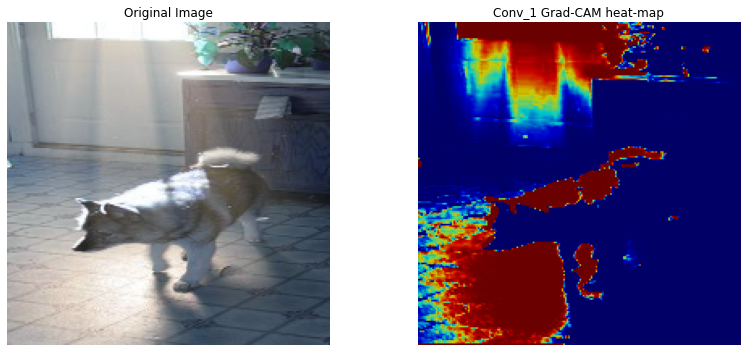

In [65]:
## Grad-CAM heatmap for the first conv Layer
import matplotlib.pyplot as plt
img = x_train[201]
layer_name = 'conv2d'

grad_cam=GradCam(model2,np.expand_dims(img, axis=0),layer_name)
grad_cam_superimposed = superimpose(img, grad_cam, 0.5, emphasize=True)


plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
ax = plt.subplot(1, 2, 2)
plt.imshow(grad_cam_superimposed)
plt.axis('off')
plt.title('Conv_1 Grad-CAM heat-map')
plt.tight_layout()


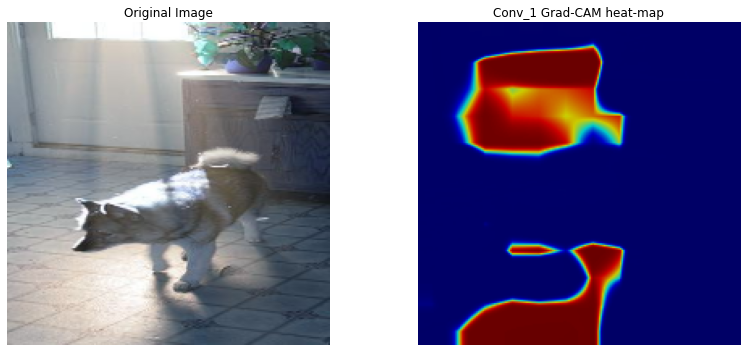

In [66]:
## Grad-CAM heatmap for the last conv Layer
import matplotlib.pyplot as plt
img = x_train[201]
layer_name = 'conv2d_4'

grad_cam=GradCam(model2,np.expand_dims(img, axis=0),layer_name)
grad_cam_superimposed = superimpose(img, grad_cam, 0.5, emphasize=True)


plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
ax = plt.subplot(1, 2, 2)
plt.imshow(grad_cam_superimposed)
plt.axis('off')
plt.title('Conv_1 Grad-CAM heat-map')
plt.tight_layout()


Bilder upload und klassifizieren mit model2

This image most likely belongs to buhund with a 100.00 percent confidence.


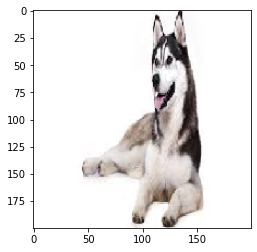

In [88]:
img = tf.keras.utils.load_img("C:/Users/keza289/Desktop/Download.jpg", target_size=(200,200)#download your own image
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Add the image to a batch where it's the only member.


predictions = model2.predict(img_array)
score = predictions[0]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(img)



This image most likely belongs to havanese with a 100.00 percent confidence.


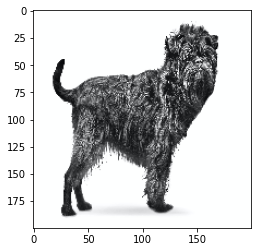

In [90]:
img = tf.keras.utils.load_img("C:/Users/keza289/Desktop/Download2.jpg", target_size=(200,200)#download your own image
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Add the image to a batch where it's the only member.


predictions = model2.predict(img_array)
score = predictions[0]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(img)



This image most likely belongs to havanese with a 100.00 percent confidence.


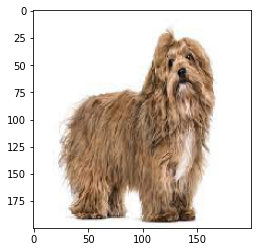

In [91]:
img = tf.keras.utils.load_img("C:/Users/keza289/Desktop/Download3.jpg", target_size=(200,200)#download your own image
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Add the image to a batch where it's the only member.


predictions = model2.predict(img_array)
score = predictions[0]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(categories[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(img)



In [ ]:

sagemaker evtl nochmals probieren oder screenshots

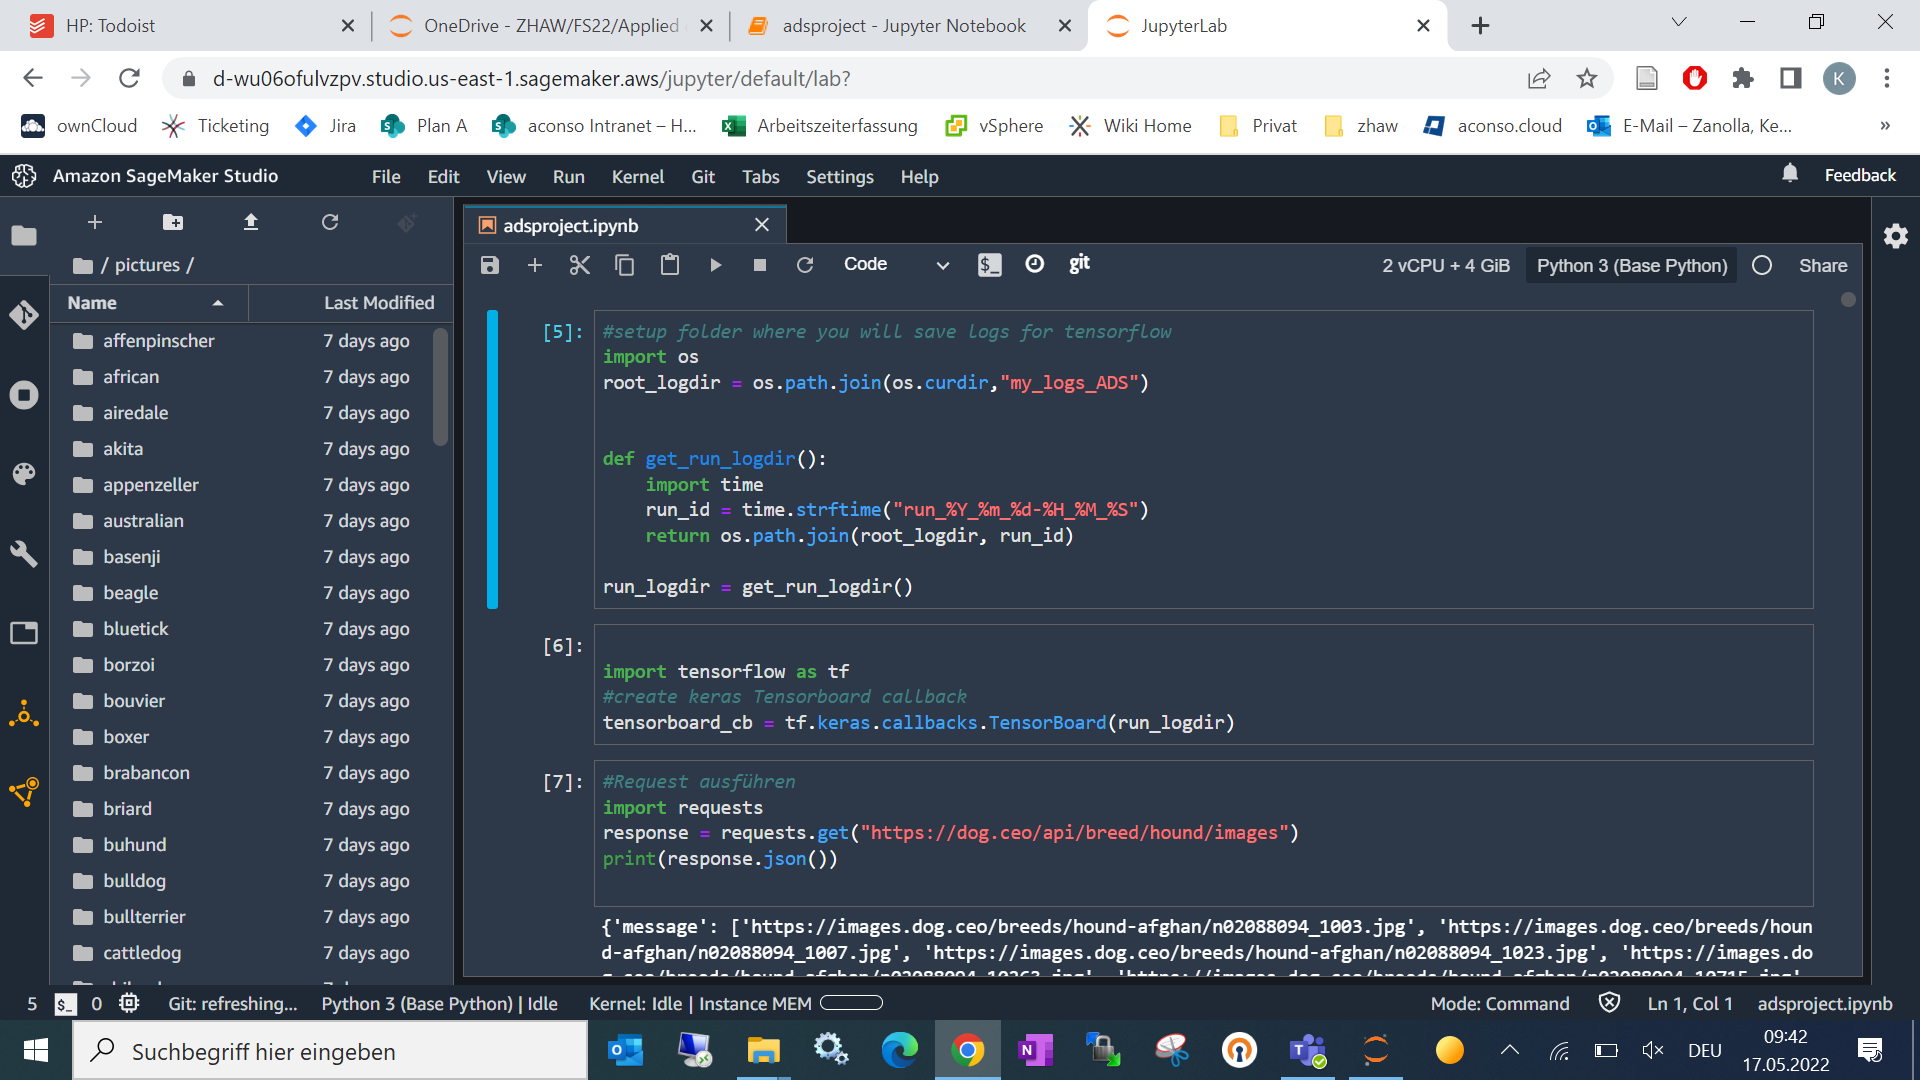

In [2]:
from IPython.display import Image
Image(filename='Sagemaker.png') 

Sagemaker wurde eingerichtet.

Vorteile: 
-je nach Kernel hohe Rechenleistung zu erschwinglichen Kosten
-direkte Anbindung an GitHub

Nachteile: 
-Gratis Kernel mit beschränkte Rechenleistung
-Imports müssen neu definiert weden
-unterschiedliche Versionierung der Pakete
-Netzwerkunterbrüche --> Kernel dies

Es wurde aufgrund der hohen Datenmenge (23'000 Bilder/ Durchlaufzeit des Kompletten Notebooks ca. 20h) regelmässige Netzwerkunterbrüche festgestellt.
Diese Unterbrechungen führen dazu dass der Kernel abstürzt und der Datenimport neu getätigt werden muss.
Es wurde somit entschieden diesen Weg nicht mehr weiterzuführen.
Eine möglichkeit ist die Bildermenge zu reduzieren, was sich wiederum auf die Genauigkeit des Models auswirkt.
